https://github.com/TannerGilbert/MaskRCNN-Object-Detection-and-Segmentation/blob/master/MaskRCNN%20Microcontroller%20Detection.ipynb

In [1]:
#https://github.com/TannerGilbert/MaskRCNN-Object-Detection-and-Segmentation/blob/master/MaskRCNN%20Microcontroller%20Detection.ipynb
#https://towardsdatascience.com/mask-rcnn-implementation-on-a-custom-dataset-fd9a878123d4
#wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
#https://gilberttanner.com/blog/getting-started-with-mask-rcnn-in-keras
#https://github.com/AarohiSingla/Mask-RCNN-on-Custom-Dataset-2classes-/blob/main/custom.py
#https://blog.paperspace.com/mask-r-cnn-in-tensorflow-2-0/
#https://blog.paperspace.com/mean-average-precision/
#https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/
#https://medium.com/analytics-vidhya/a-simple-guide-to-maskrcnn-custom-dataset-implementation-27f7eab381f2

In [2]:
#https://towardsdatascience.com/mask-rcnn-implementation-on-a-custom-dataset-fd9a878123d4
#wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
#https://gilberttanner.com/blog/getting-started-with-mask-rcnn-in-keras
#https://github.com/AarohiSingla/Mask-RCNN-on-Custom-Dataset-2classes-/blob/main/custom.py

In [3]:
#https://viso.ai/deep-learning/mask-r-cnn/#:~:text=Mask%20R%2DCNN%20is%20a,segmentation%20mask%20for%20each%20instance.
#https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e
#https://towardsdatascience.com/computer-vision-instance-segmentation-with-mask-r-cnn-7983502fcad1
#https://medium.com/free-code-camp/mask-r-cnn-explained-7f82bec890e3
#https://developers.arcgis.com/python/guide/how-maskrcnn-works/


In [4]:
import warnings
#warnings.filterwarnings('ignore')
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import cv2
import random
import math
import re
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import xml.etree.ElementTree as ET
from keras.callbacks import ModelCheckpoint, EarlyStopping


Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount("/Mask_RCNN")

Drive already mounted at /Mask_RCNN; to attempt to forcibly remount, call drive.mount("/Mask_RCNN", force_remount=True).


In [6]:

#!unzip "/Mask_RCNN/MyDrive/Mask_RCNN-master-20220620T010749Z-001.zip" -d "/Mask_RCNN/MyDrive"

In [7]:
#from stackoverflow.com
!pip install keras==2.1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://stackoverflow.com/questions/48905127/importing-py-files-in-google-colab

import sys 

sys.path.insert(0, '/content/drive/MyDrive/my_folder')

%cd /content/drive/MyDrive/my_folder

%pwd

In [8]:
sys.path.insert(0, '/Mask_RCNN/MyDrive/Mask R-CNN/Mask_RCNN-master/mrcnn/')
%cd /Mask_RCNN/MyDrive/Mask R-CNN/Mask_RCNN-master/mrcnn/

/Mask_RCNN/MyDrive/Mask R-CNN/Mask_RCNN-master/mrcnn


In [9]:
%pwd

'/Mask_RCNN/MyDrive/Mask R-CNN/Mask_RCNN-master/mrcnn'

In [10]:
print(tf. __version__)

2.8.2


In [11]:
import utils
import visualize
from visualize import display_images
from visualize import display_instances
import model as modellib
from model import log
from config import Config
import model as modellib, utils


https://stackoverflow.com/questions/63437552/steps-per-epoch-validation-steps-in-matterport-mask-rcnn

https://stackoverflow.com/questions/63437552/steps-per-epoch-validation-steps-in-matterport-mask-rcnn

https://www.mdpi.com/2079-9292/10/7/820

https://androidkt.com/how-to-set-steps-per-epoch-validation-steps-and-validation-split-in-kerass-fit-method/

In [12]:
#https://stackoverflow.com/questions/63437552/steps-per-epoch-validation-steps-in-matterport-mask-rcnn
#https://androidkt.com/how-to-set-steps-per-epoch-validation-steps-and-validation-split-in-kerass-fit-method/
#STEPS_PER_EPOCH should be the number of instances 
#(training examples) divided by (GPU_COUNT*IMAGES_PER_GPU)
#For small enough images and given a single GPU, if you can fit 8in its memory then:
#STEPS_PER_EPOCH = 2500/8 # 312
#VALIDATION_STEPS = 1500/8 # 187
class CarConfig(Config):
    # Give the configuration a recognizable name
    NAME = "car_detection"
    
    NUM_CLASSES = 1 + 1

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # Paper link   :      https://www.mdpi.com/2079-9292/10/7/820
    #Number of car instances Training Set : 3364 and Testing Set : 738  (page 11)
    # Number of training steps per epoch
    # STEPS_PER_EPOCH  = 3364
    # VALIDATION_STEPS = 738

    #https://androidkt.com/how-to-set-steps-per-epoch-validation-steps-and-validation-split-in-kerass-fit-method/
    STEPS_PER_EPOCH  = 218
    VALIDATION_STEPS = 52
    LEARNING_RATE = 0.0001
    DETECTION_NMS_THRESHOLD = 0.0
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

config = CarConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.0
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

In [13]:
class CarDataset(utils.Dataset):
    def load_dataset(self, dataset_dir):
        self.add_class('dataset', 1, 'car')
        
        # find all images
        for i, filename in enumerate(os.listdir(dataset_dir)):
            if '.jpg' in filename:
                self.add_image('dataset', 
                               image_id=i, 
                               path=os.path.join(dataset_dir, filename), 
                               annotation=os.path.join(dataset_dir, filename.replace('.jpg', '.xml')))
    
    # extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
        # load and parse the file
        tree = ET.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = []
        classes = []
        for member in root.findall('object'):
            xmin = int(member[4][0].text)
            ymin = int(member[4][1].text)
            xmax = int(member[4][2].text)
            ymax = int(member[4][3].text)
            boxes.append([xmin, ymin, xmax, ymax])
            classes.append(self.class_names.index(member[0].text))
        # extract image dimensions
        width = int(root.find('size')[0].text)
        height = int(root.find('size')[1].text)
        return boxes, classes, width, height
 
    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        boxes, classes, w, h = self.extract_boxes(path)
        # create one array for all masks, each on a different channel
        masks = np.zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
        return masks, np.asarray(classes, dtype='int32')
    
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [14]:

print(tf.train)

<module 'tensorflow._api.v2.train' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/train/__init__.py'>


In [15]:
# Create training and validation set
# train set
dataset_train = CarDataset()
dataset_train.load_dataset('/Mask_RCNN/MyDrive/Mask R-CNN/dataset/train')
dataset_train.prepare()
print('Train: %d' % len(dataset_train.image_ids))
 
# test/val set
dataset_val = CarDataset()
dataset_val.load_dataset('/Mask_RCNN/MyDrive/Mask R-CNN/dataset/val')
dataset_val.prepare()
print('Test: %d' % len(dataset_val.image_ids))

Train: 218
Test: 52


In [ ]:

# # Load and display random samples
# image_ids = np.random.choice(dataset_train.image_ids, 4)
# for image_id in image_ids:
#     image = dataset_train.load_image(image_id)
#     mask, class_ids = dataset_train.load_mask(image_id)
#     visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)



In [ ]:

# Create model in training mode

MODEL_DIR="/Mask_RCNN/MyDrive/Mask R-CNN/logs"
#https://stackoverflow.com/questions/37383812/tensorflow-module-object-has-no-attribute-placeholder
#AttributeError: module 'tensorflow' has no attribute 'placeholder'

###################   507 number line er error er jonn nicher ai code gulo tensorflow_backend.py te gia likbo
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
model = modellib.MaskRCNN(
        mode="training", 
        config=config,
        model_dir=MODEL_DIR)


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [ ]:

# Path to trained weights file
COCO_WEIGHTS_PATH = "/Mask_RCNN/MyDrive/Mask R-CNN/Coco weight Mask R-CNN/mask_rcnn_coco.h5"

#https://stackoverflow.com/questions/28583565/str-object-has-no-attribute-decode-python-3-error
#  topology.py te gia 2929,2934,3407,3411, number line nicher kaj korbo
#  Simply drop the .decode('utf-8') part:    (just delete the .decode('utf8'))
#     original_keras_version = f.attrs['keras_version']#.decode('utf8')

#https://blog.paperspace.com/mask-r-cnn-in-tensorflow-2-0/
model.load_weights(COCO_WEIGHTS_PATH, 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", 
                            "mrcnn_bbox_fc", 
                            "mrcnn_bbox", 
                            "mrcnn_mask"])


**Training**

https://stackoverflow.com/questions/64171099/maskrcnn-false-positives

In [ ]:

#https://stackoverflow.com/questions/55118193/projector-in-tensorflow-v2-alpha

#############   callbacks.py te gia 684 number line a ai code ta likbo   
#   from tensorboard.plugins import projector

#https://stackoverflow.com/questions/61250311/error-importing-bert-module-tensorflow-api-v2-train-has-no-attribute-optimi
############   optimizers.py er 757 number line a gia nicher code ti likbo 
#      tf.compat.v1.train.Optimizer

#https://stackoverflow.com/questions/42481938/attributeerror-module-object-has-no-attribute-merge-all-summaries
##########  callbacks.py  a gia nicher code ti likbo
#      import tensorflow as tf                    (first line er dikhe)
#      tf.compat.v1.summary.merge_all()           (776 number line a )
#      tf.compat.v1.summary.FileWriter()          (779, 782 number line a)
#      tf.compat.v1.Summary()                     (862 number line a )


# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1300, 
            layers='heads')

**per epoch time : 47 minute 43 second**

In [ ]:
#https://www.projectpro.io/recipes/what-is-tf-summary
print(tf.__version__)

**Resume Training**

In [16]:
#########################   For Resume Training    ##############################

# Create model in training mode

MODEL_DIR="/Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622"
#https://stackoverflow.com/questions/37383812/tensorflow-module-object-has-no-attribute-placeholder
#AttributeError: module 'tensorflow' has no attribute 'placeholder'

###################   507 number line er error er jonn nicher ai code gulo tensorflow_backend.py te gia(import package er okhane) likbo
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
model_resume = modellib.MaskRCNN(
        mode="training", 
        config=config,
        model_dir=MODEL_DIR)

Instructions for updating:
box_ind is deprecated, use box_indices instead


In [17]:

#https://stackoverflow.com/questions/28583565/str-object-has-no-attribute-decode-python-3-error
#  topology.py te gia 2929,2934,3407,3411 number line nicher kaj korbo
#  Simply drop the .decode('utf-8') part:    (just delete the .decode('utf8'))
#     original_keras_version = f.attrs['keras_version']#.decode('utf8')

# Get path to saved weights
# Either set a specific path or find last trained weights
# Load trained weights
model_path="/Mask_RCNN/MyDrive/Mask R-CNN/logs/After_540/car_detection20220621T1000/mask_rcnn_car_detection_0622.h5"
print("Loading weights from ", model_path)
model_resume.load_weights(model_path, by_name=True)

Loading weights from  /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_540/car_detection20220621T1000/mask_rcnn_car_detection_0622.h5
Re-starting from epoch 622


In [18]:

# #https://stackoverflow.com/questions/55118193/projector-in-tensorflow-v2-alpha

# #############   callbacks.py te gia 684 number line a ai code ta likbo   
# #   from tensorboard.plugins import projector

# #https://stackoverflow.com/questions/61250311/error-importing-bert-module-tensorflow-api-v2-train-has-no-attribute-optimi
# ############   optimizers.py er 757 number line a gia nicher code ti likbo 
# #      tf.compat.v1.train.Optimizer

# #https://stackoverflow.com/questions/42481938/attributeerror-module-object-has-no-attribute-merge-all-summaries
# ##########  callbacks.py  a gia nicher code ti likbo
# #      import tensorflow as tf                    (first line er dikhe)
# #      tf.compat.v1.summary.merge_all()           (776 number line a )
# #      tf.compat.v1.summary.FileWriter()          (779, 782 number line a)
# #      tf.compat.v1.Summary()                     (862 number line a )


# # Train the head branches
# # Passing layers="heads" freezes all layers except the head
# # layers. You can also pass a regular expression to select
# # which layers to train by name pattern.
# model_resume.train(dataset_train, dataset_val, 
#             learning_rate=config.LEARNING_RATE, 
#             epochs=1300, 
#             layers='heads')

In [18]:
#model_inference = modellib.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR)

class InferenceConfig(CarConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

###################   507 number line er error er jonn nicher ai code gulo tensorflow_backend.py te gia likbo
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
#LOAD MODEL. Create model in inference mode

model_path_interference="/Mask_RCNN/MyDrive/Mask R-CNN/interference"
model_inference = modellib.MaskRCNN(
    mode="inference", 
    model_dir=model_path_interference ,#logs a store hobe 
    config=inference_config)

Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
Use `tf.cast` instead.


In [19]:

mean_average_precision_callback = modellib.MeanAveragePrecisionCallback(
                                      model_resume, 
                                      model_inference, 
                                      dataset_val, 
                                      calculate_at_every_X_epoch=1, 
                                      verbose=1)


In [ ]:
#https://stackoverflow.com/questions/55118193/projector-in-tensorflow-v2-alpha

#############   callbacks.py te gia 684 number line a ai code ta likbo   
#   from tensorboard.plugins import projector

#https://stackoverflow.com/questions/61250311/error-importing-bert-module-tensorflow-api-v2-train-has-no-attribute-optimi
############   optimizers.py er 757 number line a gia nicher code ti likbo 
#      tf.compat.v1.train.Optimizer

#https://stackoverflow.com/questions/42481938/attributeerror-module-object-has-no-attribute-merge-all-summaries
##########  callbacks.py  a gia nicher code ti likbo
#      import tensorflow as tf                    (first line er dikhe)
#      tf.compat.v1.summary.merge_all()           (776 number line a )
#      tf.compat.v1.summary.FileWriter()          (779, 782 number line a)
#      tf.compat.v1.Summary()                     (862 number line a )

model_resume.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1300, 
            layers='heads',
            custom_callbacks=[mean_average_precision_callback])


Starting at epoch 622. LR=0.0001

Checkpoint Path: /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/roi_align_classifier/concat_grad/sub:0", shape=(?,), dtype=int32), values=Tensor("training/SGD/gradients/roi_align_classifier/concat_grad/GatherV2_2:0", shape=(?, 7, 7, 256), dtype=float32), dense_shape=Tensor("training/SGD/gradients/roi_align_classifier/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/roi_align_classifier/concat_grad/sub_1:0", shape=(?,), dtype=int32), values=Tensor("training/SGD/gradients/roi_align_classifier/concat_grad/GatherV2_5:0", shape=(?, 7, 7, 256), d

Epoch 623/1300


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

  1/218 [..............................] - ETA: 2:06:10 - loss: 0.3945 - rpn_class_loss: 0.0093 - rpn_bbox_loss: 0.0267 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0422 - mrcnn_mask_loss: 0.2632

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 1:03:59 - loss: 0.4287 - rpn_class_loss: 0.0192 - rpn_bbox_loss: 0.0385 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2737

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 32:51 - loss: 0.4275 - rpn_class_loss: 0.0355 - rpn_bbox_loss: 0.0249 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0369 - mrcnn_mask_loss: 0.2744

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 22:28 - loss: 0.4171 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0240 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0409 - mrcnn_mask_loss: 0.2697

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 17:14 - loss: 0.5021 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0749 - mrcnn_class_loss: 0.0639 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2837

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 15:28 - loss: 0.4940 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0708 - mrcnn_class_loss: 0.0643 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2813

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/218 [>.............................] - ETA: 12:57 - loss: 0.5108 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0923 - mrcnn_class_loss: 0.0642 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2817

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 11:11 - loss: 0.5040 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0905 - mrcnn_class_loss: 0.0655 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2737

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 10:29 - loss: 0.4882 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0428 - mrcnn_mask_loss: 0.2690

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 8:54 - loss: 0.5062 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0987 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2720

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 7:45 - loss: 0.5176 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.1028 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2759

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 7:10 - loss: 0.5064 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0956 - mrcnn_class_loss: 0.0612 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2731

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 6:40 - loss: 0.4862 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2678

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 6:27 - loss: 0.4755 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0848 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0429 - mrcnn_mask_loss: 0.2646

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 6:03 - loss: 0.4593 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0412 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 5:53 - loss: 0.4533 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0504 - mrcnn_bbox_loss: 0.0403 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 5:34 - loss: 0.4417 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0734 - mrcnn_class_loss: 0.0492 - mrcnn_bbox_loss: 0.0395 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 5:26 - loss: 0.4428 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.0720 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0403 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 5:17 - loss: 0.4379 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0704 - mrcnn_class_loss: 0.0496 - mrcnn_bbox_loss: 0.0399 - mrcnn_mask_loss: 0.2525

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 5:10 - loss: 0.4352 - rpn_class_loss: 0.0250 - rpn_bbox_loss: 0.0687 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0392 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 5:02 - loss: 0.4339 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0674 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0394 - mrcnn_mask_loss: 0.2500

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 4:56 - loss: 0.4365 - rpn_class_loss: 0.0250 - rpn_bbox_loss: 0.0690 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0396 - mrcnn_mask_loss: 0.2502

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 4:49 - loss: 0.4493 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0759 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0409 - mrcnn_mask_loss: 0.2519

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/218 [====>.........................] - ETA: 4:43 - loss: 0.4447 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0744 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2507

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 4:37 - loss: 0.4413 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0735 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0401 - mrcnn_mask_loss: 0.2499

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 4:26 - loss: 0.4445 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0512 - mrcnn_bbox_loss: 0.0406 - mrcnn_mask_loss: 0.2495

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 4:16 - loss: 0.4397 - rpn_class_loss: 0.0254 - rpn_bbox_loss: 0.0748 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0415 - mrcnn_mask_loss: 0.2473

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 4:11 - loss: 0.4407 - rpn_class_loss: 0.0250 - rpn_bbox_loss: 0.0744 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0423 - mrcnn_mask_loss: 0.2473

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 4:03 - loss: 0.4432 - rpn_class_loss: 0.0251 - rpn_bbox_loss: 0.0733 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2479

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 3:59 - loss: 0.4434 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0727 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2478

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 3:54 - loss: 0.4431 - rpn_class_loss: 0.0247 - rpn_bbox_loss: 0.0720 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2480

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 3:47 - loss: 0.4400 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0700 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0430 - mrcnn_mask_loss: 0.2479

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 3:43 - loss: 0.4373 - rpn_class_loss: 0.0256 - rpn_bbox_loss: 0.0689 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0428 - mrcnn_mask_loss: 0.2470

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/218 [======>.......................] - ETA: 3:39 - loss: 0.4364 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0679 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0430 - mrcnn_mask_loss: 0.2465

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 3:36 - loss: 0.4374 - rpn_class_loss: 0.0256 - rpn_bbox_loss: 0.0674 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2466

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 3:33 - loss: 0.4390 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.0668 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2466

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 3:26 - loss: 0.4368 - rpn_class_loss: 0.0257 - rpn_bbox_loss: 0.0650 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2463

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 3:23 - loss: 0.4371 - rpn_class_loss: 0.0256 - rpn_bbox_loss: 0.0644 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2470

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 3:18 - loss: 0.4320 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0624 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2468

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 3:12 - loss: 0.4302 - rpn_class_loss: 0.0245 - rpn_bbox_loss: 0.0614 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2458

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 3:10 - loss: 0.4394 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0653 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2471

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 3:07 - loss: 0.4404 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0647 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2473

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 3:04 - loss: 0.4373 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0639 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2461

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 3:02 - loss: 0.4426 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0657 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2475

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 2:59 - loss: 0.4402 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0649 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2472

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 2:52 - loss: 0.4362 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0629 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2472

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 2:50 - loss: 0.4347 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.0622 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2474

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 2:46 - loss: 0.4329 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0608 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2468

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 2:42 - loss: 0.4308 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0596 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2464

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 2:40 - loss: 0.4299 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.0591 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2464

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 2:36 - loss: 0.4326 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0588 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2478

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

 78/218 [=========>....................] - ETA: 2:32 - loss: 0.4399 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0618 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2501

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 2:30 - loss: 0.4397 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0616 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2504

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 2:28 - loss: 0.4370 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0610 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2490

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 2:25 - loss: 0.4519 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0652 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2511

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 2:23 - loss: 0.4528 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0650 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2510

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 84/218 [==========>...................] - ETA: 2:21 - loss: 0.4515 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0644 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2514

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 2:20 - loss: 0.4491 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0639 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2505

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 2:18 - loss: 0.4481 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0635 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2507

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 2:16 - loss: 0.4472 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0629 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2506

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 2:15 - loss: 0.4518 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0658 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 2:13 - loss: 0.4494 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0657 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2504

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 2:12 - loss: 0.4517 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0665 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2509

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 2:10 - loss: 0.4522 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0662 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2514

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 2:05 - loss: 0.4601 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0702 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 2:04 - loss: 0.4593 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0696 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 2:01 - loss: 0.4593 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0700 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 2:00 - loss: 0.4578 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0694 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:58 - loss: 0.4577 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0691 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:57 - loss: 0.4578 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0686 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:55 - loss: 0.4582 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0689 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


103/218 [=============>................] - ETA: 1:53 - loss: 0.4565 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0682 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:50 - loss: 0.4547 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0678 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:49 - loss: 0.4541 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0672 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:46 - loss: 0.4597 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0689 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:43 - loss: 0.4579 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0684 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:41 - loss: 0.4565 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0677 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:40 - loss: 0.4591 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0686 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:37 - loss: 0.4564 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0678 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:36 - loss: 0.4548 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0674 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:33 - loss: 0.4531 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0665 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:31 - loss: 0.4512 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0656 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:29 - loss: 0.4518 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0647 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:27 - loss: 0.4543 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0665 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:25 - loss: 0.4530 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0661 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:22 - loss: 0.4545 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0670 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 1:20 - loss: 0.4535 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0669 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 1:19 - loss: 0.4528 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0670 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 1:18 - loss: 0.4556 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0686 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 1:17 - loss: 0.4564 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0691 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 1:16 - loss: 0.4563 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0689 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 1:14 - loss: 0.4554 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0684 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 1:13 - loss: 0.4548 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0681 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 1:12 - loss: 0.4546 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0678 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 1:11 - loss: 0.4538 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0674 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 1:09 - loss: 0.4535 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0669 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


142/218 [==================>...........] - ETA: 1:07 - loss: 0.4529 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0670 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 1:06 - loss: 0.4537 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0673 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


144/218 [==================>...........] - ETA: 1:05 - loss: 0.4532 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0669 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


145/218 [==================>...........] - ETA: 1:04 - loss: 0.4533 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0666 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 1:03 - loss: 0.4557 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0682 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 1:02 - loss: 0.4553 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0678 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 1:00 - loss: 0.4561 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0679 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 59s - loss: 0.4563 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0678 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2589 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 58s - loss: 0.4578 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0679 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 57s - loss: 0.4565 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0676 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


153/218 [====================>.........] - ETA: 56s - loss: 0.4598 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0694 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 55s - loss: 0.4658 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0724 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 54s - loss: 0.4652 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0721 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 53s - loss: 0.4676 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0736 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 52s - loss: 0.4670 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0733 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 52s - loss: 0.4659 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0730 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2620

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 50s - loss: 0.4661 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0728 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2622

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 48s - loss: 0.4656 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0725 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 47s - loss: 0.4670 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0723 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 46s - loss: 0.4661 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0723 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 45s - loss: 0.4659 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0721 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 44s - loss: 0.4657 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0718 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 43s - loss: 0.4699 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0745 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 42s - loss: 0.4688 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0741 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2620

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 41s - loss: 0.4688 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0739 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


170/218 [======================>.......] - ETA: 40s - loss: 0.4683 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0735 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2620

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 39s - loss: 0.4690 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0731 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 38s - loss: 0.4679 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0727 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 36s - loss: 0.4727 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0750 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2622

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 35s - loss: 0.4719 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0749 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2620

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 34s - loss: 0.4712 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0746 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 33s - loss: 0.4699 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0743 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 31s - loss: 0.4681 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0735 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2611

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 30s - loss: 0.4661 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0728 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 28s - loss: 0.4646 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0724 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 27s - loss: 0.4645 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0721 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 25s - loss: 0.4640 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0721 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 24s - loss: 0.4646 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0723 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 24s - loss: 0.4649 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0722 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 23s - loss: 0.4647 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0719 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 21s - loss: 0.4628 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0714 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 20s - loss: 0.4623 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0711 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


194/218 [=========================>....] - ETA: 19s - loss: 0.4615 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0708 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 18s - loss: 0.4627 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0706 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 17s - loss: 0.4618 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0702 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 16s - loss: 0.4610 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0699 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 14s - loss: 0.4621 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0700 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 13s - loss: 0.4625 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0702 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 13s - loss: 0.4622 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0700 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 11s - loss: 0.4607 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0696 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 10s - loss: 0.4596 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0694 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 8s - loss: 0.4585 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0688 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 7s - loss: 0.4587 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0684 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 5s - loss: 0.4588 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0685 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4595 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0688 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 3s - loss: 0.4583 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0683 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4577 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0681 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4580 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0680 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4582 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0679 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 243s 1s/step - loss: 0.4581 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0677 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2591 - val_loss: 1.5060 - val_rpn_class_loss: 0.1227 - val_rpn_bbox_loss: 0.5655 - val_mrcnn_class_loss: 0.2636 - val_mrcnn_bbox_loss: 0.2525 - val_mrcnn_mask_loss: 0.3017


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0623.h5
Re-starting from epoch 623
mAP at epoch 622 is: 0.7668832859394701
Epoch 624/1300
  1/218 [..............................] - ETA: 2:12 - loss: 0.2329 - rpn_class_loss: 0.0077 - rpn_bbox_loss: 0.0063 - mrcnn_class_loss: 0.0132 - mrcnn_bbox_loss: 0.0166 - mrcnn_mask_loss: 0.1891

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:22 - loss: 0.3549 - rpn_class_loss: 0.0077 - rpn_bbox_loss: 0.0657 - mrcnn_class_loss: 0.0135 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2159

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:22 - loss: 0.3535 - rpn_class_loss: 0.0071 - rpn_bbox_loss: 0.0558 - mrcnn_class_loss: 0.0235 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2220

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:20 - loss: 0.3698 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.0485 - mrcnn_class_loss: 0.0364 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2281

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:18 - loss: 0.3744 - rpn_class_loss: 0.0130 - rpn_bbox_loss: 0.0430 - mrcnn_class_loss: 0.0443 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2303

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:18 - loss: 0.5015 - rpn_class_loss: 0.0374 - rpn_bbox_loss: 0.1010 - mrcnn_class_loss: 0.0616 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2502

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:18 - loss: 0.4849 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.0910 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2512

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:18 - loss: 0.4725 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2524

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:15 - loss: 0.4991 - rpn_class_loss: 0.0347 - rpn_bbox_loss: 0.0916 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0534 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:14 - loss: 0.4852 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.0872 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0505 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:13 - loss: 0.4947 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0978 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:12 - loss: 0.4927 - rpn_class_loss: 0.0349 - rpn_bbox_loss: 0.0937 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:11 - loss: 0.5132 - rpn_class_loss: 0.0350 - rpn_bbox_loss: 0.1065 - mrcnn_class_loss: 0.0613 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:10 - loss: 0.5059 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0999 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/218 [==>...........................] - ETA: 2:08 - loss: 0.4960 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0975 - mrcnn_class_loss: 0.0610 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:07 - loss: 0.4910 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0621 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:06 - loss: 0.4780 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0897 - mrcnn_class_loss: 0.0601 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2504

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:05 - loss: 0.4978 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.1007 - mrcnn_class_loss: 0.0618 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:05 - loss: 0.4909 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0984 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2521

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:04 - loss: 0.5143 - rpn_class_loss: 0.0348 - rpn_bbox_loss: 0.1111 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:03 - loss: 0.5133 - rpn_class_loss: 0.0352 - rpn_bbox_loss: 0.1086 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0505 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:02 - loss: 0.5083 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 0.1060 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:02 - loss: 0.5039 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.1034 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:00 - loss: 0.5182 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 0.1102 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 1:59 - loss: 0.5157 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.1076 - mrcnn_class_loss: 0.0613 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 1:58 - loss: 0.5115 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.1039 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 1:57 - loss: 0.5072 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.1021 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 1:57 - loss: 0.5049 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.1008 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 41/218 [====>.........................] - ETA: 1:56 - loss: 0.5021 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0988 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 1:56 - loss: 0.5012 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0976 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:54 - loss: 0.4929 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0937 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 1:54 - loss: 0.4915 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 1:53 - loss: 0.4880 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0906 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:52 - loss: 0.4875 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0895 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:52 - loss: 0.4882 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0897 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:51 - loss: 0.4862 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:51 - loss: 0.4883 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0888 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/218 [======>.......................] - ETA: 1:50 - loss: 0.4830 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0872 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:49 - loss: 0.4821 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 1:49 - loss: 0.4875 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0873 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:48 - loss: 0.4822 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0858 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:47 - loss: 0.4804 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:47 - loss: 0.4803 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:46 - loss: 0.4778 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0601 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:45 - loss: 0.4769 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:45 - loss: 0.4737 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:43 - loss: 0.4699 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:42 - loss: 0.4663 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:41 - loss: 0.4731 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:41 - loss: 0.4812 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:40 - loss: 0.4768 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:39 - loss: 0.4806 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:38 - loss: 0.4811 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:37 - loss: 0.4803 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0872 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:36 - loss: 0.4910 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0932 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:35 - loss: 0.5033 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 0.0979 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2611

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/218 [=========>....................] - ETA: 1:34 - loss: 0.5017 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0963 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:34 - loss: 0.5012 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0954 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:33 - loss: 0.5093 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0994 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:32 - loss: 0.5098 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0983 - mrcnn_class_loss: 0.0631 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2630

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:31 - loss: 0.5081 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.0973 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/218 [==========>...................] - ETA: 1:30 - loss: 0.5048 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.0960 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:30 - loss: 0.5104 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0993 - mrcnn_class_loss: 0.0631 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2622

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:29 - loss: 0.5082 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.0983 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:28 - loss: 0.5075 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0980 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:26 - loss: 0.5180 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.1040 - mrcnn_class_loss: 0.0637 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:24 - loss: 0.5160 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.1024 - mrcnn_class_loss: 0.0635 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2647

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:23 - loss: 0.5200 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.1055 - mrcnn_class_loss: 0.0636 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2656

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:22 - loss: 0.5169 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.1042 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2645

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:21 - loss: 0.5160 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.1035 - mrcnn_class_loss: 0.0635 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2642

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:20 - loss: 0.5266 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 0.1104 - mrcnn_class_loss: 0.0639 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2656

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:19 - loss: 0.5216 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.1083 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:18 - loss: 0.5214 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.1083 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2642

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:17 - loss: 0.5215 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.1085 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2642

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:17 - loss: 0.5284 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 0.1126 - mrcnn_class_loss: 0.0641 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2651

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:16 - loss: 0.5273 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.1117 - mrcnn_class_loss: 0.0639 - mrcnn_bbox_loss: 0.0522 - mrcnn_mask_loss: 0.2653

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


103/218 [=============>................] - ETA: 1:15 - loss: 0.5280 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.1121 - mrcnn_class_loss: 0.0638 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2657

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:14 - loss: 0.5300 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.1137 - mrcnn_class_loss: 0.0637 - mrcnn_bbox_loss: 0.0526 - mrcnn_mask_loss: 0.2662

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:13 - loss: 0.5282 - rpn_class_loss: 0.0345 - rpn_bbox_loss: 0.1119 - mrcnn_class_loss: 0.0636 - mrcnn_bbox_loss: 0.0525 - mrcnn_mask_loss: 0.2657

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:12 - loss: 0.5261 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.1109 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0522 - mrcnn_mask_loss: 0.2652

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:11 - loss: 0.5244 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.1091 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0522 - mrcnn_mask_loss: 0.2656

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:10 - loss: 0.5205 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.1076 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2648

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:08 - loss: 0.5165 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.1062 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2640

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:08 - loss: 0.5232 - rpn_class_loss: 0.0348 - rpn_bbox_loss: 0.1087 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2651

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:06 - loss: 0.5231 - rpn_class_loss: 0.0347 - rpn_bbox_loss: 0.1085 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0522 - mrcnn_mask_loss: 0.2649

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:06 - loss: 0.5227 - rpn_class_loss: 0.0347 - rpn_bbox_loss: 0.1080 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2648

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:05 - loss: 0.5202 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 0.1071 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:04 - loss: 0.5184 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.1064 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2637

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:04 - loss: 0.5171 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.1057 - mrcnn_class_loss: 0.0621 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2634

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:03 - loss: 0.5162 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.1052 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2633

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:02 - loss: 0.5167 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.1051 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2636

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:02 - loss: 0.5157 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.1045 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2639

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:00 - loss: 0.5135 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.1031 - mrcnn_class_loss: 0.0618 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2635

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:00 - loss: 0.5146 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.1034 - mrcnn_class_loss: 0.0621 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2639

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 59s - loss: 0.5130 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.1028 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2635 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 58s - loss: 0.5124 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.1023 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2635

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 57s - loss: 0.5187 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.1056 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2644

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 56s - loss: 0.5180 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 0.1050 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2643

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 56s - loss: 0.5171 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 0.1044 - mrcnn_class_loss: 0.0621 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2643

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 55s - loss: 0.5202 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 0.1065 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2650

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 54s - loss: 0.5181 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 0.1058 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2644

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 52s - loss: 0.5151 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.1036 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2645

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 50s - loss: 0.5121 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.1022 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2634

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


142/218 [==================>...........] - ETA: 50s - loss: 0.5118 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.1017 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2640

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 49s - loss: 0.5096 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.1010 - mrcnn_class_loss: 0.0610 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2633

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


144/218 [==================>...........] - ETA: 48s - loss: 0.5093 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.1006 - mrcnn_class_loss: 0.0612 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2632

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 47s - loss: 0.5072 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0995 - mrcnn_class_loss: 0.0608 - mrcnn_bbox_loss: 0.0506 - mrcnn_mask_loss: 0.2630

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 46s - loss: 0.5053 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2626

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 45s - loss: 0.5026 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0981 - mrcnn_class_loss: 0.0601 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 44s - loss: 0.5023 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0976 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2620

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 42s - loss: 0.5001 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0969 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 41s - loss: 0.4991 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0963 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 41s - loss: 0.4978 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0958 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 40s - loss: 0.4982 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0954 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 39s - loss: 0.4951 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0944 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 38s - loss: 0.4941 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0939 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 37s - loss: 0.4948 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0936 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 35s - loss: 0.4924 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0924 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 34s - loss: 0.4922 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0920 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 33s - loss: 0.4911 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 32s - loss: 0.4961 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0941 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 31s - loss: 0.4948 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0937 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 29s - loss: 0.4927 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0932 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 29s - loss: 0.4933 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0938 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 28s - loss: 0.4930 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0934 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 27s - loss: 0.4918 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 27s - loss: 0.4907 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 26s - loss: 0.4908 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0921 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 25s - loss: 0.4925 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


181/218 [=======================>......] - ETA: 24s - loss: 0.4919 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 23s - loss: 0.4926 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0928 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 22s - loss: 0.4917 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 21s - loss: 0.4913 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0926 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


186/218 [========================>.....] - ETA: 21s - loss: 0.4942 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0941 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 20s - loss: 0.4944 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0939 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 19s - loss: 0.4960 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0949 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 18s - loss: 0.4939 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0941 - mrcnn_class_loss: 0.0601 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


191/218 [=========================>....] - ETA: 17s - loss: 0.4923 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0937 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 17s - loss: 0.4923 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0935 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


194/218 [=========================>....] - ETA: 15s - loss: 0.4911 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 15s - loss: 0.4900 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0926 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


196/218 [=========================>....] - ETA: 14s - loss: 0.4889 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0922 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 13s - loss: 0.4883 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0918 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4895 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0919 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 11s - loss: 0.4870 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0911 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 9s - loss: 0.4892 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0926 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2577 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4892 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0923 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 8s - loss: 0.4895 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4883 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0918 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 5s - loss: 0.4912 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0932 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4898 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 3s - loss: 0.4889 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0927 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4883 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0923 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4882 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0919 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 1s - loss: 0.4878 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0916 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4864 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0909 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserW

218/218 [==============================] - 191s 876ms/step - loss: 0.4860 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0906 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2582 - val_loss: 1.4769 - val_rpn_class_loss: 0.1108 - val_rpn_bbox_loss: 0.5894 - val_mrcnn_class_loss: 0.2165 - val_mrcnn_bbox_loss: 0.2668 - val_mrcnn_mask_loss: 0.2933
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0624.h5
Re-starting from epoch 624
mAP at epoch 623 is: 0.7497697931278574
Epoch 625/1300
  1/218 [..............................] - ETA: 2:09 - loss: 0.2188 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.0182 - mrcnn_class_loss: 0.0026 - mrcnn_bbox_loss: 0.0182 - mrcnn_mask_loss: 0.1731

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:11 - loss: 0.2521 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.0136 - mrcnn_class_loss: 0.0264 - mrcnn_bbox_loss: 0.0253 - mrcnn_mask_loss: 0.1747

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:14 - loss: 0.4418 - rpn_class_loss: 0.0368 - rpn_bbox_loss: 0.1031 - mrcnn_class_loss: 0.0473 - mrcnn_bbox_loss: 0.0357 - mrcnn_mask_loss: 0.2188

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:13 - loss: 0.3911 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0674 - mrcnn_class_loss: 0.0413 - mrcnn_bbox_loss: 0.0339 - mrcnn_mask_loss: 0.2206

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:12 - loss: 0.4213 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0745 - mrcnn_class_loss: 0.0514 - mrcnn_bbox_loss: 0.0367 - mrcnn_mask_loss: 0.2287

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:12 - loss: 0.4100 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.0686 - mrcnn_class_loss: 0.0498 - mrcnn_bbox_loss: 0.0351 - mrcnn_mask_loss: 0.2298

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/218 [>.............................] - ETA: 2:12 - loss: 0.4521 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0901 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0382 - mrcnn_mask_loss: 0.2381

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:13 - loss: 0.4440 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0516 - mrcnn_bbox_loss: 0.0392 - mrcnn_mask_loss: 0.2390

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:12 - loss: 0.4865 - rpn_class_loss: 0.0350 - rpn_bbox_loss: 0.1052 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2454

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:11 - loss: 0.4964 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.1033 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2493

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:10 - loss: 0.5105 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.1148 - mrcnn_class_loss: 0.0608 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:10 - loss: 0.5060 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.1093 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:09 - loss: 0.5001 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.1043 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:08 - loss: 0.4802 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0967 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2510

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:08 - loss: 0.4806 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0947 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2506

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/218 [==>...........................] - ETA: 2:07 - loss: 0.5015 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.1071 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:06 - loss: 0.4923 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.1037 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:06 - loss: 0.5222 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.1200 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:05 - loss: 0.5397 - rpn_class_loss: 0.0365 - rpn_bbox_loss: 0.1284 - mrcnn_class_loss: 0.0635 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:04 - loss: 0.5398 - rpn_class_loss: 0.0361 - rpn_bbox_loss: 0.1271 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0526 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:04 - loss: 0.5305 - rpn_class_loss: 0.0360 - rpn_bbox_loss: 0.1236 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:03 - loss: 0.5288 - rpn_class_loss: 0.0360 - rpn_bbox_loss: 0.1211 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0529 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:03 - loss: 0.5220 - rpn_class_loss: 0.0357 - rpn_bbox_loss: 0.1173 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:02 - loss: 0.5148 - rpn_class_loss: 0.0350 - rpn_bbox_loss: 0.1149 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:02 - loss: 0.5124 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.1123 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:00 - loss: 0.5066 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.1064 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0525 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 2:00 - loss: 0.5127 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.1094 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0539 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/218 [====>.........................] - ETA: 1:59 - loss: 0.5231 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.1132 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0564 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 1:58 - loss: 0.5223 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.1122 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0567 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 1:58 - loss: 0.5215 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.1106 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0566 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 1:57 - loss: 0.5174 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.1086 - mrcnn_class_loss: 0.0612 - mrcnn_bbox_loss: 0.0563 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 1:56 - loss: 0.5135 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.1052 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0564 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:55 - loss: 0.5097 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.1018 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0563 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 1:54 - loss: 0.5097 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.1002 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.0564 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 1:53 - loss: 0.5071 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0568 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:53 - loss: 0.5066 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0569 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:51 - loss: 0.5054 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0968 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0572 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:51 - loss: 0.5027 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0950 - mrcnn_class_loss: 0.0631 - mrcnn_bbox_loss: 0.0570 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/218 [======>.......................] - ETA: 1:50 - loss: 0.5006 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0935 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0567 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:50 - loss: 0.4972 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0923 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0560 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 1:49 - loss: 0.5095 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0981 - mrcnn_class_loss: 0.0640 - mrcnn_bbox_loss: 0.0561 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:49 - loss: 0.5050 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0967 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0553 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:48 - loss: 0.5040 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0954 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0556 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:47 - loss: 0.4972 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0549 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:46 - loss: 0.4990 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0549 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 1:45 - loss: 0.4957 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0545 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:43 - loss: 0.4929 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0898 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.0543 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:43 - loss: 0.5011 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0958 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0548 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:42 - loss: 0.4937 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0931 - mrcnn_class_loss: 0.0608 - mrcnn_bbox_loss: 0.0539 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/218 [========>.....................] - ETA: 1:41 - loss: 0.4927 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0921 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0538 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:39 - loss: 0.4871 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0901 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0528 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:39 - loss: 0.4850 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0890 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0525 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:38 - loss: 0.4840 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0883 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:37 - loss: 0.4932 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0924 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0535 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:36 - loss: 0.4916 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0907 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0532 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:35 - loss: 0.4912 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0902 - mrcnn_class_loss: 0.0618 - mrcnn_bbox_loss: 0.0532 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/218 [=========>....................] - ETA: 1:35 - loss: 0.4897 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0891 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0529 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:34 - loss: 0.4876 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0527 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:33 - loss: 0.4865 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0528 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:32 - loss: 0.4827 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0616 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:31 - loss: 0.4797 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0610 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:30 - loss: 0.4834 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0891 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2535

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:29 - loss: 0.4916 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 84/218 [==========>...................] - ETA: 1:29 - loss: 0.4889 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0917 - mrcnn_class_loss: 0.0613 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:28 - loss: 0.4862 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0908 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:27 - loss: 0.4918 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0933 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:27 - loss: 0.4894 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0927 - mrcnn_class_loss: 0.0610 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:26 - loss: 0.4884 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0919 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 1:26 - loss: 0.4892 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0923 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:25 - loss: 0.4878 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0921 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:24 - loss: 0.4944 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0959 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:23 - loss: 0.4943 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0951 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:23 - loss: 0.4928 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0944 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:22 - loss: 0.4914 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0935 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:21 - loss: 0.4977 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0968 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:20 - loss: 0.5016 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0631 - mrcnn_bbox_loss: 0.0522 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:19 - loss: 0.5004 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0983 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:19 - loss: 0.5058 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.1016 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:17 - loss: 0.5055 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.1011 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


103/218 [=============>................] - ETA: 1:16 - loss: 0.5094 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.1039 - mrcnn_class_loss: 0.0636 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:15 - loss: 0.5098 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.1039 - mrcnn_class_loss: 0.0637 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:14 - loss: 0.5062 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.1023 - mrcnn_class_loss: 0.0631 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:13 - loss: 0.5095 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.1045 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:13 - loss: 0.5084 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.1036 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:11 - loss: 0.5045 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.1020 - mrcnn_class_loss: 0.0627 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:11 - loss: 0.5048 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.1021 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:10 - loss: 0.5129 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.1067 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.0522 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:09 - loss: 0.5137 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.1067 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:08 - loss: 0.5124 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.1055 - mrcnn_class_loss: 0.0634 - mrcnn_bbox_loss: 0.0527 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:07 - loss: 0.5117 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.1048 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0526 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:07 - loss: 0.5102 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.1041 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:05 - loss: 0.5061 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.1029 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:04 - loss: 0.5049 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.1022 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:03 - loss: 0.5045 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.1016 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:03 - loss: 0.5019 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.1008 - mrcnn_class_loss: 0.0621 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:01 - loss: 0.5008 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.1000 - mrcnn_class_loss: 0.0616 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:00 - loss: 0.4983 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0987 - mrcnn_class_loss: 0.0612 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 59s - loss: 0.4974 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0982 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2569 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 58s - loss: 0.4998 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0993 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 58s - loss: 0.4985 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0987 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 57s - loss: 0.4970 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0981 - mrcnn_class_loss: 0.0612 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 56s - loss: 0.4959 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0975 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 56s - loss: 0.4985 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0989 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 55s - loss: 0.4970 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0983 - mrcnn_class_loss: 0.0610 - mrcnn_bbox_loss: 0.0506 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 54s - loss: 0.4954 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0979 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 54s - loss: 0.4942 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0973 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 53s - loss: 0.4940 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0968 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 52s - loss: 0.4935 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0963 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 52s - loss: 0.4932 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0958 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 50s - loss: 0.4981 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0979 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 48s - loss: 0.4940 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0963 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 47s - loss: 0.4931 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0957 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 46s - loss: 0.4926 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0954 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0500 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 46s - loss: 0.4918 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0952 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 44s - loss: 0.4889 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0945 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


153/218 [====================>.........] - ETA: 43s - loss: 0.4867 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0933 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 42s - loss: 0.4858 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 40s - loss: 0.4855 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0919 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 39s - loss: 0.4869 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 38s - loss: 0.4884 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0935 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 38s - loss: 0.4881 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0933 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 37s - loss: 0.4886 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0936 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 36s - loss: 0.4886 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0932 - mrcnn_class_loss: 0.0601 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 36s - loss: 0.4880 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0927 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 34s - loss: 0.4869 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0918 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 33s - loss: 0.4860 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0915 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


170/218 [======================>.......] - ETA: 32s - loss: 0.4878 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0926 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 31s - loss: 0.4871 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0921 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 30s - loss: 0.4874 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0922 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 30s - loss: 0.4864 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0917 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 29s - loss: 0.4896 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0935 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 28s - loss: 0.4940 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0955 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 28s - loss: 0.4945 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0958 - mrcnn_class_loss: 0.0601 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 26s - loss: 0.4923 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0949 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 26s - loss: 0.4935 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0953 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 25s - loss: 0.4929 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0950 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 24s - loss: 0.4914 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0941 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 22s - loss: 0.4895 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0935 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 22s - loss: 0.4888 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0931 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


186/218 [========================>.....] - ETA: 21s - loss: 0.4879 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0928 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 20s - loss: 0.4869 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0923 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 19s - loss: 0.4859 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0917 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 18s - loss: 0.4860 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


191/218 [=========================>....] - ETA: 18s - loss: 0.4853 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0910 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 17s - loss: 0.4852 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0907 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 16s - loss: 0.4863 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0911 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


194/218 [=========================>....] - ETA: 16s - loss: 0.4849 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0906 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4834 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0895 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4861 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0907 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 12s - loss: 0.4861 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0904 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4846 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0900 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4848 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0897 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4842 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0895 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4828 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0891 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2573 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4812 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0884 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4801 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0880 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4799 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0878 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4796 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4829 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0890 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4825 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0887 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4818 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0884 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4820 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0886 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4825 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0889 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4818 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0885 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4813 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0882 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 187s 858ms/step - loss: 0.4803 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0879 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2571 - val_loss: 1.3854 - val_rpn_class_loss: 0.0884 - val_rpn_bbox_loss: 0.5337 - val_mrcnn_class_loss: 0.2316 - val_mrcnn_bbox_loss: 0.2382 - val_mrcnn_mask_loss: 0.2934
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0625.h5
Re-starting from epoch 625
mAP at epoch 624 is: 0.7467197683759225
Epoch 626/1300
  2/218 [..............................] - ETA: 2:11 - loss: 0.3667 - rpn_class_loss: 0.0138 - rpn_bbox_loss: 0.0293 - mrcnn_class_loss: 0.0342 - mrcnn_bbox_loss: 0.0325 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:14 - loss: 0.5990 - rpn_class_loss: 0.0506 - rpn_bbox_loss: 0.1282 - mrcnn_class_loss: 0.0716 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2966

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:16 - loss: 0.5920 - rpn_class_loss: 0.0375 - rpn_bbox_loss: 0.1482 - mrcnn_class_loss: 0.0743 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2780

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:15 - loss: 0.5393 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.1281 - mrcnn_class_loss: 0.0643 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2643

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:15 - loss: 0.5328 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.1193 - mrcnn_class_loss: 0.0641 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2672

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:15 - loss: 0.5465 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.1226 - mrcnn_class_loss: 0.0672 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2737

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/218 [>.............................] - ETA: 2:15 - loss: 0.5257 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.1033 - mrcnn_class_loss: 0.0645 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2790

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:14 - loss: 0.5226 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.1045 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0558 - mrcnn_mask_loss: 0.2766

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:14 - loss: 0.5088 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0538 - mrcnn_mask_loss: 0.2709

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:13 - loss: 0.5002 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0931 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0525 - mrcnn_mask_loss: 0.2716

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:12 - loss: 0.4941 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0890 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2698

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:12 - loss: 0.5000 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0912 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0535 - mrcnn_mask_loss: 0.2713

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:11 - loss: 0.5606 - rpn_class_loss: 0.0367 - rpn_bbox_loss: 0.1258 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0560 - mrcnn_mask_loss: 0.2794

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:09 - loss: 0.5499 - rpn_class_loss: 0.0354 - rpn_bbox_loss: 0.1226 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0553 - mrcnn_mask_loss: 0.2759

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:09 - loss: 0.5321 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.1173 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0535 - mrcnn_mask_loss: 0.2689

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:07 - loss: 0.5208 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.1073 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0532 - mrcnn_mask_loss: 0.2660

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:06 - loss: 0.5352 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.1138 - mrcnn_class_loss: 0.0644 - mrcnn_bbox_loss: 0.0541 - mrcnn_mask_loss: 0.2684

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:05 - loss: 0.5345 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.1140 - mrcnn_class_loss: 0.0644 - mrcnn_bbox_loss: 0.0539 - mrcnn_mask_loss: 0.2685

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:05 - loss: 0.5360 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.1148 - mrcnn_class_loss: 0.0656 - mrcnn_bbox_loss: 0.0542 - mrcnn_mask_loss: 0.2684

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:04 - loss: 0.5288 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.1114 - mrcnn_class_loss: 0.0640 - mrcnn_bbox_loss: 0.0533 - mrcnn_mask_loss: 0.2677

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:03 - loss: 0.5264 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.1090 - mrcnn_class_loss: 0.0646 - mrcnn_bbox_loss: 0.0533 - mrcnn_mask_loss: 0.2669

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:03 - loss: 0.5224 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.1061 - mrcnn_class_loss: 0.0635 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2677

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:02 - loss: 0.5217 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.1041 - mrcnn_class_loss: 0.0646 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2680

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:01 - loss: 0.5132 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.1020 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2651

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:00 - loss: 0.5058 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0973 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2652

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 1:59 - loss: 0.5015 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0951 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2652

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 1:58 - loss: 0.4890 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0912 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 1:57 - loss: 0.4929 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0878 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 41/218 [====>.........................] - ETA: 1:56 - loss: 0.4932 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2655

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 1:55 - loss: 0.5010 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0899 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2667

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 1:55 - loss: 0.5006 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0894 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2672

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:54 - loss: 0.4976 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0876 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2672

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 1:53 - loss: 0.4892 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2653

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:52 - loss: 0.4846 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2634

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:52 - loss: 0.4809 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:51 - loss: 0.4907 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2642

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:50 - loss: 0.4918 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2648

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:49 - loss: 0.4880 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0853 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2645

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 1:49 - loss: 0.4847 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2632

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:48 - loss: 0.4845 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2630

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:47 - loss: 0.4803 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:46 - loss: 0.4771 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2611

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:46 - loss: 0.4759 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:45 - loss: 0.4732 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 1:44 - loss: 0.4699 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:43 - loss: 0.4654 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0749 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:41 - loss: 0.4654 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0729 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/218 [========>.....................] - ETA: 1:40 - loss: 0.4658 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0720 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:39 - loss: 0.4849 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2639

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:38 - loss: 0.4809 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2630

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:37 - loss: 0.4781 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:36 - loss: 0.4762 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:36 - loss: 0.4745 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:35 - loss: 0.4736 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0777 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:34 - loss: 0.4858 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2639

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:33 - loss: 0.4839 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2637

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:33 - loss: 0.4832 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2636

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:32 - loss: 0.4803 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2626

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:31 - loss: 0.4784 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:29 - loss: 0.4725 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:28 - loss: 0.4741 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:27 - loss: 0.4708 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:27 - loss: 0.4685 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:26 - loss: 0.4671 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0767 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:24 - loss: 0.4807 - rpn_class_loss: 0.0356 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:22 - loss: 0.4778 - rpn_class_loss: 0.0351 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2612

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:21 - loss: 0.4733 - rpn_class_loss: 0.0349 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:20 - loss: 0.4697 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 0.0758 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:19 - loss: 0.4703 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:18 - loss: 0.4661 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0750 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:17 - loss: 0.4669 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0754 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:17 - loss: 0.4742 - rpn_class_loss: 0.0345 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:15 - loss: 0.4765 - rpn_class_loss: 0.0347 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:15 - loss: 0.4749 - rpn_class_loss: 0.0345 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:14 - loss: 0.4734 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:13 - loss: 0.4715 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:13 - loss: 0.4756 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:11 - loss: 0.4767 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:11 - loss: 0.4771 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:09 - loss: 0.4769 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.0815 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:09 - loss: 0.4781 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0815 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:07 - loss: 0.4756 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:07 - loss: 0.4793 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0828 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:06 - loss: 0.4778 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:05 - loss: 0.4780 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:05 - loss: 0.4775 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:04 - loss: 0.4758 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:03 - loss: 0.4761 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0815 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:03 - loss: 0.4763 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:02 - loss: 0.4744 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:01 - loss: 0.4738 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:01 - loss: 0.4721 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:00 - loss: 0.4736 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 59s - loss: 0.4766 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2596 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 59s - loss: 0.4757 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 58s - loss: 0.4795 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 57s - loss: 0.4838 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.0842 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 57s - loss: 0.4828 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0837 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 56s - loss: 0.4826 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 55s - loss: 0.4810 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 53s - loss: 0.4802 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 53s - loss: 0.4795 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.0815 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 52s - loss: 0.4784 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 51s - loss: 0.4784 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 51s - loss: 0.4764 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


142/218 [==================>...........] - ETA: 50s - loss: 0.4752 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 49s - loss: 0.4732 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


145/218 [==================>...........] - ETA: 48s - loss: 0.4748 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 47s - loss: 0.4753 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 47s - loss: 0.4752 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 46s - loss: 0.4756 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 45s - loss: 0.4743 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 45s - loss: 0.4742 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 44s - loss: 0.4736 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 43s - loss: 0.4718 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 42s - loss: 0.4709 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 41s - loss: 0.4706 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 41s - loss: 0.4690 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 39s - loss: 0.4733 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 39s - loss: 0.4725 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 38s - loss: 0.4729 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 37s - loss: 0.4750 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 36s - loss: 0.4768 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 35s - loss: 0.4758 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 34s - loss: 0.4751 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 33s - loss: 0.4740 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


170/218 [======================>.......] - ETA: 31s - loss: 0.4730 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 30s - loss: 0.4736 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 29s - loss: 0.4748 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 29s - loss: 0.4743 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 28s - loss: 0.4744 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 27s - loss: 0.4731 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 27s - loss: 0.4725 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 26s - loss: 0.4712 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 26s - loss: 0.4702 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 25s - loss: 0.4690 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 24s - loss: 0.4733 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 23s - loss: 0.4728 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 22s - loss: 0.4738 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


186/218 [========================>.....] - ETA: 21s - loss: 0.4732 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 20s - loss: 0.4720 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 20s - loss: 0.4725 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 19s - loss: 0.4728 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 18s - loss: 0.4730 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 17s - loss: 0.4725 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 16s - loss: 0.4721 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 15s - loss: 0.4716 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


196/218 [=========================>....] - ETA: 14s - loss: 0.4713 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4708 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4698 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0766 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 12s - loss: 0.4694 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4693 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0764 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4695 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 10s - loss: 0.4698 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4727 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0773 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4710 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0766 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4700 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4693 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0759 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4686 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0757 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4678 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0750 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4673 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0745 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4679 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0746 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4671 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0743 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4670 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0743 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 190s 871ms/step - loss: 0.4662 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0740 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2580 - val_loss: 1.5177 - val_rpn_class_loss: 0.1045 - val_rpn_bbox_loss: 0.5772 - val_mrcnn_class_loss: 0.2711 - val_mrcnn_bbox_loss: 0.2639 - val_mrcnn_mask_loss: 0.3010
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0626.h5
Re-starting from epoch 626
mAP at epoch 625 is: 0.7385412587869428
Epoch 627/1300
  1/218 [..............................] - ETA: 2:03 - loss: 0.3781 - rpn_class_loss: 0.0190 - rpn_bbox_loss: 0.0438 - mrcnn_class_loss: 0.0430 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2263

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:12 - loss: 0.3915 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.0303 - mrcnn_class_loss: 0.0653 - mrcnn_bbox_loss: 0.0569 - mrcnn_mask_loss: 0.2268

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:18 - loss: 0.3981 - rpn_class_loss: 0.0114 - rpn_bbox_loss: 0.0303 - mrcnn_class_loss: 0.0511 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:18 - loss: 0.3946 - rpn_class_loss: 0.0129 - rpn_bbox_loss: 0.0274 - mrcnn_class_loss: 0.0486 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2612

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:18 - loss: 0.3829 - rpn_class_loss: 0.0142 - rpn_bbox_loss: 0.0249 - mrcnn_class_loss: 0.0458 - mrcnn_bbox_loss: 0.0415 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:18 - loss: 0.3770 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.0248 - mrcnn_class_loss: 0.0444 - mrcnn_bbox_loss: 0.0411 - mrcnn_mask_loss: 0.2536

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:17 - loss: 0.3669 - rpn_class_loss: 0.0121 - rpn_bbox_loss: 0.0234 - mrcnn_class_loss: 0.0416 - mrcnn_bbox_loss: 0.0394 - mrcnn_mask_loss: 0.2504

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:15 - loss: 0.3773 - rpn_class_loss: 0.0134 - rpn_bbox_loss: 0.0251 - mrcnn_class_loss: 0.0489 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2482

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/218 [>.............................] - ETA: 2:15 - loss: 0.3941 - rpn_class_loss: 0.0138 - rpn_bbox_loss: 0.0323 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0427 - mrcnn_mask_loss: 0.2511

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:15 - loss: 0.3865 - rpn_class_loss: 0.0128 - rpn_bbox_loss: 0.0315 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0408 - mrcnn_mask_loss: 0.2464

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:14 - loss: 0.3823 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.0304 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.0401 - mrcnn_mask_loss: 0.2468

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:14 - loss: 0.3756 - rpn_class_loss: 0.0117 - rpn_bbox_loss: 0.0306 - mrcnn_class_loss: 0.0503 - mrcnn_bbox_loss: 0.0388 - mrcnn_mask_loss: 0.2442

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:13 - loss: 0.3843 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.0353 - mrcnn_class_loss: 0.0513 - mrcnn_bbox_loss: 0.0385 - mrcnn_mask_loss: 0.2468

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:12 - loss: 0.4201 - rpn_class_loss: 0.0202 - rpn_bbox_loss: 0.0537 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0406 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:12 - loss: 0.4150 - rpn_class_loss: 0.0194 - rpn_bbox_loss: 0.0519 - mrcnn_class_loss: 0.0516 - mrcnn_bbox_loss: 0.0401 - mrcnn_mask_loss: 0.2520

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:11 - loss: 0.4085 - rpn_class_loss: 0.0190 - rpn_bbox_loss: 0.0499 - mrcnn_class_loss: 0.0509 - mrcnn_bbox_loss: 0.0389 - mrcnn_mask_loss: 0.2497

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:11 - loss: 0.4297 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.0635 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0406 - mrcnn_mask_loss: 0.2526

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:09 - loss: 0.4229 - rpn_class_loss: 0.0208 - rpn_bbox_loss: 0.0614 - mrcnn_class_loss: 0.0488 - mrcnn_bbox_loss: 0.0395 - mrcnn_mask_loss: 0.2524

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:09 - loss: 0.4205 - rpn_class_loss: 0.0202 - rpn_bbox_loss: 0.0597 - mrcnn_class_loss: 0.0492 - mrcnn_bbox_loss: 0.0391 - mrcnn_mask_loss: 0.2523

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:08 - loss: 0.4268 - rpn_class_loss: 0.0199 - rpn_bbox_loss: 0.0612 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0411 - mrcnn_mask_loss: 0.2525

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:07 - loss: 0.4243 - rpn_class_loss: 0.0202 - rpn_bbox_loss: 0.0592 - mrcnn_class_loss: 0.0510 - mrcnn_bbox_loss: 0.0407 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:06 - loss: 0.4281 - rpn_class_loss: 0.0200 - rpn_bbox_loss: 0.0585 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:06 - loss: 0.4344 - rpn_class_loss: 0.0207 - rpn_bbox_loss: 0.0618 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0424 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:05 - loss: 0.4309 - rpn_class_loss: 0.0207 - rpn_bbox_loss: 0.0601 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:05 - loss: 0.4330 - rpn_class_loss: 0.0206 - rpn_bbox_loss: 0.0592 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0420 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:04 - loss: 0.4295 - rpn_class_loss: 0.0201 - rpn_bbox_loss: 0.0574 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 2:03 - loss: 0.4348 - rpn_class_loss: 0.0214 - rpn_bbox_loss: 0.0594 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0430 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:01 - loss: 0.4403 - rpn_class_loss: 0.0223 - rpn_bbox_loss: 0.0613 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 2:00 - loss: 0.4416 - rpn_class_loss: 0.0218 - rpn_bbox_loss: 0.0615 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 1:59 - loss: 0.4436 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.0604 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 1:58 - loss: 0.4796 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2644

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 1:57 - loss: 0.4801 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:57 - loss: 0.4755 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 1:56 - loss: 0.4706 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 1:55 - loss: 0.4675 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:55 - loss: 0.4649 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:54 - loss: 0.4623 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:53 - loss: 0.4611 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0765 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:53 - loss: 0.4583 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.0755 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:51 - loss: 0.4520 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0734 - mrcnn_class_loss: 0.0506 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 1:50 - loss: 0.4484 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0723 - mrcnn_class_loss: 0.0497 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:50 - loss: 0.4462 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0732 - mrcnn_class_loss: 0.0490 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:48 - loss: 0.4404 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0714 - mrcnn_class_loss: 0.0487 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:47 - loss: 0.4512 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0756 - mrcnn_class_loss: 0.0511 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.2536

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:47 - loss: 0.4533 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0765 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:46 - loss: 0.4531 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0756 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 1:46 - loss: 0.4551 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0752 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:45 - loss: 0.4542 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0743 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:44 - loss: 0.4500 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0726 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:43 - loss: 0.4518 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0732 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/218 [========>.....................] - ETA: 1:41 - loss: 0.4612 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:41 - loss: 0.4616 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0762 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:40 - loss: 0.4638 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:39 - loss: 0.4614 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:38 - loss: 0.4586 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0767 - mrcnn_class_loss: 0.0519 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:38 - loss: 0.4593 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:37 - loss: 0.4578 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:36 - loss: 0.4651 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:35 - loss: 0.4646 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:33 - loss: 0.4633 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0519 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:33 - loss: 0.4613 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0514 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/218 [==========>...................] - ETA: 1:31 - loss: 0.4588 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0508 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:30 - loss: 0.4676 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:29 - loss: 0.4650 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0519 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:28 - loss: 0.4658 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:27 - loss: 0.4748 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:27 - loss: 0.4735 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 1:26 - loss: 0.4721 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:24 - loss: 0.4717 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:24 - loss: 0.4713 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:22 - loss: 0.4686 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:22 - loss: 0.4672 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:21 - loss: 0.4654 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:20 - loss: 0.4628 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:19 - loss: 0.4618 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:18 - loss: 0.4673 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:18 - loss: 0.4733 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:17 - loss: 0.4711 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:16 - loss: 0.4695 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0519 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:15 - loss: 0.4762 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0867 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:14 - loss: 0.4742 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:12 - loss: 0.4752 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:12 - loss: 0.4739 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0858 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:10 - loss: 0.4701 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:10 - loss: 0.4690 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:08 - loss: 0.4669 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:07 - loss: 0.4743 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0872 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:06 - loss: 0.4728 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0867 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:06 - loss: 0.4712 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0519 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:05 - loss: 0.4701 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0855 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:04 - loss: 0.4692 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0514 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:04 - loss: 0.4693 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:02 - loss: 0.4681 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0519 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:01 - loss: 0.4716 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0857 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:00 - loss: 0.4685 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 59s - loss: 0.4666 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2556 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 58s - loss: 0.4643 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0516 - mrcnn_bbox_loss: 0.0437 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 57s - loss: 0.4624 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0514 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 56s - loss: 0.4674 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 55s - loss: 0.4677 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0842 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

136/218 [=================>............] - ETA: 54s - loss: 0.4703 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0857 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 54s - loss: 0.4690 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 52s - loss: 0.4712 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


142/218 [==================>...........] - ETA: 50s - loss: 0.4696 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 47s - loss: 0.4666 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 46s - loss: 0.4658 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 46s - loss: 0.4662 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 45s - loss: 0.4664 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 44s - loss: 0.4663 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 44s - loss: 0.4665 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


153/218 [====================>.........] - ETA: 43s - loss: 0.4666 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0437 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 42s - loss: 0.4646 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 41s - loss: 0.4633 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 40s - loss: 0.4631 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 40s - loss: 0.4627 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 38s - loss: 0.4605 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0430 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 38s - loss: 0.4662 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 37s - loss: 0.4651 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 36s - loss: 0.4685 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0849 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 36s - loss: 0.4671 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 35s - loss: 0.4665 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0519 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 34s - loss: 0.4668 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 34s - loss: 0.4664 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 32s - loss: 0.4643 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0430 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


170/218 [======================>.......] - ETA: 32s - loss: 0.4636 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0429 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 30s - loss: 0.4652 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 30s - loss: 0.4649 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0815 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 28s - loss: 0.4664 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 27s - loss: 0.4703 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 26s - loss: 0.4697 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 25s - loss: 0.4684 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 24s - loss: 0.4677 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 22s - loss: 0.4672 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 22s - loss: 0.4665 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


186/218 [========================>.....] - ETA: 21s - loss: 0.4669 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 20s - loss: 0.4669 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 20s - loss: 0.4662 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 18s - loss: 0.4640 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 17s - loss: 0.4648 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 16s - loss: 0.4640 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 15s - loss: 0.4636 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0437 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


196/218 [=========================>....] - ETA: 14s - loss: 0.4645 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4638 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4660 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 12s - loss: 0.4656 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4650 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4649 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 10s - loss: 0.4672 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4671 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4663 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2568 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 8s - loss: 0.4656 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4660 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4657 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4654 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


210/218 [===========================>..] - ETA: 5s - loss: 0.4643 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4637 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4623 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4614 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4614 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4609 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 193s 884ms/step - loss: 0.4621 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2560 - val_loss: 1.3800 - val_rpn_class_loss: 0.0918 - val_rpn_bbox_loss: 0.5336 - val_mrcnn_class_loss: 0.2064 - val_mrcnn_bbox_loss: 0.2441 - val_mrcnn_mask_loss: 0.3041
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0627.h5
Re-starting from epoch 627
mAP at epoch 626 is: 0.7662995738468242
Epoch 628/1300
  1/218 [..............................] - ETA: 2:05 - loss: 1.1965 - rpn_class_loss: 0.1983 - rpn_bbox_loss: 0.4391 - mrcnn_class_loss: 0.1150 - mrcnn_bbox_loss: 0.0738 - mrcnn_mask_loss: 0.3703

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:14 - loss: 0.8876 - rpn_class_loss: 0.1089 - rpn_bbox_loss: 0.2760 - mrcnn_class_loss: 0.0884 - mrcnn_bbox_loss: 0.0675 - mrcnn_mask_loss: 0.3468

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:18 - loss: 0.6256 - rpn_class_loss: 0.0681 - rpn_bbox_loss: 0.1504 - mrcnn_class_loss: 0.0712 - mrcnn_bbox_loss: 0.0525 - mrcnn_mask_loss: 0.2834

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:19 - loss: 0.6545 - rpn_class_loss: 0.0681 - rpn_bbox_loss: 0.1773 - mrcnn_class_loss: 0.0710 - mrcnn_bbox_loss: 0.0557 - mrcnn_mask_loss: 0.2824

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:20 - loss: 0.5921 - rpn_class_loss: 0.0593 - rpn_bbox_loss: 0.1556 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2667

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:19 - loss: 0.5444 - rpn_class_loss: 0.0536 - rpn_bbox_loss: 0.1367 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:17 - loss: 0.5234 - rpn_class_loss: 0.0491 - rpn_bbox_loss: 0.1230 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2531

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:16 - loss: 0.5031 - rpn_class_loss: 0.0447 - rpn_bbox_loss: 0.1140 - mrcnn_class_loss: 0.0497 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2514

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:16 - loss: 0.4912 - rpn_class_loss: 0.0406 - rpn_bbox_loss: 0.1005 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2503

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:15 - loss: 0.4906 - rpn_class_loss: 0.0383 - rpn_bbox_loss: 0.0964 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2510

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:15 - loss: 0.4907 - rpn_class_loss: 0.0365 - rpn_bbox_loss: 0.0921 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2522

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:14 - loss: 0.5082 - rpn_class_loss: 0.0365 - rpn_bbox_loss: 0.1042 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0500 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:13 - loss: 0.5014 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.0954 - mrcnn_class_loss: 0.0639 - mrcnn_bbox_loss: 0.0506 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:13 - loss: 0.4957 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0910 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:13 - loss: 0.4886 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:12 - loss: 0.4963 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0863 - mrcnn_class_loss: 0.0684 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:12 - loss: 0.4904 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0685 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/218 [==>...........................] - ETA: 2:11 - loss: 0.4828 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0660 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:10 - loss: 0.4755 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0652 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:09 - loss: 0.4669 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0724 - mrcnn_class_loss: 0.0646 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:08 - loss: 0.4851 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0661 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:07 - loss: 0.4871 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0842 - mrcnn_class_loss: 0.0640 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:07 - loss: 0.4983 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0647 - mrcnn_bbox_loss: 0.0500 - mrcnn_mask_loss: 0.2647

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:05 - loss: 0.5045 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0664 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2672

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:05 - loss: 0.4984 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0851 - mrcnn_class_loss: 0.0653 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2663

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:04 - loss: 0.4911 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2662

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 2:03 - loss: 0.4818 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2632

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:02 - loss: 0.4737 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0751 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 41/218 [====>.........................] - ETA: 1:59 - loss: 0.4913 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0837 - mrcnn_class_loss: 0.0631 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 1:58 - loss: 0.4876 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2649

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:57 - loss: 0.4861 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2645

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 1:56 - loss: 0.4945 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0627 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2659

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 1:56 - loss: 0.4992 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0639 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2670

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:55 - loss: 0.5075 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0640 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2681

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:54 - loss: 0.5074 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0905 - mrcnn_class_loss: 0.0649 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2678

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:53 - loss: 0.5090 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0903 - mrcnn_class_loss: 0.0659 - mrcnn_bbox_loss: 0.0531 - mrcnn_mask_loss: 0.2683

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/218 [======>.......................] - ETA: 1:52 - loss: 0.5072 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0889 - mrcnn_class_loss: 0.0661 - mrcnn_bbox_loss: 0.0529 - mrcnn_mask_loss: 0.2684

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:52 - loss: 0.5017 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0873 - mrcnn_class_loss: 0.0650 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2665

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:50 - loss: 0.4958 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0639 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2654

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:50 - loss: 0.4919 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2647

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:48 - loss: 0.4882 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0644 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2638

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 1:46 - loss: 0.4935 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0655 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2659

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:45 - loss: 0.4931 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0676 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2652

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:43 - loss: 0.4934 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0675 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2660

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:43 - loss: 0.4904 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0798 - mrcnn_class_loss: 0.0666 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2653

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:41 - loss: 0.4894 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0661 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2662

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:39 - loss: 0.4882 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0772 - mrcnn_class_loss: 0.0664 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2658

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:39 - loss: 0.4866 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0766 - mrcnn_class_loss: 0.0656 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2658

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:37 - loss: 0.4845 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0647 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.2655

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:37 - loss: 0.4816 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0753 - mrcnn_class_loss: 0.0639 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2647

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:35 - loss: 0.4787 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.0744 - mrcnn_class_loss: 0.0639 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2631

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:35 - loss: 0.4769 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0737 - mrcnn_class_loss: 0.0638 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:34 - loss: 0.4881 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0648 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:33 - loss: 0.4874 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0654 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2636

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:31 - loss: 0.4821 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0770 - mrcnn_class_loss: 0.0640 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 84/218 [==========>...................] - ETA: 1:30 - loss: 0.4818 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0640 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2630

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:29 - loss: 0.4896 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0644 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2639

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:28 - loss: 0.4913 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0650 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2639

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:27 - loss: 0.4917 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0654 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2640

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:26 - loss: 0.4910 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0662 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2634

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:24 - loss: 0.4873 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0655 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:24 - loss: 0.4839 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0648 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2611

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:23 - loss: 0.4834 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0649 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:22 - loss: 0.4837 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0655 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:21 - loss: 0.4880 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0661 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:20 - loss: 0.4861 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0655 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:19 - loss: 0.4828 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0647 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:18 - loss: 0.4882 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0653 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:18 - loss: 0.4873 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0648 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2620

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


103/218 [=============>................] - ETA: 1:17 - loss: 0.4891 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0654 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:16 - loss: 0.4879 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0652 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:16 - loss: 0.4886 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0659 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2629

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:15 - loss: 0.4925 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0662 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2634

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:14 - loss: 0.4925 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0664 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2637

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:14 - loss: 0.4931 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0664 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2637

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:13 - loss: 0.4926 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0665 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2636

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:12 - loss: 0.4917 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0669 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2633

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:12 - loss: 0.4900 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0665 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2626

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:11 - loss: 0.4887 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0666 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:10 - loss: 0.4877 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0668 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:09 - loss: 0.4855 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0663 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:08 - loss: 0.4841 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0658 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:08 - loss: 0.4866 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0660 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:07 - loss: 0.4841 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0656 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:06 - loss: 0.4822 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0654 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:06 - loss: 0.4798 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0648 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:05 - loss: 0.4788 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0646 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:04 - loss: 0.4792 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0646 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:04 - loss: 0.4791 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0775 - mrcnn_class_loss: 0.0650 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:03 - loss: 0.4798 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0649 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:02 - loss: 0.4811 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0655 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2611

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:01 - loss: 0.4799 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0767 - mrcnn_class_loss: 0.0653 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:00 - loss: 0.4790 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0648 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 59s - loss: 0.4846 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0654 - mrcnn_bbox_loss: 0.0506 - mrcnn_mask_loss: 0.2613 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 58s - loss: 0.4856 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0651 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 57s - loss: 0.4855 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0646 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 57s - loss: 0.4851 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0647 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2612

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 55s - loss: 0.4847 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0644 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2612

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 55s - loss: 0.4849 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0646 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 54s - loss: 0.4840 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0645 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 53s - loss: 0.4834 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0645 - mrcnn_bbox_loss: 0.0505 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 53s - loss: 0.4818 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0641 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 52s - loss: 0.4821 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0641 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 51s - loss: 0.4810 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0637 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


144/218 [==================>...........] - ETA: 49s - loss: 0.4784 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0775 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 47s - loss: 0.4760 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0631 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 46s - loss: 0.4742 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0755 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


153/218 [====================>.........] - ETA: 43s - loss: 0.4863 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0635 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 41s - loss: 0.4832 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 40s - loss: 0.4817 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 39s - loss: 0.4857 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 39s - loss: 0.4878 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0632 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2612

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 38s - loss: 0.4870 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 37s - loss: 0.4860 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0500 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 35s - loss: 0.4851 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 34s - loss: 0.4848 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0500 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 33s - loss: 0.4840 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 32s - loss: 0.4828 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


170/218 [======================>.......] - ETA: 32s - loss: 0.4824 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0618 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 31s - loss: 0.4849 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 30s - loss: 0.4894 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0627 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 30s - loss: 0.4876 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0500 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 29s - loss: 0.4863 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0621 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 28s - loss: 0.4869 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 27s - loss: 0.4879 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 26s - loss: 0.4898 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0862 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 25s - loss: 0.4894 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0627 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 24s - loss: 0.4884 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0627 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 23s - loss: 0.4881 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0856 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 22s - loss: 0.4883 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0857 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 22s - loss: 0.4870 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0853 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 20s - loss: 0.4886 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0863 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 20s - loss: 0.4905 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0874 - mrcnn_class_loss: 0.0628 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 19s - loss: 0.4898 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0870 - mrcnn_class_loss: 0.0627 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


191/218 [=========================>....] - ETA: 18s - loss: 0.4879 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0862 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 17s - loss: 0.4878 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 16s - loss: 0.4869 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0857 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 15s - loss: 0.4847 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0849 - mrcnn_class_loss: 0.0616 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


196/218 [=========================>....] - ETA: 14s - loss: 0.4841 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4863 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0858 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4853 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0613 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 12s - loss: 0.4843 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0851 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4840 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0848 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4894 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0866 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4888 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4881 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0856 - mrcnn_class_loss: 0.0618 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2595 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 8s - loss: 0.4882 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0856 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4871 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4860 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4852 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0612 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4850 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4838 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4831 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0608 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4825 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4822 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0829 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4814 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4814 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserW

218/218 [==============================] - 196s 897ms/step - loss: 0.4805 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2582 - val_loss: 1.4605 - val_rpn_class_loss: 0.1111 - val_rpn_bbox_loss: 0.5720 - val_mrcnn_class_loss: 0.2281 - val_mrcnn_bbox_loss: 0.2530 - val_mrcnn_mask_loss: 0.2963
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0628.h5
Re-starting from epoch 628
mAP at epoch 627 is: 0.7815922636402465
Epoch 629/1300
  1/218 [..............................] - ETA: 2:06 - loss: 0.4104 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0232 - mrcnn_class_loss: 0.0738 - mrcnn_bbox_loss: 0.0409 - mrcnn_mask_loss: 0.2465

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:19 - loss: 0.3629 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.0218 - mrcnn_class_loss: 0.0493 - mrcnn_bbox_loss: 0.0285 - mrcnn_mask_loss: 0.2462

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:21 - loss: 0.3513 - rpn_class_loss: 0.0143 - rpn_bbox_loss: 0.0207 - mrcnn_class_loss: 0.0462 - mrcnn_bbox_loss: 0.0304 - mrcnn_mask_loss: 0.2396

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:21 - loss: 0.6008 - rpn_class_loss: 0.0590 - rpn_bbox_loss: 0.1334 - mrcnn_class_loss: 0.0681 - mrcnn_bbox_loss: 0.0559 - mrcnn_mask_loss: 0.2844

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:19 - loss: 0.5362 - rpn_class_loss: 0.0464 - rpn_bbox_loss: 0.1041 - mrcnn_class_loss: 0.0642 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2721

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:18 - loss: 0.5131 - rpn_class_loss: 0.0440 - rpn_bbox_loss: 0.0950 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2665

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:17 - loss: 0.5092 - rpn_class_loss: 0.0407 - rpn_bbox_loss: 0.0884 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2719

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:16 - loss: 0.4975 - rpn_class_loss: 0.0375 - rpn_bbox_loss: 0.0764 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2757

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:15 - loss: 0.4726 - rpn_class_loss: 0.0351 - rpn_bbox_loss: 0.0711 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2655

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:14 - loss: 0.4506 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0625 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2612

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:13 - loss: 0.4427 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0598 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:12 - loss: 0.4966 - rpn_class_loss: 0.0378 - rpn_bbox_loss: 0.0910 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2650

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:11 - loss: 0.5322 - rpn_class_loss: 0.0436 - rpn_bbox_loss: 0.1110 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2725

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:11 - loss: 0.5333 - rpn_class_loss: 0.0421 - rpn_bbox_loss: 0.1120 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2729

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:10 - loss: 0.5530 - rpn_class_loss: 0.0444 - rpn_bbox_loss: 0.1213 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2772

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/218 [==>...........................] - ETA: 2:10 - loss: 0.5592 - rpn_class_loss: 0.0428 - rpn_bbox_loss: 0.1252 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0526 - mrcnn_mask_loss: 0.2781

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:09 - loss: 0.5519 - rpn_class_loss: 0.0427 - rpn_bbox_loss: 0.1212 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.2766

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:08 - loss: 0.5548 - rpn_class_loss: 0.0414 - rpn_bbox_loss: 0.1223 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2796

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:07 - loss: 0.5359 - rpn_class_loss: 0.0408 - rpn_bbox_loss: 0.1154 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2730

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:06 - loss: 0.5287 - rpn_class_loss: 0.0412 - rpn_bbox_loss: 0.1119 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2707

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:04 - loss: 0.5098 - rpn_class_loss: 0.0391 - rpn_bbox_loss: 0.1052 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2634

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:02 - loss: 0.5057 - rpn_class_loss: 0.0381 - rpn_bbox_loss: 0.1017 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:02 - loss: 0.5018 - rpn_class_loss: 0.0378 - rpn_bbox_loss: 0.0995 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2626

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/218 [====>.........................] - ETA: 2:01 - loss: 0.4977 - rpn_class_loss: 0.0365 - rpn_bbox_loss: 0.0978 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:00 - loss: 0.4941 - rpn_class_loss: 0.0359 - rpn_bbox_loss: 0.0957 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 1:59 - loss: 0.4904 - rpn_class_loss: 0.0352 - rpn_bbox_loss: 0.0936 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 41/218 [====>.........................] - ETA: 1:58 - loss: 0.4800 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.0897 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 1:57 - loss: 0.4766 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0878 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 1:57 - loss: 0.4757 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0510 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:56 - loss: 0.4785 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 1:55 - loss: 0.4782 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0855 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:54 - loss: 0.4765 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2620

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:53 - loss: 0.4768 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:53 - loss: 0.4841 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0874 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:52 - loss: 0.4879 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0862 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2644

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:51 - loss: 0.4836 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 1:50 - loss: 0.4900 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.0867 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2660

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:49 - loss: 0.4896 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0870 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2654

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:49 - loss: 0.4873 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0857 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2652

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:48 - loss: 0.4840 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0847 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:46 - loss: 0.4960 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.0899 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2656

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:45 - loss: 0.4996 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0936 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2655

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:44 - loss: 0.4967 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2645

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:43 - loss: 0.5073 - rpn_class_loss: 0.0345 - rpn_bbox_loss: 0.0964 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2667

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:42 - loss: 0.5049 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.0955 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2665

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:41 - loss: 0.4983 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2652

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:40 - loss: 0.4953 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0923 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2640

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:39 - loss: 0.4902 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0904 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:38 - loss: 0.4912 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0905 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2626

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:37 - loss: 0.4923 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0900 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2627

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:35 - loss: 0.4850 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2612

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:34 - loss: 0.4871 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0876 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:33 - loss: 0.4842 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:33 - loss: 0.4846 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0861 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/218 [==========>...................] - ETA: 1:32 - loss: 0.4822 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:31 - loss: 0.4852 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0869 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:30 - loss: 0.4833 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:29 - loss: 0.4798 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0847 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:28 - loss: 0.4781 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:26 - loss: 0.4732 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:25 - loss: 0.4803 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:23 - loss: 0.4868 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0898 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:22 - loss: 0.4860 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0899 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2612

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:21 - loss: 0.4914 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0933 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:21 - loss: 0.4968 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0967 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2630

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:19 - loss: 0.4928 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0952 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:18 - loss: 0.4906 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0937 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


103/218 [=============>................] - ETA: 1:17 - loss: 0.4901 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:16 - loss: 0.4887 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0926 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:15 - loss: 0.4901 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2611

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:14 - loss: 0.4890 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:13 - loss: 0.4894 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0910 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:12 - loss: 0.4862 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0898 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:10 - loss: 0.4902 - rpn_class_loss: 0.0339 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:10 - loss: 0.4891 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.0918 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:09 - loss: 0.4896 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.0913 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:08 - loss: 0.4975 - rpn_class_loss: 0.0352 - rpn_bbox_loss: 0.0953 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:08 - loss: 0.4969 - rpn_class_loss: 0.0350 - rpn_bbox_loss: 0.0946 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:07 - loss: 0.4959 - rpn_class_loss: 0.0348 - rpn_bbox_loss: 0.0939 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:06 - loss: 0.4948 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.0933 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:06 - loss: 0.4928 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 0.0926 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:05 - loss: 0.4915 - rpn_class_loss: 0.0343 - rpn_bbox_loss: 0.0921 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:04 - loss: 0.4906 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.0916 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:02 - loss: 0.4900 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.0913 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:01 - loss: 0.4925 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.0927 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:00 - loss: 0.4952 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0944 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2629

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 59s - loss: 0.4957 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0942 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2630 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 59s - loss: 0.4944 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0937 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 58s - loss: 0.4930 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.0935 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 57s - loss: 0.4927 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0931 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 57s - loss: 0.4904 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.0927 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 56s - loss: 0.4900 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.0923 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 55s - loss: 0.4901 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0919 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 55s - loss: 0.4882 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0912 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 54s - loss: 0.4867 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0906 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 53s - loss: 0.4866 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0902 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 53s - loss: 0.4914 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.0922 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 51s - loss: 0.4903 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


142/218 [==================>...........] - ETA: 51s - loss: 0.4890 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0908 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 50s - loss: 0.4878 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.0903 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


144/218 [==================>...........] - ETA: 49s - loss: 0.4876 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0899 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 48s - loss: 0.4865 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0888 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 47s - loss: 0.4852 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 45s - loss: 0.4842 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0879 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 44s - loss: 0.4862 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0897 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 43s - loss: 0.4889 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.0911 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 42s - loss: 0.4887 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0909 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 41s - loss: 0.4885 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0905 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 41s - loss: 0.4887 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0902 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 39s - loss: 0.4872 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0891 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 37s - loss: 0.4870 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0883 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2603

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 36s - loss: 0.4856 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0876 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 35s - loss: 0.4846 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0873 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 34s - loss: 0.4876 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0889 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 33s - loss: 0.4877 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0888 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 33s - loss: 0.4866 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0884 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 31s - loss: 0.4875 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0889 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 31s - loss: 0.4862 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0885 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 29s - loss: 0.4866 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0883 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 28s - loss: 0.4865 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 28s - loss: 0.4860 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0878 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 26s - loss: 0.4862 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0874 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 26s - loss: 0.4852 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0870 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 25s - loss: 0.4845 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0867 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 24s - loss: 0.4835 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 23s - loss: 0.4867 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0878 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 22s - loss: 0.4866 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0874 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 22s - loss: 0.4856 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0870 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 20s - loss: 0.4877 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0880 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 19s - loss: 0.4881 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0885 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 18s - loss: 0.4907 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0899 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2606

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 17s - loss: 0.4918 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0907 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


194/218 [=========================>....] - ETA: 16s - loss: 0.4959 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0932 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 15s - loss: 0.4958 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0929 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


196/218 [=========================>....] - ETA: 14s - loss: 0.4950 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4950 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0922 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 12s - loss: 0.4945 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0916 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4936 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0911 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4925 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0907 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 10s - loss: 0.4921 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0904 - mrcnn_class_loss: 0.0601 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4915 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0901 - mrcnn_class_loss: 0.0601 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4914 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0898 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2612 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 8s - loss: 0.4906 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0895 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2609

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4909 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0896 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4902 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0893 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4901 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0891 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


210/218 [===========================>..] - ETA: 5s - loss: 0.4884 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0886 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4889 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0888 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4882 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0885 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4883 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0883 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4877 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0879 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4864 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0876 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4863 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0873 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4853 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0870 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserW

218/218 [==============================] - 191s 876ms/step - loss: 0.4850 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0868 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2605 - val_loss: 1.3666 - val_rpn_class_loss: 0.0839 - val_rpn_bbox_loss: 0.5500 - val_mrcnn_class_loss: 0.1931 - val_mrcnn_bbox_loss: 0.2432 - val_mrcnn_mask_loss: 0.2964
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0629.h5
Re-starting from epoch 629
mAP at epoch 628 is: 0.7910634797257085
Epoch 630/1300
  1/218 [..............................] - ETA: 2:04 - loss: 0.4583 - rpn_class_loss: 0.0491 - rpn_bbox_loss: 0.0216 - mrcnn_class_loss: 0.0696 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2699

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:15 - loss: 0.4160 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.0158 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0414 - mrcnn_mask_loss: 0.2656

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:14 - loss: 0.3409 - rpn_class_loss: 0.0236 - rpn_bbox_loss: 0.0160 - mrcnn_class_loss: 0.0323 - mrcnn_bbox_loss: 0.0337 - mrcnn_mask_loss: 0.2352

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:13 - loss: 0.3657 - rpn_class_loss: 0.0202 - rpn_bbox_loss: 0.0165 - mrcnn_class_loss: 0.0412 - mrcnn_bbox_loss: 0.0361 - mrcnn_mask_loss: 0.2516

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:13 - loss: 0.3589 - rpn_class_loss: 0.0201 - rpn_bbox_loss: 0.0175 - mrcnn_class_loss: 0.0368 - mrcnn_bbox_loss: 0.0342 - mrcnn_mask_loss: 0.2503

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:12 - loss: 0.3251 - rpn_class_loss: 0.0166 - rpn_bbox_loss: 0.0162 - mrcnn_class_loss: 0.0313 - mrcnn_bbox_loss: 0.0312 - mrcnn_mask_loss: 0.2299

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:15 - loss: 0.3593 - rpn_class_loss: 0.0192 - rpn_bbox_loss: 0.0301 - mrcnn_class_loss: 0.0430 - mrcnn_bbox_loss: 0.0354 - mrcnn_mask_loss: 0.2315

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:14 - loss: 0.3703 - rpn_class_loss: 0.0183 - rpn_bbox_loss: 0.0393 - mrcnn_class_loss: 0.0433 - mrcnn_bbox_loss: 0.0402 - mrcnn_mask_loss: 0.2292

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/218 [>.............................] - ETA: 2:14 - loss: 0.3867 - rpn_class_loss: 0.0182 - rpn_bbox_loss: 0.0460 - mrcnn_class_loss: 0.0464 - mrcnn_bbox_loss: 0.0418 - mrcnn_mask_loss: 0.2343

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:14 - loss: 0.3837 - rpn_class_loss: 0.0188 - rpn_bbox_loss: 0.0437 - mrcnn_class_loss: 0.0443 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2365

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:13 - loss: 0.3805 - rpn_class_loss: 0.0193 - rpn_bbox_loss: 0.0418 - mrcnn_class_loss: 0.0419 - mrcnn_bbox_loss: 0.0398 - mrcnn_mask_loss: 0.2376

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:13 - loss: 0.3823 - rpn_class_loss: 0.0195 - rpn_bbox_loss: 0.0394 - mrcnn_class_loss: 0.0476 - mrcnn_bbox_loss: 0.0405 - mrcnn_mask_loss: 0.2354

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:12 - loss: 0.3848 - rpn_class_loss: 0.0194 - rpn_bbox_loss: 0.0386 - mrcnn_class_loss: 0.0474 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2389

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:12 - loss: 0.4137 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.0536 - mrcnn_class_loss: 0.0513 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2446

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:10 - loss: 0.4639 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0751 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:10 - loss: 0.4854 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0905 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:09 - loss: 0.4822 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0879 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:09 - loss: 0.4730 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0849 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/218 [==>...........................] - ETA: 2:08 - loss: 0.4833 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0892 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:08 - loss: 0.4845 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0898 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:07 - loss: 0.4832 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0862 - mrcnn_class_loss: 0.0601 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:06 - loss: 0.4802 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0837 - mrcnn_class_loss: 0.0608 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:06 - loss: 0.4742 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:05 - loss: 0.4724 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:05 - loss: 0.4837 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0887 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:04 - loss: 0.4757 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:04 - loss: 0.4727 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:03 - loss: 0.4690 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:02 - loss: 0.4714 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0612 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:02 - loss: 0.4659 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2536

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/218 [====>.........................] - ETA: 2:00 - loss: 0.4661 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 1:59 - loss: 0.4605 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.0753 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 1:58 - loss: 0.4574 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.0737 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 1:57 - loss: 0.4636 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:56 - loss: 0.4548 - rpn_class_loss: 0.0254 - rpn_bbox_loss: 0.0738 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2527

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:54 - loss: 0.4511 - rpn_class_loss: 0.0247 - rpn_bbox_loss: 0.0702 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2523

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:54 - loss: 0.4522 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0690 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:52 - loss: 0.4471 - rpn_class_loss: 0.0245 - rpn_bbox_loss: 0.0667 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0428 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:51 - loss: 0.4428 - rpn_class_loss: 0.0238 - rpn_bbox_loss: 0.0647 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0424 - mrcnn_mask_loss: 0.2521

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 1:50 - loss: 0.4435 - rpn_class_loss: 0.0237 - rpn_bbox_loss: 0.0641 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 0.0427 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:49 - loss: 0.4455 - rpn_class_loss: 0.0235 - rpn_bbox_loss: 0.0648 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0428 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:49 - loss: 0.4466 - rpn_class_loss: 0.0235 - rpn_bbox_loss: 0.0644 - mrcnn_class_loss: 0.0609 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:48 - loss: 0.4443 - rpn_class_loss: 0.0235 - rpn_bbox_loss: 0.0636 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:47 - loss: 0.4440 - rpn_class_loss: 0.0231 - rpn_bbox_loss: 0.0638 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2534

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:46 - loss: 0.4461 - rpn_class_loss: 0.0231 - rpn_bbox_loss: 0.0647 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 1:45 - loss: 0.4448 - rpn_class_loss: 0.0230 - rpn_bbox_loss: 0.0638 - mrcnn_class_loss: 0.0613 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:44 - loss: 0.4422 - rpn_class_loss: 0.0231 - rpn_bbox_loss: 0.0636 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.2521

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:44 - loss: 0.4502 - rpn_class_loss: 0.0228 - rpn_bbox_loss: 0.0664 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:43 - loss: 0.4482 - rpn_class_loss: 0.0226 - rpn_bbox_loss: 0.0655 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:42 - loss: 0.4496 - rpn_class_loss: 0.0226 - rpn_bbox_loss: 0.0663 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:41 - loss: 0.4464 - rpn_class_loss: 0.0222 - rpn_bbox_loss: 0.0647 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:40 - loss: 0.4466 - rpn_class_loss: 0.0221 - rpn_bbox_loss: 0.0637 - mrcnn_class_loss: 0.0618 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:39 - loss: 0.4448 - rpn_class_loss: 0.0218 - rpn_bbox_loss: 0.0636 - mrcnn_class_loss: 0.0610 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2520

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:38 - loss: 0.4428 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.0629 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/218 [=========>....................] - ETA: 1:36 - loss: 0.4434 - rpn_class_loss: 0.0220 - rpn_bbox_loss: 0.0629 - mrcnn_class_loss: 0.0608 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2512

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:35 - loss: 0.4419 - rpn_class_loss: 0.0218 - rpn_bbox_loss: 0.0624 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:34 - loss: 0.4428 - rpn_class_loss: 0.0217 - rpn_bbox_loss: 0.0626 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2517

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:32 - loss: 0.4433 - rpn_class_loss: 0.0219 - rpn_bbox_loss: 0.0630 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2516

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/218 [==========>...................] - ETA: 1:32 - loss: 0.4430 - rpn_class_loss: 0.0218 - rpn_bbox_loss: 0.0626 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2523

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:31 - loss: 0.4402 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.0619 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:30 - loss: 0.4396 - rpn_class_loss: 0.0217 - rpn_bbox_loss: 0.0615 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2514

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:29 - loss: 0.4397 - rpn_class_loss: 0.0217 - rpn_bbox_loss: 0.0613 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2519

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:28 - loss: 0.4407 - rpn_class_loss: 0.0217 - rpn_bbox_loss: 0.0609 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2527

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:28 - loss: 0.4382 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.0604 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2517

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:27 - loss: 0.4365 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.0600 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 1:26 - loss: 0.4345 - rpn_class_loss: 0.0215 - rpn_bbox_loss: 0.0596 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2505

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:26 - loss: 0.4321 - rpn_class_loss: 0.0215 - rpn_bbox_loss: 0.0590 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2497

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:24 - loss: 0.4298 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0582 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2491

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:24 - loss: 0.4306 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0578 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2499

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:22 - loss: 0.4265 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.0566 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2480

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:21 - loss: 0.4260 - rpn_class_loss: 0.0210 - rpn_bbox_loss: 0.0562 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2479

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:20 - loss: 0.4280 - rpn_class_loss: 0.0210 - rpn_bbox_loss: 0.0558 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2486

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:19 - loss: 0.4268 - rpn_class_loss: 0.0209 - rpn_bbox_loss: 0.0555 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2486

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:18 - loss: 0.4256 - rpn_class_loss: 0.0208 - rpn_bbox_loss: 0.0548 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2489

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:16 - loss: 0.4244 - rpn_class_loss: 0.0206 - rpn_bbox_loss: 0.0544 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2484

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:16 - loss: 0.4242 - rpn_class_loss: 0.0205 - rpn_bbox_loss: 0.0543 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2484

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:14 - loss: 0.4242 - rpn_class_loss: 0.0203 - rpn_bbox_loss: 0.0539 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2486

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:13 - loss: 0.4233 - rpn_class_loss: 0.0203 - rpn_bbox_loss: 0.0536 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2487

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:12 - loss: 0.4222 - rpn_class_loss: 0.0204 - rpn_bbox_loss: 0.0534 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2483

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:12 - loss: 0.4235 - rpn_class_loss: 0.0207 - rpn_bbox_loss: 0.0535 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2488

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:11 - loss: 0.4251 - rpn_class_loss: 0.0207 - rpn_bbox_loss: 0.0541 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2492

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:09 - loss: 0.4236 - rpn_class_loss: 0.0206 - rpn_bbox_loss: 0.0539 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2484

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:09 - loss: 0.4250 - rpn_class_loss: 0.0205 - rpn_bbox_loss: 0.0546 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2496

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:08 - loss: 0.4287 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.0568 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2500

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:07 - loss: 0.4295 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.0568 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2500

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:07 - loss: 0.4295 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0565 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2504

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:05 - loss: 0.4310 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0568 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2509

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:05 - loss: 0.4305 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0564 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2509

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:04 - loss: 0.4313 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.0569 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2512

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:03 - loss: 0.4357 - rpn_class_loss: 0.0217 - rpn_bbox_loss: 0.0589 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2520

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:03 - loss: 0.4356 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.0586 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2520

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:02 - loss: 0.4341 - rpn_class_loss: 0.0215 - rpn_bbox_loss: 0.0582 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:01 - loss: 0.4336 - rpn_class_loss: 0.0214 - rpn_bbox_loss: 0.0583 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2514

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:00 - loss: 0.4331 - rpn_class_loss: 0.0214 - rpn_bbox_loss: 0.0576 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2518

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 59s - loss: 0.4319 - rpn_class_loss: 0.0213 - rpn_bbox_loss: 0.0577 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2513 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 59s - loss: 0.4314 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0573 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2511

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 58s - loss: 0.4301 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.0571 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 57s - loss: 0.4298 - rpn_class_loss: 0.0209 - rpn_bbox_loss: 0.0566 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2510

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 56s - loss: 0.4375 - rpn_class_loss: 0.0224 - rpn_bbox_loss: 0.0599 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2522

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 55s - loss: 0.4387 - rpn_class_loss: 0.0223 - rpn_bbox_loss: 0.0604 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2525

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 53s - loss: 0.4436 - rpn_class_loss: 0.0234 - rpn_bbox_loss: 0.0624 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 52s - loss: 0.4438 - rpn_class_loss: 0.0232 - rpn_bbox_loss: 0.0626 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 51s - loss: 0.4435 - rpn_class_loss: 0.0232 - rpn_bbox_loss: 0.0623 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 50s - loss: 0.4484 - rpn_class_loss: 0.0236 - rpn_bbox_loss: 0.0655 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


145/218 [==================>...........] - ETA: 49s - loss: 0.4490 - rpn_class_loss: 0.0235 - rpn_bbox_loss: 0.0660 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 47s - loss: 0.4483 - rpn_class_loss: 0.0234 - rpn_bbox_loss: 0.0654 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 47s - loss: 0.4472 - rpn_class_loss: 0.0233 - rpn_bbox_loss: 0.0653 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 46s - loss: 0.4461 - rpn_class_loss: 0.0233 - rpn_bbox_loss: 0.0649 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 45s - loss: 0.4453 - rpn_class_loss: 0.0233 - rpn_bbox_loss: 0.0646 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 45s - loss: 0.4446 - rpn_class_loss: 0.0233 - rpn_bbox_loss: 0.0643 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 44s - loss: 0.4438 - rpn_class_loss: 0.0234 - rpn_bbox_loss: 0.0639 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


153/218 [====================>.........] - ETA: 43s - loss: 0.4435 - rpn_class_loss: 0.0234 - rpn_bbox_loss: 0.0636 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 43s - loss: 0.4468 - rpn_class_loss: 0.0235 - rpn_bbox_loss: 0.0655 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 41s - loss: 0.4513 - rpn_class_loss: 0.0244 - rpn_bbox_loss: 0.0684 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 40s - loss: 0.4507 - rpn_class_loss: 0.0244 - rpn_bbox_loss: 0.0682 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 39s - loss: 0.4497 - rpn_class_loss: 0.0247 - rpn_bbox_loss: 0.0676 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 38s - loss: 0.4498 - rpn_class_loss: 0.0247 - rpn_bbox_loss: 0.0675 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 37s - loss: 0.4512 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0688 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 36s - loss: 0.4535 - rpn_class_loss: 0.0251 - rpn_bbox_loss: 0.0702 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 35s - loss: 0.4558 - rpn_class_loss: 0.0253 - rpn_bbox_loss: 0.0716 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 34s - loss: 0.4556 - rpn_class_loss: 0.0253 - rpn_bbox_loss: 0.0714 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 33s - loss: 0.4545 - rpn_class_loss: 0.0252 - rpn_bbox_loss: 0.0710 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 33s - loss: 0.4559 - rpn_class_loss: 0.0252 - rpn_bbox_loss: 0.0707 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 31s - loss: 0.4545 - rpn_class_loss: 0.0251 - rpn_bbox_loss: 0.0700 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 31s - loss: 0.4589 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0723 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 29s - loss: 0.4585 - rpn_class_loss: 0.0254 - rpn_bbox_loss: 0.0721 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 27s - loss: 0.4574 - rpn_class_loss: 0.0253 - rpn_bbox_loss: 0.0717 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 26s - loss: 0.4575 - rpn_class_loss: 0.0252 - rpn_bbox_loss: 0.0718 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 25s - loss: 0.4567 - rpn_class_loss: 0.0250 - rpn_bbox_loss: 0.0716 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


181/218 [=======================>......] - ETA: 24s - loss: 0.4551 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0712 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 24s - loss: 0.4548 - rpn_class_loss: 0.0248 - rpn_bbox_loss: 0.0709 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 23s - loss: 0.4545 - rpn_class_loss: 0.0248 - rpn_bbox_loss: 0.0707 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 22s - loss: 0.4594 - rpn_class_loss: 0.0254 - rpn_bbox_loss: 0.0738 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 22s - loss: 0.4632 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0759 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


186/218 [========================>.....] - ETA: 21s - loss: 0.4626 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0756 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 20s - loss: 0.4617 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0756 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 19s - loss: 0.4606 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.0754 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 18s - loss: 0.4610 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.0754 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 16s - loss: 0.4633 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0766 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 15s - loss: 0.4622 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4646 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4651 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0777 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 12s - loss: 0.4645 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0775 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4666 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 10s - loss: 0.4647 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4640 - rpn_class_loss: 0.0257 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 8s - loss: 0.4650 - rpn_class_loss: 0.0257 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4645 - rpn_class_loss: 0.0256 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4634 - rpn_class_loss: 0.0256 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4633 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4615 - rpn_class_loss: 0.0253 - rpn_bbox_loss: 0.0773 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4620 - rpn_class_loss: 0.0252 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4606 - rpn_class_loss: 0.0251 - rpn_bbox_loss: 0.0766 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4593 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 198s 910ms/step - loss: 0.4599 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2564 - val_loss: 1.4541 - val_rpn_class_loss: 0.1043 - val_rpn_bbox_loss: 0.5618 - val_mrcnn_class_loss: 0.2208 - val_mrcnn_bbox_loss: 0.2626 - val_mrcnn_mask_loss: 0.3047
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0630.h5
Re-starting from epoch 630
mAP at epoch 629 is: 0.7759522136323512
Epoch 631/1300
  1/218 [..............................] - ETA: 2:07 - loss: 0.4522 - rpn_class_loss: 0.0088 - rpn_bbox_loss: 0.0383 - mrcnn_class_loss: 0.1108 - mrcnn_bbox_loss: 0.0578 - mrcnn_mask_loss: 0.2365

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:11 - loss: 0.8095 - rpn_class_loss: 0.0757 - rpn_bbox_loss: 0.2477 - mrcnn_class_loss: 0.0937 - mrcnn_bbox_loss: 0.0790 - mrcnn_mask_loss: 0.3133

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:16 - loss: 0.6845 - rpn_class_loss: 0.0528 - rpn_bbox_loss: 0.1733 - mrcnn_class_loss: 0.0646 - mrcnn_bbox_loss: 0.0743 - mrcnn_mask_loss: 0.3195

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:22 - loss: 0.6179 - rpn_class_loss: 0.0412 - rpn_bbox_loss: 0.1526 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0671 - mrcnn_mask_loss: 0.3036

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:20 - loss: 0.5967 - rpn_class_loss: 0.0363 - rpn_bbox_loss: 0.1318 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0684 - mrcnn_mask_loss: 0.2977

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:20 - loss: 0.5829 - rpn_class_loss: 0.0379 - rpn_bbox_loss: 0.1185 - mrcnn_class_loss: 0.0713 - mrcnn_bbox_loss: 0.0657 - mrcnn_mask_loss: 0.2894

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:19 - loss: 0.5454 - rpn_class_loss: 0.0352 - rpn_bbox_loss: 0.1042 - mrcnn_class_loss: 0.0669 - mrcnn_bbox_loss: 0.0599 - mrcnn_mask_loss: 0.2793

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:18 - loss: 0.4946 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0627 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2646

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:18 - loss: 0.4754 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0764 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:18 - loss: 0.5032 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0900 - mrcnn_class_loss: 0.0656 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2686

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:17 - loss: 0.5321 - rpn_class_loss: 0.0339 - rpn_bbox_loss: 0.1119 - mrcnn_class_loss: 0.0645 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2723

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:17 - loss: 0.5068 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0997 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2700

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:16 - loss: 0.4871 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0942 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:14 - loss: 0.4738 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0869 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:13 - loss: 0.4605 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0422 - mrcnn_mask_loss: 0.2534

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:12 - loss: 0.5035 - rpn_class_loss: 0.0430 - rpn_bbox_loss: 0.0962 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:10 - loss: 0.5093 - rpn_class_loss: 0.0405 - rpn_bbox_loss: 0.1000 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2611

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:09 - loss: 0.5119 - rpn_class_loss: 0.0394 - rpn_bbox_loss: 0.1013 - mrcnn_class_loss: 0.0621 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:08 - loss: 0.5131 - rpn_class_loss: 0.0385 - rpn_bbox_loss: 0.1020 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2629

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:07 - loss: 0.5053 - rpn_class_loss: 0.0375 - rpn_bbox_loss: 0.0970 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2648

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:05 - loss: 0.5205 - rpn_class_loss: 0.0386 - rpn_bbox_loss: 0.1108 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2649

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:05 - loss: 0.5141 - rpn_class_loss: 0.0378 - rpn_bbox_loss: 0.1083 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2637

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:04 - loss: 0.5188 - rpn_class_loss: 0.0374 - rpn_bbox_loss: 0.1094 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2647

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:03 - loss: 0.5159 - rpn_class_loss: 0.0366 - rpn_bbox_loss: 0.1076 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2648

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/218 [====>.........................] - ETA: 2:02 - loss: 0.5091 - rpn_class_loss: 0.0360 - rpn_bbox_loss: 0.1047 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2651

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 2:01 - loss: 0.5161 - rpn_class_loss: 0.0351 - rpn_bbox_loss: 0.1064 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2684

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 2:00 - loss: 0.5096 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.1040 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2667

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 1:59 - loss: 0.5132 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.1071 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2682

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 1:58 - loss: 0.5084 - rpn_class_loss: 0.0350 - rpn_bbox_loss: 0.1050 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2664

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:58 - loss: 0.5176 - rpn_class_loss: 0.0350 - rpn_bbox_loss: 0.1112 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2677

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 1:57 - loss: 0.5125 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.1101 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2659

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:55 - loss: 0.5100 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.1073 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2657

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:55 - loss: 0.5088 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.1057 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2659

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:54 - loss: 0.5070 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.1041 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2660

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:53 - loss: 0.5031 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.1027 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2648

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/218 [======>.......................] - ETA: 1:52 - loss: 0.4985 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.1010 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2640

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:52 - loss: 0.4988 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.1001 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2637

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:50 - loss: 0.4983 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2635

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:50 - loss: 0.4990 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0995 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2635

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:49 - loss: 0.4978 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0989 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2633

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:49 - loss: 0.4983 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0988 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2635

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:47 - loss: 0.4977 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0996 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 1:46 - loss: 0.4949 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0986 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:46 - loss: 0.4929 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0982 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:45 - loss: 0.5030 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.1047 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2624

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:44 - loss: 0.5054 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.1052 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2629

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:43 - loss: 0.5034 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.1045 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/218 [========>.....................] - ETA: 1:42 - loss: 0.5010 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.1032 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:41 - loss: 0.4986 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.1019 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:40 - loss: 0.4969 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.1008 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2617

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:39 - loss: 0.4939 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0995 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:38 - loss: 0.4955 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.1005 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2611

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:37 - loss: 0.4909 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0993 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:37 - loss: 0.4974 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.1023 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:35 - loss: 0.4965 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.1006 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:34 - loss: 0.4954 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0990 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:33 - loss: 0.4938 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0981 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:33 - loss: 0.4911 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0974 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:31 - loss: 0.4854 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0954 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 84/218 [==========>...................] - ETA: 1:30 - loss: 0.4825 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0936 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:29 - loss: 0.4813 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0928 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:28 - loss: 0.4799 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0913 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:27 - loss: 0.4809 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0918 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 1:27 - loss: 0.4782 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0909 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:26 - loss: 0.4834 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0937 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:25 - loss: 0.4836 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0931 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:25 - loss: 0.4826 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0924 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:24 - loss: 0.4822 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0918 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:23 - loss: 0.4818 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:21 - loss: 0.4864 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0943 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:21 - loss: 0.4846 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0934 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:20 - loss: 0.4875 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0956 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:19 - loss: 0.4855 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0948 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:19 - loss: 0.4857 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0949 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:18 - loss: 0.4841 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0944 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:17 - loss: 0.4820 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:15 - loss: 0.4849 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0947 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:14 - loss: 0.4817 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0933 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:13 - loss: 0.4807 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0926 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:13 - loss: 0.4797 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0919 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:12 - loss: 0.4803 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0921 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:11 - loss: 0.4786 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:11 - loss: 0.4763 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0908 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:09 - loss: 0.4790 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0921 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:08 - loss: 0.4764 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0907 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:07 - loss: 0.4761 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0903 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:07 - loss: 0.4749 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0897 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:06 - loss: 0.4743 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0891 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:05 - loss: 0.4737 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0886 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:04 - loss: 0.4736 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0885 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:03 - loss: 0.4787 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0911 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:03 - loss: 0.4795 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0909 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:02 - loss: 0.4796 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0910 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:01 - loss: 0.4808 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0915 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 59s - loss: 0.4790 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0906 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2565 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 59s - loss: 0.4777 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0901 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 58s - loss: 0.4815 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0919 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 57s - loss: 0.4807 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0913 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 57s - loss: 0.4810 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0910 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 55s - loss: 0.4809 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0917 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 54s - loss: 0.4814 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0915 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 53s - loss: 0.4810 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0910 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 53s - loss: 0.4801 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0904 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 52s - loss: 0.4797 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0899 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 51s - loss: 0.4802 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0897 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


145/218 [==================>...........] - ETA: 49s - loss: 0.4781 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0887 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 49s - loss: 0.4761 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0882 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 47s - loss: 0.4734 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0872 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 47s - loss: 0.4722 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0867 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 46s - loss: 0.4713 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 45s - loss: 0.4728 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0869 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


153/218 [====================>.........] - ETA: 44s - loss: 0.4744 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0873 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 43s - loss: 0.4732 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0869 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 42s - loss: 0.4724 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0866 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 42s - loss: 0.4723 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0861 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 41s - loss: 0.4720 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0858 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 40s - loss: 0.4722 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 38s - loss: 0.4715 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0853 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 37s - loss: 0.4725 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0847 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 36s - loss: 0.4718 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 35s - loss: 0.4713 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 34s - loss: 0.4718 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 34s - loss: 0.4712 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 33s - loss: 0.4700 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 32s - loss: 0.4687 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 31s - loss: 0.4680 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0828 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 30s - loss: 0.4677 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 30s - loss: 0.4682 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 29s - loss: 0.4663 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 28s - loss: 0.4652 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 27s - loss: 0.4670 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 26s - loss: 0.4665 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 25s - loss: 0.4659 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 24s - loss: 0.4643 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 23s - loss: 0.4636 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 23s - loss: 0.4678 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0837 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 22s - loss: 0.4673 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


186/218 [========================>.....] - ETA: 21s - loss: 0.4686 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 21s - loss: 0.4686 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 19s - loss: 0.4688 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0828 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 19s - loss: 0.4714 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


191/218 [=========================>....] - ETA: 18s - loss: 0.4714 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 17s - loss: 0.4703 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


194/218 [=========================>....] - ETA: 16s - loss: 0.4687 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


196/218 [=========================>....] - ETA: 15s - loss: 0.4686 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0829 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4682 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 12s - loss: 0.4667 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4661 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4658 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 10s - loss: 0.4676 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0829 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4692 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0837 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2560 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4691 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4687 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4686 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


210/218 [===========================>..] - ETA: 5s - loss: 0.4718 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0847 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4708 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4691 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4683 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4670 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4688 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 190s 872ms/step - loss: 0.4693 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2557 - val_loss: 1.4620 - val_rpn_class_loss: 0.0876 - val_rpn_bbox_loss: 0.5820 - val_mrcnn_class_loss: 0.2254 - val_mrcnn_bbox_loss: 0.2599 - val_mrcnn_mask_loss: 0.3071
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0631.h5
Re-starting from epoch 631
mAP at epoch 630 is: 0.7783247431358704
Epoch 632/1300
  2/218 [..............................] - ETA: 2:13 - loss: 0.3034 - rpn_class_loss: 0.0103 - rpn_bbox_loss: 0.0491 - mrcnn_class_loss: 0.0012 - mrcnn_bbox_loss: 0.0145 - mrcnn_mask_loss: 0.2282

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:15 - loss: 0.3823 - rpn_class_loss: 0.0140 - rpn_bbox_loss: 0.0735 - mrcnn_class_loss: 0.0307 - mrcnn_bbox_loss: 0.0253 - mrcnn_mask_loss: 0.2388

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:17 - loss: 0.5002 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.1330 - mrcnn_class_loss: 0.0432 - mrcnn_bbox_loss: 0.0353 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:20 - loss: 0.5044 - rpn_class_loss: 0.0357 - rpn_bbox_loss: 0.1125 - mrcnn_class_loss: 0.0480 - mrcnn_bbox_loss: 0.0385 - mrcnn_mask_loss: 0.2699

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:21 - loss: 0.4635 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0950 - mrcnn_class_loss: 0.0447 - mrcnn_bbox_loss: 0.0375 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:21 - loss: 0.6174 - rpn_class_loss: 0.0482 - rpn_bbox_loss: 0.1689 - mrcnn_class_loss: 0.0621 - mrcnn_bbox_loss: 0.0554 - mrcnn_mask_loss: 0.2828

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:20 - loss: 0.5541 - rpn_class_loss: 0.0446 - rpn_bbox_loss: 0.1315 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2680

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:19 - loss: 0.5723 - rpn_class_loss: 0.0441 - rpn_bbox_loss: 0.1432 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.2732

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:19 - loss: 0.5622 - rpn_class_loss: 0.0413 - rpn_bbox_loss: 0.1349 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2758

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:18 - loss: 0.5597 - rpn_class_loss: 0.0410 - rpn_bbox_loss: 0.1289 - mrcnn_class_loss: 0.0612 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.2771

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:17 - loss: 0.5797 - rpn_class_loss: 0.0411 - rpn_bbox_loss: 0.1423 - mrcnn_class_loss: 0.0633 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2806

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:15 - loss: 0.5628 - rpn_class_loss: 0.0395 - rpn_bbox_loss: 0.1350 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0508 - mrcnn_mask_loss: 0.2759

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:14 - loss: 0.5931 - rpn_class_loss: 0.0420 - rpn_bbox_loss: 0.1457 - mrcnn_class_loss: 0.0631 - mrcnn_bbox_loss: 0.0565 - mrcnn_mask_loss: 0.2857

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:13 - loss: 0.5793 - rpn_class_loss: 0.0403 - rpn_bbox_loss: 0.1393 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0560 - mrcnn_mask_loss: 0.2815

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:11 - loss: 0.5399 - rpn_class_loss: 0.0378 - rpn_bbox_loss: 0.1242 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2691

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:11 - loss: 0.5363 - rpn_class_loss: 0.0374 - rpn_bbox_loss: 0.1206 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2695

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:11 - loss: 0.5243 - rpn_class_loss: 0.0362 - rpn_bbox_loss: 0.1164 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2664

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:10 - loss: 0.5207 - rpn_class_loss: 0.0356 - rpn_bbox_loss: 0.1130 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2685

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:09 - loss: 0.5045 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.1078 - mrcnn_class_loss: 0.0510 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2638

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:08 - loss: 0.5089 - rpn_class_loss: 0.0339 - rpn_bbox_loss: 0.1083 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2643

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:08 - loss: 0.5090 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.1066 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2671

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:07 - loss: 0.5337 - rpn_class_loss: 0.0380 - rpn_bbox_loss: 0.1196 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2703

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:06 - loss: 0.5279 - rpn_class_loss: 0.0376 - rpn_bbox_loss: 0.1167 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2678

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:06 - loss: 0.5488 - rpn_class_loss: 0.0412 - rpn_bbox_loss: 0.1277 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0532 - mrcnn_mask_loss: 0.2710

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:05 - loss: 0.5409 - rpn_class_loss: 0.0405 - rpn_bbox_loss: 0.1253 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2681

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/218 [====>.........................] - ETA: 2:04 - loss: 0.5290 - rpn_class_loss: 0.0393 - rpn_bbox_loss: 0.1201 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2652

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:03 - loss: 0.5253 - rpn_class_loss: 0.0386 - rpn_bbox_loss: 0.1183 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2656

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 2:01 - loss: 0.5098 - rpn_class_loss: 0.0374 - rpn_bbox_loss: 0.1135 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 41/218 [====>.........................] - ETA: 2:01 - loss: 0.5085 - rpn_class_loss: 0.0367 - rpn_bbox_loss: 0.1119 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 2:00 - loss: 0.5051 - rpn_class_loss: 0.0361 - rpn_bbox_loss: 0.1097 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2601

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 1:59 - loss: 0.5051 - rpn_class_loss: 0.0363 - rpn_bbox_loss: 0.1083 - mrcnn_class_loss: 0.0512 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:59 - loss: 0.5035 - rpn_class_loss: 0.0357 - rpn_bbox_loss: 0.1062 - mrcnn_class_loss: 0.0516 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 1:58 - loss: 0.4998 - rpn_class_loss: 0.0368 - rpn_bbox_loss: 0.1040 - mrcnn_class_loss: 0.0513 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2600

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:56 - loss: 0.4961 - rpn_class_loss: 0.0362 - rpn_bbox_loss: 0.1032 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:56 - loss: 0.4898 - rpn_class_loss: 0.0356 - rpn_bbox_loss: 0.1013 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:55 - loss: 0.4851 - rpn_class_loss: 0.0349 - rpn_bbox_loss: 0.0995 - mrcnn_class_loss: 0.0496 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:54 - loss: 0.4814 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 0.0977 - mrcnn_class_loss: 0.0497 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2534

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/218 [======>.......................] - ETA: 1:54 - loss: 0.4806 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.0965 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:53 - loss: 0.4782 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.0949 - mrcnn_class_loss: 0.0512 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2525

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 1:52 - loss: 0.4756 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0933 - mrcnn_class_loss: 0.0513 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2522

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:52 - loss: 0.4790 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0931 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:51 - loss: 0.4759 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0916 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:51 - loss: 0.4742 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0903 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:50 - loss: 0.4716 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0892 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2529

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:48 - loss: 0.4694 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0873 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 1:47 - loss: 0.4710 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:46 - loss: 0.4679 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2536

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:46 - loss: 0.4669 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:45 - loss: 0.4662 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:44 - loss: 0.4631 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2526

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/218 [========>.....................] - ETA: 1:43 - loss: 0.4606 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2517

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:43 - loss: 0.4677 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2523

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:42 - loss: 0.4663 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2523

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:40 - loss: 0.4612 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2509

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:39 - loss: 0.4607 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2510

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:39 - loss: 0.4609 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:38 - loss: 0.4590 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.2510

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/218 [=========>....................] - ETA: 1:37 - loss: 0.4608 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:37 - loss: 0.4594 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2512

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:36 - loss: 0.4573 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0429 - mrcnn_mask_loss: 0.2505

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:35 - loss: 0.4577 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:34 - loss: 0.4651 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2520

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:32 - loss: 0.4635 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 84/218 [==========>...................] - ETA: 1:31 - loss: 0.4666 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2526

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:30 - loss: 0.4656 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0437 - mrcnn_mask_loss: 0.2524

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:29 - loss: 0.4652 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0437 - mrcnn_mask_loss: 0.2522

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:29 - loss: 0.4629 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 1:27 - loss: 0.4678 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2522

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:25 - loss: 0.4643 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2506

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:25 - loss: 0.4643 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2505

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:24 - loss: 0.4636 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2507

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:22 - loss: 0.4724 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0849 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2520

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:21 - loss: 0.4710 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0842 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:21 - loss: 0.4697 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:20 - loss: 0.4694 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2518

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:19 - loss: 0.4679 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2517

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:19 - loss: 0.4684 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2522

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


103/218 [=============>................] - ETA: 1:18 - loss: 0.4688 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:17 - loss: 0.4726 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:17 - loss: 0.4704 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0828 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:16 - loss: 0.4690 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2531

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:15 - loss: 0.4700 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2535

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:15 - loss: 0.4676 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:14 - loss: 0.4719 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:13 - loss: 0.4707 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2534

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:12 - loss: 0.4701 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2535

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:12 - loss: 0.4704 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:11 - loss: 0.4700 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:10 - loss: 0.4702 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:09 - loss: 0.4683 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:08 - loss: 0.4674 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:07 - loss: 0.4673 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:06 - loss: 0.4680 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:06 - loss: 0.4670 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2530

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:05 - loss: 0.4705 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:04 - loss: 0.4726 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:03 - loss: 0.4719 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:02 - loss: 0.4712 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:02 - loss: 0.4702 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 1:00 - loss: 0.4706 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 59s - loss: 0.4722 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2545 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 58s - loss: 0.4735 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0815 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 58s - loss: 0.4728 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 57s - loss: 0.4718 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 56s - loss: 0.4713 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 56s - loss: 0.4714 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 54s - loss: 0.4702 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 53s - loss: 0.4694 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 52s - loss: 0.4681 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 51s - loss: 0.4659 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0775 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


145/218 [==================>...........] - ETA: 49s - loss: 0.4692 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 49s - loss: 0.4684 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 48s - loss: 0.4668 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 47s - loss: 0.4665 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 47s - loss: 0.4655 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 45s - loss: 0.4698 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 45s - loss: 0.4688 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 43s - loss: 0.4692 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 42s - loss: 0.4707 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 41s - loss: 0.4693 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 40s - loss: 0.4694 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 40s - loss: 0.4683 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 39s - loss: 0.4684 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 38s - loss: 0.4669 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 37s - loss: 0.4710 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 35s - loss: 0.4700 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 34s - loss: 0.4689 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0798 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 34s - loss: 0.4682 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


170/218 [======================>.......] - ETA: 32s - loss: 0.4669 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 31s - loss: 0.4648 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 30s - loss: 0.4642 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0777 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 30s - loss: 0.4680 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 29s - loss: 0.4682 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 28s - loss: 0.4658 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 27s - loss: 0.4650 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 26s - loss: 0.4645 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 25s - loss: 0.4635 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


181/218 [=======================>......] - ETA: 25s - loss: 0.4631 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 24s - loss: 0.4623 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0437 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 23s - loss: 0.4639 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 22s - loss: 0.4691 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 21s - loss: 0.4687 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 20s - loss: 0.4690 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 19s - loss: 0.4694 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 17s - loss: 0.4706 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 17s - loss: 0.4706 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 15s - loss: 0.4693 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4684 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4671 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4664 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4665 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 10s - loss: 0.4662 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4656 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2558 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 8s - loss: 0.4652 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0773 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4651 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4645 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4643 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0767 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


210/218 [===========================>..] - ETA: 5s - loss: 0.4642 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0765 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4637 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0762 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4639 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4644 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4635 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4635 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0758 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4640 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4637 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0758 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 195s 896ms/step - loss: 0.4627 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0755 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2561 - val_loss: 1.2883 - val_rpn_class_loss: 0.0719 - val_rpn_bbox_loss: 0.5137 - val_mrcnn_class_loss: 0.1805 - val_mrcnn_bbox_loss: 0.2306 - val_mrcnn_mask_loss: 0.2916
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0632.h5
Re-starting from epoch 632
mAP at epoch 631 is: 0.7930065616539914
Epoch 633/1300
  2/218 [..............................] - ETA: 2:15 - loss: 0.3073 - rpn_class_loss: 0.0130 - rpn_bbox_loss: 0.0137 - mrcnn_class_loss: 0.0337 - mrcnn_bbox_loss: 0.0360 - mrcnn_mask_loss: 0.2109

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:19 - loss: 0.3106 - rpn_class_loss: 0.0128 - rpn_bbox_loss: 0.0174 - mrcnn_class_loss: 0.0271 - mrcnn_bbox_loss: 0.0418 - mrcnn_mask_loss: 0.2116

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:22 - loss: 0.4807 - rpn_class_loss: 0.0232 - rpn_bbox_loss: 0.1105 - mrcnn_class_loss: 0.0486 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2473

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:22 - loss: 0.4845 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.1080 - mrcnn_class_loss: 0.0477 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:21 - loss: 0.4716 - rpn_class_loss: 0.0229 - rpn_bbox_loss: 0.0977 - mrcnn_class_loss: 0.0445 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:20 - loss: 0.4459 - rpn_class_loss: 0.0220 - rpn_bbox_loss: 0.0849 - mrcnn_class_loss: 0.0444 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2495

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:20 - loss: 0.4350 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0765 - mrcnn_class_loss: 0.0444 - mrcnn_bbox_loss: 0.0428 - mrcnn_mask_loss: 0.2502

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:19 - loss: 0.4027 - rpn_class_loss: 0.0199 - rpn_bbox_loss: 0.0629 - mrcnn_class_loss: 0.0417 - mrcnn_bbox_loss: 0.0375 - mrcnn_mask_loss: 0.2408

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/218 [>.............................] - ETA: 2:18 - loss: 0.3927 - rpn_class_loss: 0.0194 - rpn_bbox_loss: 0.0587 - mrcnn_class_loss: 0.0401 - mrcnn_bbox_loss: 0.0372 - mrcnn_mask_loss: 0.2374

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:20 - loss: 0.4210 - rpn_class_loss: 0.0221 - rpn_bbox_loss: 0.0738 - mrcnn_class_loss: 0.0406 - mrcnn_bbox_loss: 0.0386 - mrcnn_mask_loss: 0.2459

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:19 - loss: 0.4467 - rpn_class_loss: 0.0238 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0427 - mrcnn_bbox_loss: 0.0411 - mrcnn_mask_loss: 0.2519

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:18 - loss: 0.4434 - rpn_class_loss: 0.0233 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0423 - mrcnn_bbox_loss: 0.0414 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:17 - loss: 0.4341 - rpn_class_loss: 0.0220 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0404 - mrcnn_bbox_loss: 0.0405 - mrcnn_mask_loss: 0.2520

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:16 - loss: 0.4404 - rpn_class_loss: 0.0218 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0416 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:15 - loss: 0.4610 - rpn_class_loss: 0.0232 - rpn_bbox_loss: 0.0929 - mrcnn_class_loss: 0.0440 - mrcnn_bbox_loss: 0.0418 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:14 - loss: 0.4546 - rpn_class_loss: 0.0224 - rpn_bbox_loss: 0.0891 - mrcnn_class_loss: 0.0438 - mrcnn_bbox_loss: 0.0419 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:13 - loss: 0.4484 - rpn_class_loss: 0.0219 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0436 - mrcnn_bbox_loss: 0.0409 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:12 - loss: 0.4441 - rpn_class_loss: 0.0214 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0432 - mrcnn_bbox_loss: 0.0406 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:11 - loss: 0.4246 - rpn_class_loss: 0.0218 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0402 - mrcnn_bbox_loss: 0.0386 - mrcnn_mask_loss: 0.2477

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:10 - loss: 0.4199 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.0720 - mrcnn_class_loss: 0.0411 - mrcnn_bbox_loss: 0.0385 - mrcnn_mask_loss: 0.2467

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:09 - loss: 0.4533 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0896 - mrcnn_class_loss: 0.0456 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:08 - loss: 0.4480 - rpn_class_loss: 0.0252 - rpn_bbox_loss: 0.0874 - mrcnn_class_loss: 0.0447 - mrcnn_bbox_loss: 0.0400 - mrcnn_mask_loss: 0.2507

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:07 - loss: 0.4632 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0956 - mrcnn_class_loss: 0.0465 - mrcnn_bbox_loss: 0.0410 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:07 - loss: 0.4582 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0932 - mrcnn_class_loss: 0.0460 - mrcnn_bbox_loss: 0.0405 - mrcnn_mask_loss: 0.2517

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:07 - loss: 0.4548 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0906 - mrcnn_class_loss: 0.0456 - mrcnn_bbox_loss: 0.0400 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:06 - loss: 0.4551 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0889 - mrcnn_class_loss: 0.0457 - mrcnn_bbox_loss: 0.0399 - mrcnn_mask_loss: 0.2529

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:05 - loss: 0.4577 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0869 - mrcnn_class_loss: 0.0485 - mrcnn_bbox_loss: 0.0409 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:05 - loss: 0.4525 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0475 - mrcnn_bbox_loss: 0.0402 - mrcnn_mask_loss: 0.2524

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 2:04 - loss: 0.4515 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0486 - mrcnn_bbox_loss: 0.0403 - mrcnn_mask_loss: 0.2519

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:03 - loss: 0.4689 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0497 - mrcnn_bbox_loss: 0.0413 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 2:02 - loss: 0.4667 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0912 - mrcnn_class_loss: 0.0503 - mrcnn_bbox_loss: 0.0411 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 2:01 - loss: 0.4656 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0898 - mrcnn_class_loss: 0.0513 - mrcnn_bbox_loss: 0.0413 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 2:00 - loss: 0.4649 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0888 - mrcnn_class_loss: 0.0514 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 2:00 - loss: 0.4595 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0503 - mrcnn_bbox_loss: 0.0410 - mrcnn_mask_loss: 0.2529

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:59 - loss: 0.4609 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0866 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0412 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 1:59 - loss: 0.4605 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0412 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 1:58 - loss: 0.4609 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0413 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:57 - loss: 0.4639 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:56 - loss: 0.4611 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:56 - loss: 0.4593 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0415 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:55 - loss: 0.4609 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0421 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:54 - loss: 0.4625 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0425 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 1:53 - loss: 0.4598 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0422 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:52 - loss: 0.4582 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0421 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:51 - loss: 0.4527 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:49 - loss: 0.4481 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0730 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0414 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:48 - loss: 0.4492 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.0734 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:47 - loss: 0.4460 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0723 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0412 - mrcnn_mask_loss: 0.2527

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:46 - loss: 0.4521 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0751 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:45 - loss: 0.4518 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.0745 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0418 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/218 [========>.....................] - ETA: 1:45 - loss: 0.4682 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0432 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:44 - loss: 0.4728 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0828 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0436 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:43 - loss: 0.4706 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2595

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:42 - loss: 0.4706 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2597

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:40 - loss: 0.4733 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0828 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:40 - loss: 0.4708 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/218 [=========>....................] - ETA: 1:38 - loss: 0.4684 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:38 - loss: 0.4694 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:37 - loss: 0.4682 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:36 - loss: 0.4677 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:35 - loss: 0.4660 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:35 - loss: 0.4659 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:33 - loss: 0.4625 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 84/218 [==========>...................] - ETA: 1:32 - loss: 0.4590 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0758 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:31 - loss: 0.4567 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0753 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.0429 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:30 - loss: 0.4604 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0764 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 1:29 - loss: 0.4688 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:28 - loss: 0.4696 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0798 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:28 - loss: 0.4707 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:27 - loss: 0.4706 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0798 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:26 - loss: 0.4702 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:26 - loss: 0.4697 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:25 - loss: 0.4679 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:24 - loss: 0.4678 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:24 - loss: 0.4652 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0775 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:23 - loss: 0.4703 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:22 - loss: 0.4676 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:19 - loss: 0.4731 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:18 - loss: 0.4716 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:17 - loss: 0.4715 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0828 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:17 - loss: 0.4711 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:16 - loss: 0.4771 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0861 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:15 - loss: 0.4834 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0886 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:14 - loss: 0.4824 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:13 - loss: 0.4829 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0895 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:13 - loss: 0.4814 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0892 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:12 - loss: 0.4802 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0885 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:11 - loss: 0.4790 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0879 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:10 - loss: 0.4795 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:09 - loss: 0.4786 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:08 - loss: 0.4784 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0862 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:08 - loss: 0.4769 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:07 - loss: 0.4756 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0853 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:06 - loss: 0.4761 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0851 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:05 - loss: 0.4748 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:04 - loss: 0.4744 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:03 - loss: 0.4735 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:02 - loss: 0.4717 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 1:00 - loss: 0.4765 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 59s - loss: 0.4763 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0855 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2576 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 58s - loss: 0.4757 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0847 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 56s - loss: 0.4755 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0849 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 54s - loss: 0.4735 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 54s - loss: 0.4799 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 53s - loss: 0.4808 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


142/218 [==================>...........] - ETA: 52s - loss: 0.4804 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0855 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 52s - loss: 0.4788 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0849 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


145/218 [==================>...........] - ETA: 50s - loss: 0.4822 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0866 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 49s - loss: 0.4821 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0862 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 49s - loss: 0.4811 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0858 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 47s - loss: 0.4790 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0848 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 47s - loss: 0.4778 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 46s - loss: 0.4774 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


153/218 [====================>.........] - ETA: 45s - loss: 0.4758 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 44s - loss: 0.4762 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 43s - loss: 0.4768 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 42s - loss: 0.4745 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0829 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 41s - loss: 0.4781 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 40s - loss: 0.4772 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 40s - loss: 0.4762 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 39s - loss: 0.4763 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 38s - loss: 0.4762 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 38s - loss: 0.4756 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0829 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 37s - loss: 0.4748 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 36s - loss: 0.4745 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 35s - loss: 0.4722 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 34s - loss: 0.4705 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 33s - loss: 0.4698 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


170/218 [======================>.......] - ETA: 33s - loss: 0.4692 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 32s - loss: 0.4733 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 31s - loss: 0.4759 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 31s - loss: 0.4751 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 30s - loss: 0.4736 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 29s - loss: 0.4729 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 29s - loss: 0.4730 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 28s - loss: 0.4723 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 27s - loss: 0.4739 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 27s - loss: 0.4739 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


181/218 [=======================>......] - ETA: 25s - loss: 0.4735 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 25s - loss: 0.4737 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 24s - loss: 0.4728 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 23s - loss: 0.4717 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 22s - loss: 0.4703 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


186/218 [========================>.....] - ETA: 22s - loss: 0.4698 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 21s - loss: 0.4702 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 20s - loss: 0.4693 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 17s - loss: 0.4670 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 15s - loss: 0.4649 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4689 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4693 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0798 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 13s - loss: 0.4705 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4698 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4695 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 11s - loss: 0.4689 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4688 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4682 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2567 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 9s - loss: 0.4677 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4665 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0777 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4654 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


210/218 [===========================>..] - ETA: 5s - loss: 0.4660 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0773 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4694 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4686 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4676 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4674 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4670 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 198s 908ms/step - loss: 0.4674 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2565 - val_loss: 1.3980 - val_rpn_class_loss: 0.0897 - val_rpn_bbox_loss: 0.5748 - val_mrcnn_class_loss: 0.1909 - val_mrcnn_bbox_loss: 0.2433 - val_mrcnn_mask_loss: 0.2994
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0633.h5
Re-starting from epoch 633
mAP at epoch 632 is: 0.7973967409303491
Epoch 634/1300
  1/218 [..............................] - ETA: 2:07 - loss: 0.3048 - rpn_class_loss: 0.0371 - rpn_bbox_loss: 0.0082 - mrcnn_class_loss: 0.0295 - mrcnn_bbox_loss: 0.0243 - mrcnn_mask_loss: 0.2057

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:13 - loss: 0.2841 - rpn_class_loss: 0.0213 - rpn_bbox_loss: 0.0108 - mrcnn_class_loss: 0.0185 - mrcnn_bbox_loss: 0.0349 - mrcnn_mask_loss: 0.1986

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:23 - loss: 0.3519 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0269 - mrcnn_class_loss: 0.0267 - mrcnn_bbox_loss: 0.0420 - mrcnn_mask_loss: 0.2270

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:23 - loss: 0.4556 - rpn_class_loss: 0.0381 - rpn_bbox_loss: 0.0691 - mrcnn_class_loss: 0.0419 - mrcnn_bbox_loss: 0.0528 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:23 - loss: 0.5409 - rpn_class_loss: 0.0529 - rpn_bbox_loss: 0.1314 - mrcnn_class_loss: 0.0455 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:22 - loss: 0.6372 - rpn_class_loss: 0.0581 - rpn_bbox_loss: 0.1851 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0571 - mrcnn_mask_loss: 0.2799

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:20 - loss: 0.6310 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 0.1816 - mrcnn_class_loss: 0.0608 - mrcnn_bbox_loss: 0.0551 - mrcnn_mask_loss: 0.2797

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:19 - loss: 0.6092 - rpn_class_loss: 0.0513 - rpn_bbox_loss: 0.1636 - mrcnn_class_loss: 0.0651 - mrcnn_bbox_loss: 0.0537 - mrcnn_mask_loss: 0.2755

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:19 - loss: 0.5900 - rpn_class_loss: 0.0495 - rpn_bbox_loss: 0.1542 - mrcnn_class_loss: 0.0610 - mrcnn_bbox_loss: 0.0534 - mrcnn_mask_loss: 0.2718

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:19 - loss: 0.5837 - rpn_class_loss: 0.0481 - rpn_bbox_loss: 0.1472 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.0543 - mrcnn_mask_loss: 0.2712

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:18 - loss: 0.5708 - rpn_class_loss: 0.0467 - rpn_bbox_loss: 0.1391 - mrcnn_class_loss: 0.0613 - mrcnn_bbox_loss: 0.0528 - mrcnn_mask_loss: 0.2709

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:18 - loss: 0.5569 - rpn_class_loss: 0.0461 - rpn_bbox_loss: 0.1321 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0516 - mrcnn_mask_loss: 0.2667

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:17 - loss: 0.5859 - rpn_class_loss: 0.0468 - rpn_bbox_loss: 0.1458 - mrcnn_class_loss: 0.0650 - mrcnn_bbox_loss: 0.0542 - mrcnn_mask_loss: 0.2741

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:17 - loss: 0.5705 - rpn_class_loss: 0.0450 - rpn_bbox_loss: 0.1388 - mrcnn_class_loss: 0.0636 - mrcnn_bbox_loss: 0.0525 - mrcnn_mask_loss: 0.2707

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:15 - loss: 0.5708 - rpn_class_loss: 0.0443 - rpn_bbox_loss: 0.1394 - mrcnn_class_loss: 0.0641 - mrcnn_bbox_loss: 0.0528 - mrcnn_mask_loss: 0.2702

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:13 - loss: 0.5562 - rpn_class_loss: 0.0417 - rpn_bbox_loss: 0.1307 - mrcnn_class_loss: 0.0647 - mrcnn_bbox_loss: 0.0526 - mrcnn_mask_loss: 0.2665

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:13 - loss: 0.5494 - rpn_class_loss: 0.0406 - rpn_bbox_loss: 0.1264 - mrcnn_class_loss: 0.0642 - mrcnn_bbox_loss: 0.0524 - mrcnn_mask_loss: 0.2658

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:12 - loss: 0.5448 - rpn_class_loss: 0.0395 - rpn_bbox_loss: 0.1230 - mrcnn_class_loss: 0.0649 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2651

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:12 - loss: 0.5400 - rpn_class_loss: 0.0385 - rpn_bbox_loss: 0.1197 - mrcnn_class_loss: 0.0655 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2640

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:11 - loss: 0.5297 - rpn_class_loss: 0.0373 - rpn_bbox_loss: 0.1163 - mrcnn_class_loss: 0.0639 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:09 - loss: 0.5144 - rpn_class_loss: 0.0352 - rpn_bbox_loss: 0.1100 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:09 - loss: 0.5102 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.1072 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0505 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:08 - loss: 0.5033 - rpn_class_loss: 0.0339 - rpn_bbox_loss: 0.1051 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:06 - loss: 0.4989 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.1009 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:06 - loss: 0.4940 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0987 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 2:05 - loss: 0.4855 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0965 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2526

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/218 [====>.........................] - ETA: 2:04 - loss: 0.4831 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0945 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2525

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 2:03 - loss: 0.4804 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0908 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 2:02 - loss: 0.4753 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0889 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2524

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 41/218 [====>.........................] - ETA: 2:02 - loss: 0.4694 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0873 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2505

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 2:00 - loss: 0.4623 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2488

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 1:59 - loss: 0.4573 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2471

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 1:58 - loss: 0.4535 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2472

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:57 - loss: 0.4636 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0863 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2487

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:56 - loss: 0.4591 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0848 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2467

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:56 - loss: 0.4568 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2465

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:55 - loss: 0.4532 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2455

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:54 - loss: 0.4479 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2445

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/218 [======>.......................] - ETA: 1:53 - loss: 0.4503 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0443 - mrcnn_mask_loss: 0.2459

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:52 - loss: 0.4482 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0767 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0441 - mrcnn_mask_loss: 0.2463

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:51 - loss: 0.4494 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0747 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2480

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:50 - loss: 0.4492 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0741 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2479

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:49 - loss: 0.4457 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0733 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2468

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:48 - loss: 0.4465 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0731 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2486

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:47 - loss: 0.4483 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0729 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2504

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:46 - loss: 0.4653 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/218 [========>.....................] - ETA: 1:44 - loss: 0.4629 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2530

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:43 - loss: 0.4657 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2531

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:42 - loss: 0.4641 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2526

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:41 - loss: 0.4586 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2511

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:39 - loss: 0.4546 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2507

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:39 - loss: 0.4590 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2529

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/218 [=========>....................] - ETA: 1:38 - loss: 0.4558 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2518

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:37 - loss: 0.4573 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2523

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:36 - loss: 0.4635 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2536

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:35 - loss: 0.4671 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0842 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/218 [==========>...................] - ETA: 1:34 - loss: 0.4690 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:33 - loss: 0.4679 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 84/218 [==========>...................] - ETA: 1:32 - loss: 0.4659 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:30 - loss: 0.4687 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0853 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:29 - loss: 0.4661 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:28 - loss: 0.4631 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:27 - loss: 0.4620 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:26 - loss: 0.4664 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:25 - loss: 0.4646 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2536

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:24 - loss: 0.4693 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0870 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:22 - loss: 0.4625 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0847 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2521

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:20 - loss: 0.4642 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:18 - loss: 0.4623 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2524

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:18 - loss: 0.4622 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:17 - loss: 0.4681 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:16 - loss: 0.4747 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:14 - loss: 0.4736 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:14 - loss: 0.4728 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:12 - loss: 0.4701 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0842 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:12 - loss: 0.4712 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:11 - loss: 0.4709 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:10 - loss: 0.4694 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:09 - loss: 0.4740 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:08 - loss: 0.4750 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0866 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:07 - loss: 0.4731 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0857 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:06 - loss: 0.4730 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0853 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:05 - loss: 0.4723 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0847 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:04 - loss: 0.4709 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:03 - loss: 0.4703 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:03 - loss: 0.4698 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:02 - loss: 0.4694 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 1:00 - loss: 0.4677 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 1:00 - loss: 0.4703 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 59s - loss: 0.4701 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2561 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 58s - loss: 0.4703 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 58s - loss: 0.4691 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 57s - loss: 0.4722 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 56s - loss: 0.4724 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 55s - loss: 0.4726 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 54s - loss: 0.4717 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 53s - loss: 0.4722 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 51s - loss: 0.4697 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


144/218 [==================>...........] - ETA: 51s - loss: 0.4682 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


145/218 [==================>...........] - ETA: 50s - loss: 0.4664 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 49s - loss: 0.4660 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 48s - loss: 0.4705 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 47s - loss: 0.4696 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 47s - loss: 0.4686 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 46s - loss: 0.4715 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 45s - loss: 0.4721 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 44s - loss: 0.4710 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 43s - loss: 0.4720 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0828 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 42s - loss: 0.4708 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 41s - loss: 0.4700 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 40s - loss: 0.4720 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 38s - loss: 0.4719 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 38s - loss: 0.4737 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 36s - loss: 0.4749 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 35s - loss: 0.4779 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0589 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 34s - loss: 0.4762 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 33s - loss: 0.4758 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0838 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 32s - loss: 0.4779 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0855 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 31s - loss: 0.4762 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0848 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 29s - loss: 0.4746 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 28s - loss: 0.4778 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0863 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 27s - loss: 0.4776 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


181/218 [=======================>......] - ETA: 25s - loss: 0.4787 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0867 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 24s - loss: 0.4782 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0864 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 24s - loss: 0.4784 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0861 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 23s - loss: 0.4777 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 22s - loss: 0.4779 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0861 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 21s - loss: 0.4765 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 20s - loss: 0.4750 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 19s - loss: 0.4777 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 18s - loss: 0.4766 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 17s - loss: 0.4757 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


194/218 [=========================>....] - ETA: 16s - loss: 0.4748 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4805 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4807 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 13s - loss: 0.4802 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0878 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4793 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0874 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4792 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 11s - loss: 0.4797 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4793 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0872 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4783 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0869 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2574 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 9s - loss: 0.4786 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0870 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4779 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0866 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4773 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0863 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4764 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4763 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0858 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


210/218 [===========================>..] - ETA: 5s - loss: 0.4757 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4757 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4750 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0848 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4756 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0849 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4755 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4753 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0585 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4746 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4737 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0837 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 207s 948ms/step - loss: 0.4733 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2574 - val_loss: 1.3687 - val_rpn_class_loss: 0.0893 - val_rpn_bbox_loss: 0.5330 - val_mrcnn_class_loss: 0.1970 - val_mrcnn_bbox_loss: 0.2493 - val_mrcnn_mask_loss: 0.3002
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0634.h5
Re-starting from epoch 634
mAP at epoch 633 is: 0.7982364306287111
Epoch 635/1300


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:19 - loss: 0.5136 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.0673 - mrcnn_class_loss: 0.1125 - mrcnn_bbox_loss: 0.0679 - mrcnn_mask_loss: 0.2507

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:23 - loss: 0.4334 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.0422 - mrcnn_class_loss: 0.0741 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:22 - loss: 0.4532 - rpn_class_loss: 0.0166 - rpn_bbox_loss: 0.0538 - mrcnn_class_loss: 0.0751 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:20 - loss: 0.4682 - rpn_class_loss: 0.0176 - rpn_bbox_loss: 0.0624 - mrcnn_class_loss: 0.0774 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2608

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:20 - loss: 0.4723 - rpn_class_loss: 0.0172 - rpn_bbox_loss: 0.0590 - mrcnn_class_loss: 0.0804 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:19 - loss: 0.4491 - rpn_class_loss: 0.0157 - rpn_bbox_loss: 0.0537 - mrcnn_class_loss: 0.0737 - mrcnn_bbox_loss: 0.0500 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:20 - loss: 0.4439 - rpn_class_loss: 0.0146 - rpn_bbox_loss: 0.0501 - mrcnn_class_loss: 0.0742 - mrcnn_bbox_loss: 0.0505 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:18 - loss: 0.4345 - rpn_class_loss: 0.0177 - rpn_bbox_loss: 0.0467 - mrcnn_class_loss: 0.0697 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2521

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:17 - loss: 0.4348 - rpn_class_loss: 0.0176 - rpn_bbox_loss: 0.0459 - mrcnn_class_loss: 0.0716 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:18 - loss: 0.4282 - rpn_class_loss: 0.0174 - rpn_bbox_loss: 0.0431 - mrcnn_class_loss: 0.0688 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2511

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:17 - loss: 0.4212 - rpn_class_loss: 0.0169 - rpn_bbox_loss: 0.0414 - mrcnn_class_loss: 0.0662 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2499

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:17 - loss: 0.4235 - rpn_class_loss: 0.0169 - rpn_bbox_loss: 0.0413 - mrcnn_class_loss: 0.0675 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2506

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:15 - loss: 0.4384 - rpn_class_loss: 0.0186 - rpn_bbox_loss: 0.0529 - mrcnn_class_loss: 0.0647 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:14 - loss: 0.4694 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0748 - mrcnn_class_loss: 0.0621 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:14 - loss: 0.4645 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0720 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/218 [==>...........................] - ETA: 2:13 - loss: 0.4634 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0721 - mrcnn_class_loss: 0.0608 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:12 - loss: 0.4588 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0707 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:11 - loss: 0.4689 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2537

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:10 - loss: 0.4635 - rpn_class_loss: 0.0251 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:09 - loss: 0.4706 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:08 - loss: 0.4698 - rpn_class_loss: 0.0254 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:08 - loss: 0.4641 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2521

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:07 - loss: 0.4761 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 2:06 - loss: 0.4737 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/218 [====>.........................] - ETA: 2:05 - loss: 0.4791 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0600 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:05 - loss: 0.4766 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 2:03 - loss: 0.4742 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.0829 - mrcnn_class_loss: 0.0588 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 2:02 - loss: 0.4638 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0575 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 2:01 - loss: 0.4615 - rpn_class_loss: 0.0252 - rpn_bbox_loss: 0.0767 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 2:00 - loss: 0.4640 - rpn_class_loss: 0.0251 - rpn_bbox_loss: 0.0767 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:59 - loss: 0.4745 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0505 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:58 - loss: 0.4820 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0851 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0506 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:57 - loss: 0.4767 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0837 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:56 - loss: 0.4795 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0593 - mrcnn_bbox_loss: 0.0505 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:55 - loss: 0.4827 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0857 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:53 - loss: 0.5013 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0948 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0533 - mrcnn_mask_loss: 0.2633

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:52 - loss: 0.4965 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0948 - mrcnn_class_loss: 0.0592 - mrcnn_bbox_loss: 0.0534 - mrcnn_mask_loss: 0.2605

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:51 - loss: 0.4902 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0927 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0528 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 1:49 - loss: 0.4942 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0951 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0529 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:48 - loss: 0.4920 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0940 - mrcnn_class_loss: 0.0578 - mrcnn_bbox_loss: 0.0526 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:48 - loss: 0.4908 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0925 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:47 - loss: 0.4880 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:46 - loss: 0.4868 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0904 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0523 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:45 - loss: 0.4857 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0895 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/218 [========>.....................] - ETA: 1:45 - loss: 0.4842 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0883 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:44 - loss: 0.4843 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0873 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2592

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:43 - loss: 0.4882 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0868 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0535 - mrcnn_mask_loss: 0.2615

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:42 - loss: 0.4884 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0604 - mrcnn_bbox_loss: 0.0537 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:41 - loss: 0.4848 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0534 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:40 - loss: 0.4844 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0610 - mrcnn_bbox_loss: 0.0534 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:40 - loss: 0.4841 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0615 - mrcnn_bbox_loss: 0.0534 - mrcnn_mask_loss: 0.2604

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:38 - loss: 0.4983 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0890 - mrcnn_class_loss: 0.0640 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:37 - loss: 0.5072 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0924 - mrcnn_class_loss: 0.0651 - mrcnn_bbox_loss: 0.0547 - mrcnn_mask_loss: 0.2634

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:36 - loss: 0.5209 - rpn_class_loss: 0.0340 - rpn_bbox_loss: 0.0995 - mrcnn_class_loss: 0.0663 - mrcnn_bbox_loss: 0.0554 - mrcnn_mask_loss: 0.2657

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:35 - loss: 0.5181 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0985 - mrcnn_class_loss: 0.0660 - mrcnn_bbox_loss: 0.0552 - mrcnn_mask_loss: 0.2646

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/218 [==========>...................] - ETA: 1:34 - loss: 0.5153 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.0975 - mrcnn_class_loss: 0.0652 - mrcnn_bbox_loss: 0.0547 - mrcnn_mask_loss: 0.2643

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:33 - loss: 0.5159 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0990 - mrcnn_class_loss: 0.0647 - mrcnn_bbox_loss: 0.0550 - mrcnn_mask_loss: 0.2638

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:32 - loss: 0.5165 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0653 - mrcnn_bbox_loss: 0.0554 - mrcnn_mask_loss: 0.2636

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:31 - loss: 0.5137 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0983 - mrcnn_class_loss: 0.0648 - mrcnn_bbox_loss: 0.0551 - mrcnn_mask_loss: 0.2626

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:29 - loss: 0.5190 - rpn_class_loss: 0.0334 - rpn_bbox_loss: 0.1016 - mrcnn_class_loss: 0.0653 - mrcnn_bbox_loss: 0.0551 - mrcnn_mask_loss: 0.2636

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 1:29 - loss: 0.5170 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.1009 - mrcnn_class_loss: 0.0648 - mrcnn_bbox_loss: 0.0547 - mrcnn_mask_loss: 0.2635

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:27 - loss: 0.5130 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0640 - mrcnn_bbox_loss: 0.0544 - mrcnn_mask_loss: 0.2627

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:27 - loss: 0.5112 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0981 - mrcnn_class_loss: 0.0635 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:25 - loss: 0.5145 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.1001 - mrcnn_class_loss: 0.0635 - mrcnn_bbox_loss: 0.0543 - mrcnn_mask_loss: 0.2633

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:25 - loss: 0.5139 - rpn_class_loss: 0.0331 - rpn_bbox_loss: 0.0995 - mrcnn_class_loss: 0.0636 - mrcnn_bbox_loss: 0.0544 - mrcnn_mask_loss: 0.2633

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:24 - loss: 0.5104 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0986 - mrcnn_class_loss: 0.0630 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:23 - loss: 0.5130 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.1013 - mrcnn_class_loss: 0.0626 - mrcnn_bbox_loss: 0.0538 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:22 - loss: 0.5147 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.1017 - mrcnn_class_loss: 0.0631 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:21 - loss: 0.5136 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.1010 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:21 - loss: 0.5116 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.1001 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.0538 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:20 - loss: 0.5106 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0993 - mrcnn_class_loss: 0.0627 - mrcnn_bbox_loss: 0.0537 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


103/218 [=============>................] - ETA: 1:19 - loss: 0.5104 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0993 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0538 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:19 - loss: 0.5083 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0985 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.0538 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:18 - loss: 0.5121 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.1005 - mrcnn_class_loss: 0.0625 - mrcnn_bbox_loss: 0.0542 - mrcnn_mask_loss: 0.2625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:17 - loss: 0.5094 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0997 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2616

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:17 - loss: 0.5080 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0990 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0539 - mrcnn_mask_loss: 0.2614

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:16 - loss: 0.5074 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0983 - mrcnn_class_loss: 0.0616 - mrcnn_bbox_loss: 0.0538 - mrcnn_mask_loss: 0.2618

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:15 - loss: 0.5136 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.1016 - mrcnn_class_loss: 0.0622 - mrcnn_bbox_loss: 0.0543 - mrcnn_mask_loss: 0.2629

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:15 - loss: 0.5130 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.1009 - mrcnn_class_loss: 0.0623 - mrcnn_bbox_loss: 0.0544 - mrcnn_mask_loss: 0.2630

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:14 - loss: 0.5105 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.1001 - mrcnn_class_loss: 0.0618 - mrcnn_bbox_loss: 0.0541 - mrcnn_mask_loss: 0.2623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:13 - loss: 0.5097 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0994 - mrcnn_class_loss: 0.0619 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2621

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:13 - loss: 0.5099 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0617 - mrcnn_bbox_loss: 0.0540 - mrcnn_mask_loss: 0.2626

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:12 - loss: 0.5072 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0983 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0537 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:11 - loss: 0.5042 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0972 - mrcnn_class_loss: 0.0605 - mrcnn_bbox_loss: 0.0532 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:09 - loss: 0.5009 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0957 - mrcnn_class_loss: 0.0603 - mrcnn_bbox_loss: 0.0527 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:08 - loss: 0.4985 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0950 - mrcnn_class_loss: 0.0599 - mrcnn_bbox_loss: 0.0525 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:08 - loss: 0.4965 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0942 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0522 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:07 - loss: 0.4971 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0944 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2593

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:06 - loss: 0.4966 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0940 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0520 - mrcnn_mask_loss: 0.2596

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:05 - loss: 0.4953 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0930 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0522 - mrcnn_mask_loss: 0.2598

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:04 - loss: 0.4929 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0923 - mrcnn_class_loss: 0.0586 - mrcnn_bbox_loss: 0.0519 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:03 - loss: 0.4963 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0938 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 1:02 - loss: 0.4937 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0926 - mrcnn_class_loss: 0.0587 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2589

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 1:00 - loss: 0.4901 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0914 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 59s - loss: 0.4903 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0916 - mrcnn_class_loss: 0.0580 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2582 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 59s - loss: 0.4898 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0911 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 58s - loss: 0.4889 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0905 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 57s - loss: 0.4892 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0907 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 57s - loss: 0.4893 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0903 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 56s - loss: 0.4878 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0897 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 55s - loss: 0.4862 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0892 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 54s - loss: 0.4903 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0919 - mrcnn_class_loss: 0.0577 - mrcnn_bbox_loss: 0.0510 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 53s - loss: 0.4898 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0915 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0509 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


142/218 [==================>...........] - ETA: 52s - loss: 0.4889 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0911 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 52s - loss: 0.4879 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0906 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0506 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


144/218 [==================>...........] - ETA: 51s - loss: 0.4862 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0900 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0503 - mrcnn_mask_loss: 0.2586

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 50s - loss: 0.4834 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0889 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0499 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 49s - loss: 0.4818 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0884 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 48s - loss: 0.4810 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0495 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 45s - loss: 0.4801 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0869 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


153/218 [====================>.........] - ETA: 45s - loss: 0.4834 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0891 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 43s - loss: 0.4812 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 43s - loss: 0.4803 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0877 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 41s - loss: 0.4811 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0869 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 41s - loss: 0.4801 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 39s - loss: 0.4820 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0874 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 39s - loss: 0.4806 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0869 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 38s - loss: 0.4798 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 37s - loss: 0.4789 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0860 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 36s - loss: 0.4775 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0856 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 35s - loss: 0.4801 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 34s - loss: 0.4820 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0880 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 34s - loss: 0.4808 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 32s - loss: 0.4818 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 32s - loss: 0.4810 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 30s - loss: 0.4799 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0491 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 30s - loss: 0.4784 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0861 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 29s - loss: 0.4774 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0857 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 28s - loss: 0.4770 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0853 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 27s - loss: 0.4776 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0856 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 27s - loss: 0.4777 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0489 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


181/218 [=======================>......] - ETA: 25s - loss: 0.4773 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0576 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 25s - loss: 0.4762 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0842 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 23s - loss: 0.4743 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 23s - loss: 0.4737 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 21s - loss: 0.4769 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0847 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 20s - loss: 0.4762 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


191/218 [=========================>....] - ETA: 18s - loss: 0.4754 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0574 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 18s - loss: 0.4755 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


194/218 [=========================>....] - ETA: 16s - loss: 0.4743 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


195/218 [=========================>....] - ETA: 16s - loss: 0.4740 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0573 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


196/218 [=========================>....] - ETA: 15s - loss: 0.4735 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4727 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4718 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4738 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0823 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 11s - loss: 0.4729 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4726 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2583 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 9s - loss: 0.4721 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4713 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4706 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4699 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4689 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


210/218 [===========================>..] - ETA: 5s - loss: 0.4685 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0798 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4664 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4679 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4677 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 199s 914ms/step - loss: 0.4678 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2576 - val_loss: 1.5420 - val_rpn_class_loss: 0.1070 - val_rpn_bbox_loss: 0.6214 - val_mrcnn_class_loss: 0.2106 - val_mrcnn_bbox_loss: 0.2921 - val_mrcnn_mask_loss: 0.3108
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0635.h5
Re-starting from epoch 635
mAP at epoch 634 is: 0.7830061874512582
Epoch 636/1300


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  1/218 [..............................] - ETA: 2:10 - loss: 0.2215 - rpn_class_loss: 0.0159 - rpn_bbox_loss: 0.0099 - mrcnn_class_loss: 0.0086 - mrcnn_bbox_loss: 0.0140 - mrcnn_mask_loss: 0.1731

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:25 - loss: 0.7380 - rpn_class_loss: 0.1248 - rpn_bbox_loss: 0.1904 - mrcnn_class_loss: 0.0777 - mrcnn_bbox_loss: 0.0670 - mrcnn_mask_loss: 0.2782

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:25 - loss: 0.5996 - rpn_class_loss: 0.0712 - rpn_bbox_loss: 0.1123 - mrcnn_class_loss: 0.0884 - mrcnn_bbox_loss: 0.0619 - mrcnn_mask_loss: 0.2659

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:24 - loss: 0.5783 - rpn_class_loss: 0.0629 - rpn_bbox_loss: 0.0990 - mrcnn_class_loss: 0.0901 - mrcnn_bbox_loss: 0.0615 - mrcnn_mask_loss: 0.2649

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:26 - loss: 0.6386 - rpn_class_loss: 0.0628 - rpn_bbox_loss: 0.1454 - mrcnn_class_loss: 0.0889 - mrcnn_bbox_loss: 0.0636 - mrcnn_mask_loss: 0.2779

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:26 - loss: 0.5764 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.1199 - mrcnn_class_loss: 0.0812 - mrcnn_bbox_loss: 0.0586 - mrcnn_mask_loss: 0.2639

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:25 - loss: 0.5493 - rpn_class_loss: 0.0494 - rpn_bbox_loss: 0.1090 - mrcnn_class_loss: 0.0767 - mrcnn_bbox_loss: 0.0551 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/218 [>.............................] - ETA: 2:24 - loss: 0.5292 - rpn_class_loss: 0.0456 - rpn_bbox_loss: 0.0997 - mrcnn_class_loss: 0.0732 - mrcnn_bbox_loss: 0.0527 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:24 - loss: 0.5232 - rpn_class_loss: 0.0428 - rpn_bbox_loss: 0.0935 - mrcnn_class_loss: 0.0723 - mrcnn_bbox_loss: 0.0527 - mrcnn_mask_loss: 0.2619

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:24 - loss: 0.5087 - rpn_class_loss: 0.0400 - rpn_bbox_loss: 0.0876 - mrcnn_class_loss: 0.0698 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2607

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:24 - loss: 0.4912 - rpn_class_loss: 0.0383 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0657 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:23 - loss: 0.4951 - rpn_class_loss: 0.0373 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0660 - mrcnn_bbox_loss: 0.0487 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:22 - loss: 0.4994 - rpn_class_loss: 0.0357 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0650 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2612

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:21 - loss: 0.4865 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.0497 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:20 - loss: 0.4798 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0798 - mrcnn_class_loss: 0.0594 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:19 - loss: 0.4790 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:18 - loss: 0.4676 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0747 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:18 - loss: 0.4707 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0742 - mrcnn_class_loss: 0.0590 - mrcnn_bbox_loss: 0.0526 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:16 - loss: 0.4776 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0606 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:16 - loss: 0.4801 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:14 - loss: 0.4967 - rpn_class_loss: 0.0332 - rpn_bbox_loss: 0.0884 - mrcnn_class_loss: 0.0611 - mrcnn_bbox_loss: 0.0538 - mrcnn_mask_loss: 0.2602

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:13 - loss: 0.4867 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0596 - mrcnn_bbox_loss: 0.0525 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:12 - loss: 0.4802 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0584 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:12 - loss: 0.4975 - rpn_class_loss: 0.0337 - rpn_bbox_loss: 0.0940 - mrcnn_class_loss: 0.0591 - mrcnn_bbox_loss: 0.0526 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:11 - loss: 0.4967 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0917 - mrcnn_class_loss: 0.0595 - mrcnn_bbox_loss: 0.0521 - mrcnn_mask_loss: 0.2599

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:09 - loss: 0.4807 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0500 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:08 - loss: 0.4733 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2521

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 2:07 - loss: 0.4823 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0884 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0496 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:06 - loss: 0.4733 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0863 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2527

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 41/218 [====>.........................] - ETA: 2:03 - loss: 0.4637 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 2:01 - loss: 0.4751 - rpn_class_loss: 0.0346 - rpn_bbox_loss: 0.0868 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/218 [=====>........................] - ETA: 2:00 - loss: 0.4731 - rpn_class_loss: 0.0344 - rpn_bbox_loss: 0.0853 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2523

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 1:59 - loss: 0.4728 - rpn_class_loss: 0.0341 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2531

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 1:59 - loss: 0.4719 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:58 - loss: 0.4675 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2519

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 1:57 - loss: 0.4695 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0829 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2516

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/218 [======>.......................] - ETA: 1:56 - loss: 0.4645 - rpn_class_loss: 0.0336 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2507

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:55 - loss: 0.4632 - rpn_class_loss: 0.0333 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2506

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:54 - loss: 0.4612 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2512

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:53 - loss: 0.4599 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0751 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:52 - loss: 0.4566 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0741 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2504

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:52 - loss: 0.4539 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0730 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2498

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:51 - loss: 0.4562 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0737 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2510

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:50 - loss: 0.4546 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0728 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2507

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:49 - loss: 0.4527 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0717 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2499

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:48 - loss: 0.4557 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0721 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2530

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:47 - loss: 0.4533 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0711 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2526

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:47 - loss: 0.4537 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0707 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2526

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:45 - loss: 0.4593 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0757 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2523

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:44 - loss: 0.4599 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0753 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2522

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:43 - loss: 0.4583 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0746 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2517

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:43 - loss: 0.4568 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0740 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:42 - loss: 0.4550 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0731 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:40 - loss: 0.4646 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0758 - mrcnn_class_loss: 0.0570 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/218 [=========>....................] - ETA: 1:39 - loss: 0.4639 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0750 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2534

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:38 - loss: 0.4614 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0744 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2527

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:38 - loss: 0.4600 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0739 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:37 - loss: 0.4584 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0733 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2530

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:36 - loss: 0.4564 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0718 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/218 [==========>...................] - ETA: 1:35 - loss: 0.4572 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0714 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:34 - loss: 0.4560 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0708 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:34 - loss: 0.4568 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0714 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:32 - loss: 0.4632 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0744 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:31 - loss: 0.4623 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0737 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:30 - loss: 0.4623 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0730 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 1:29 - loss: 0.4609 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0726 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:28 - loss: 0.4670 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:27 - loss: 0.4656 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0759 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:27 - loss: 0.4721 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:26 - loss: 0.4715 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:25 - loss: 0.4731 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:25 - loss: 0.4725 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:24 - loss: 0.4782 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0825 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0490 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/218 [============>.................] - ETA: 1:22 - loss: 0.4741 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:22 - loss: 0.4781 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:21 - loss: 0.4784 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:21 - loss: 0.4775 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:19 - loss: 0.4759 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:18 - loss: 0.4742 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:18 - loss: 0.4722 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:16 - loss: 0.4736 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:16 - loss: 0.4741 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:15 - loss: 0.4809 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0846 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:14 - loss: 0.4793 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:14 - loss: 0.4789 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:13 - loss: 0.4795 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0834 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.2583

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:12 - loss: 0.4788 - rpn_class_loss: 0.0326 - rpn_bbox_loss: 0.0829 - mrcnn_class_loss: 0.0566 - mrcnn_bbox_loss: 0.0485 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:11 - loss: 0.4762 - rpn_class_loss: 0.0323 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:09 - loss: 0.4809 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:09 - loss: 0.4811 - rpn_class_loss: 0.0330 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2594

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:07 - loss: 0.4778 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:06 - loss: 0.4781 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0568 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2587

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:06 - loss: 0.4770 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0569 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:05 - loss: 0.4752 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:04 - loss: 0.4728 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:03 - loss: 0.4708 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:02 - loss: 0.4698 - rpn_class_loss: 0.0322 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 1:02 - loss: 0.4709 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 1:01 - loss: 0.4697 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 1:00 - loss: 0.4698 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 1:00 - loss: 0.4692 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 59s - loss: 0.4676 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0777 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2558 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 57s - loss: 0.4700 - rpn_class_loss: 0.0321 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 57s - loss: 0.4697 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 56s - loss: 0.4699 - rpn_class_loss: 0.0319 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 55s - loss: 0.4696 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 55s - loss: 0.4699 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 54s - loss: 0.4701 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 53s - loss: 0.4685 - rpn_class_loss: 0.0316 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


142/218 [==================>...........] - ETA: 53s - loss: 0.4670 - rpn_class_loss: 0.0314 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 52s - loss: 0.4658 - rpn_class_loss: 0.0313 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


144/218 [==================>...........] - ETA: 51s - loss: 0.4654 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0775 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


145/218 [==================>...........] - ETA: 50s - loss: 0.4655 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 50s - loss: 0.4648 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0770 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 48s - loss: 0.4641 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 48s - loss: 0.4627 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 47s - loss: 0.4615 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2535

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 46s - loss: 0.4649 - rpn_class_loss: 0.0311 - rpn_bbox_loss: 0.0777 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 44s - loss: 0.4625 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2534

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 43s - loss: 0.4633 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0770 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


157/218 [====================>.........] - ETA: 42s - loss: 0.4681 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 41s - loss: 0.4663 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 40s - loss: 0.4645 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 39s - loss: 0.4637 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 36s - loss: 0.4655 - rpn_class_loss: 0.0309 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 35s - loss: 0.4637 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 34s - loss: 0.4641 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 34s - loss: 0.4633 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0777 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


170/218 [======================>.......] - ETA: 33s - loss: 0.4637 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 32s - loss: 0.4645 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 32s - loss: 0.4640 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 31s - loss: 0.4644 - rpn_class_loss: 0.0304 - rpn_bbox_loss: 0.0787 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 30s - loss: 0.4646 - rpn_class_loss: 0.0303 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 30s - loss: 0.4647 - rpn_class_loss: 0.0302 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


177/218 [=======================>......] - ETA: 28s - loss: 0.4638 - rpn_class_loss: 0.0301 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 27s - loss: 0.4642 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 27s - loss: 0.4641 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 26s - loss: 0.4643 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


181/218 [=======================>......] - ETA: 25s - loss: 0.4639 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 25s - loss: 0.4629 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0773 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 24s - loss: 0.4629 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0770 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 23s - loss: 0.4649 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

186/218 [========================>.....] - ETA: 22s - loss: 0.4632 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 20s - loss: 0.4637 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 19s - loss: 0.4627 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 18s - loss: 0.4652 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 17s - loss: 0.4657 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


194/218 [=========================>....] - ETA: 16s - loss: 0.4646 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4683 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 13s - loss: 0.4683 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 13s - loss: 0.4701 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 11s - loss: 0.4699 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 11s - loss: 0.4694 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4694 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4687 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2567 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4666 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 6s - loss: 0.4666 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4660 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


210/218 [===========================>..] - ETA: 5s - loss: 0.4660 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4652 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4659 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4659 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4650 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4664 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4656 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 196s 899ms/step - loss: 0.4657 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2567 - val_loss: 1.4008 - val_rpn_class_loss: 0.0778 - val_rpn_bbox_loss: 0.5850 - val_mrcnn_class_loss: 0.1837 - val_mrcnn_bbox_loss: 0.2512 - val_mrcnn_mask_loss: 0.3030
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0636.h5
Re-starting from epoch 636
mAP at epoch 635 is: 0.7778566833199201
Epoch 637/1300
  1/218 [..............................] - ETA: 2:08 - loss: 0.4855 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.1228 - mrcnn_class_loss: 0.0102 - mrcnn_bbox_loss: 0.0814 - mrcnn_mask_loss: 0.2416

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:10 - loss: 0.3976 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0740 - mrcnn_class_loss: 0.0091 - mrcnn_bbox_loss: 0.0512 - mrcnn_mask_loss: 0.2360

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:20 - loss: 0.3662 - rpn_class_loss: 0.0257 - rpn_bbox_loss: 0.0522 - mrcnn_class_loss: 0.0095 - mrcnn_bbox_loss: 0.0411 - mrcnn_mask_loss: 0.2377

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:24 - loss: 0.3850 - rpn_class_loss: 0.0211 - rpn_bbox_loss: 0.0435 - mrcnn_class_loss: 0.0369 - mrcnn_bbox_loss: 0.0411 - mrcnn_mask_loss: 0.2425

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:25 - loss: 0.4131 - rpn_class_loss: 0.0209 - rpn_bbox_loss: 0.0612 - mrcnn_class_loss: 0.0424 - mrcnn_bbox_loss: 0.0437 - mrcnn_mask_loss: 0.2449

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:24 - loss: 0.3877 - rpn_class_loss: 0.0187 - rpn_bbox_loss: 0.0583 - mrcnn_class_loss: 0.0362 - mrcnn_bbox_loss: 0.0397 - mrcnn_mask_loss: 0.2348

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:24 - loss: 0.3862 - rpn_class_loss: 0.0195 - rpn_bbox_loss: 0.0533 - mrcnn_class_loss: 0.0365 - mrcnn_bbox_loss: 0.0392 - mrcnn_mask_loss: 0.2377

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:26 - loss: 0.3802 - rpn_class_loss: 0.0193 - rpn_bbox_loss: 0.0478 - mrcnn_class_loss: 0.0347 - mrcnn_bbox_loss: 0.0381 - mrcnn_mask_loss: 0.2402

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:27 - loss: 0.3988 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0589 - mrcnn_class_loss: 0.0374 - mrcnn_bbox_loss: 0.0392 - mrcnn_mask_loss: 0.2421

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/218 [>.............................] - ETA: 2:26 - loss: 0.4099 - rpn_class_loss: 0.0238 - rpn_bbox_loss: 0.0550 - mrcnn_class_loss: 0.0397 - mrcnn_bbox_loss: 0.0395 - mrcnn_mask_loss: 0.2519

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:25 - loss: 0.3761 - rpn_class_loss: 0.0209 - rpn_bbox_loss: 0.0484 - mrcnn_class_loss: 0.0361 - mrcnn_bbox_loss: 0.0360 - mrcnn_mask_loss: 0.2348

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:24 - loss: 0.3871 - rpn_class_loss: 0.0207 - rpn_bbox_loss: 0.0467 - mrcnn_class_loss: 0.0340 - mrcnn_bbox_loss: 0.0371 - mrcnn_mask_loss: 0.2487

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:23 - loss: 0.4010 - rpn_class_loss: 0.0218 - rpn_bbox_loss: 0.0443 - mrcnn_class_loss: 0.0413 - mrcnn_bbox_loss: 0.0408 - mrcnn_mask_loss: 0.2529

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:23 - loss: 0.3928 - rpn_class_loss: 0.0213 - rpn_bbox_loss: 0.0437 - mrcnn_class_loss: 0.0394 - mrcnn_bbox_loss: 0.0395 - mrcnn_mask_loss: 0.2490

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:22 - loss: 0.3960 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0434 - mrcnn_class_loss: 0.0428 - mrcnn_bbox_loss: 0.0402 - mrcnn_mask_loss: 0.2485

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:20 - loss: 0.3952 - rpn_class_loss: 0.0214 - rpn_bbox_loss: 0.0416 - mrcnn_class_loss: 0.0435 - mrcnn_bbox_loss: 0.0388 - mrcnn_mask_loss: 0.2499

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:17 - loss: 0.3982 - rpn_class_loss: 0.0222 - rpn_bbox_loss: 0.0393 - mrcnn_class_loss: 0.0445 - mrcnn_bbox_loss: 0.0407 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/218 [==>...........................] - ETA: 2:17 - loss: 0.3942 - rpn_class_loss: 0.0214 - rpn_bbox_loss: 0.0383 - mrcnn_class_loss: 0.0432 - mrcnn_bbox_loss: 0.0405 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:16 - loss: 0.4034 - rpn_class_loss: 0.0217 - rpn_bbox_loss: 0.0415 - mrcnn_class_loss: 0.0444 - mrcnn_bbox_loss: 0.0419 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/218 [==>...........................] - ETA: 2:15 - loss: 0.4009 - rpn_class_loss: 0.0214 - rpn_bbox_loss: 0.0402 - mrcnn_class_loss: 0.0442 - mrcnn_bbox_loss: 0.0419 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:14 - loss: 0.4085 - rpn_class_loss: 0.0213 - rpn_bbox_loss: 0.0439 - mrcnn_class_loss: 0.0460 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:13 - loss: 0.4014 - rpn_class_loss: 0.0209 - rpn_bbox_loss: 0.0426 - mrcnn_class_loss: 0.0451 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2509

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:11 - loss: 0.4172 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.0515 - mrcnn_class_loss: 0.0474 - mrcnn_bbox_loss: 0.0434 - mrcnn_mask_loss: 0.2532

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:09 - loss: 0.4200 - rpn_class_loss: 0.0215 - rpn_bbox_loss: 0.0563 - mrcnn_class_loss: 0.0471 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2517

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 2:08 - loss: 0.4313 - rpn_class_loss: 0.0239 - rpn_bbox_loss: 0.0627 - mrcnn_class_loss: 0.0482 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2524

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:07 - loss: 0.4457 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0687 - mrcnn_class_loss: 0.0495 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 2:06 - loss: 0.4460 - rpn_class_loss: 0.0246 - rpn_bbox_loss: 0.0713 - mrcnn_class_loss: 0.0483 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 2:05 - loss: 0.4442 - rpn_class_loss: 0.0244 - rpn_bbox_loss: 0.0700 - mrcnn_class_loss: 0.0487 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 2:04 - loss: 0.4333 - rpn_class_loss: 0.0246 - rpn_bbox_loss: 0.0672 - mrcnn_class_loss: 0.0465 - mrcnn_bbox_loss: 0.0438 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 2:03 - loss: 0.4302 - rpn_class_loss: 0.0243 - rpn_bbox_loss: 0.0653 - mrcnn_class_loss: 0.0471 - mrcnn_bbox_loss: 0.0437 - mrcnn_mask_loss: 0.2497

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 2:01 - loss: 0.4274 - rpn_class_loss: 0.0240 - rpn_bbox_loss: 0.0639 - mrcnn_class_loss: 0.0461 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2507

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 2:00 - loss: 0.4251 - rpn_class_loss: 0.0237 - rpn_bbox_loss: 0.0627 - mrcnn_class_loss: 0.0461 - mrcnn_bbox_loss: 0.0423 - mrcnn_mask_loss: 0.2502

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 1:59 - loss: 0.4227 - rpn_class_loss: 0.0236 - rpn_bbox_loss: 0.0620 - mrcnn_class_loss: 0.0452 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2502

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:58 - loss: 0.4179 - rpn_class_loss: 0.0231 - rpn_bbox_loss: 0.0601 - mrcnn_class_loss: 0.0441 - mrcnn_bbox_loss: 0.0411 - mrcnn_mask_loss: 0.2496

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:57 - loss: 0.4158 - rpn_class_loss: 0.0239 - rpn_bbox_loss: 0.0586 - mrcnn_class_loss: 0.0441 - mrcnn_bbox_loss: 0.0409 - mrcnn_mask_loss: 0.2484

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:55 - loss: 0.4134 - rpn_class_loss: 0.0233 - rpn_bbox_loss: 0.0575 - mrcnn_class_loss: 0.0440 - mrcnn_bbox_loss: 0.0407 - mrcnn_mask_loss: 0.2480

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:54 - loss: 0.4155 - rpn_class_loss: 0.0236 - rpn_bbox_loss: 0.0579 - mrcnn_class_loss: 0.0454 - mrcnn_bbox_loss: 0.0411 - mrcnn_mask_loss: 0.2475

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:53 - loss: 0.4139 - rpn_class_loss: 0.0233 - rpn_bbox_loss: 0.0571 - mrcnn_class_loss: 0.0457 - mrcnn_bbox_loss: 0.0408 - mrcnn_mask_loss: 0.2470

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:52 - loss: 0.4106 - rpn_class_loss: 0.0231 - rpn_bbox_loss: 0.0562 - mrcnn_class_loss: 0.0451 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2458

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:52 - loss: 0.4107 - rpn_class_loss: 0.0228 - rpn_bbox_loss: 0.0570 - mrcnn_class_loss: 0.0444 - mrcnn_bbox_loss: 0.0405 - mrcnn_mask_loss: 0.2460

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/218 [=======>......................] - ETA: 1:51 - loss: 0.4087 - rpn_class_loss: 0.0226 - rpn_bbox_loss: 0.0563 - mrcnn_class_loss: 0.0439 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2454

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:50 - loss: 0.4085 - rpn_class_loss: 0.0226 - rpn_bbox_loss: 0.0560 - mrcnn_class_loss: 0.0439 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2456

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:50 - loss: 0.4084 - rpn_class_loss: 0.0224 - rpn_bbox_loss: 0.0556 - mrcnn_class_loss: 0.0442 - mrcnn_bbox_loss: 0.0405 - mrcnn_mask_loss: 0.2457

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:48 - loss: 0.4076 - rpn_class_loss: 0.0220 - rpn_bbox_loss: 0.0548 - mrcnn_class_loss: 0.0452 - mrcnn_bbox_loss: 0.0406 - mrcnn_mask_loss: 0.2449

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:48 - loss: 0.4237 - rpn_class_loss: 0.0253 - rpn_bbox_loss: 0.0625 - mrcnn_class_loss: 0.0469 - mrcnn_bbox_loss: 0.0420 - mrcnn_mask_loss: 0.2471

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:46 - loss: 0.4230 - rpn_class_loss: 0.0254 - rpn_bbox_loss: 0.0613 - mrcnn_class_loss: 0.0472 - mrcnn_bbox_loss: 0.0420 - mrcnn_mask_loss: 0.2471

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:45 - loss: 0.4344 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.0666 - mrcnn_class_loss: 0.0489 - mrcnn_bbox_loss: 0.0428 - mrcnn_mask_loss: 0.2495

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:44 - loss: 0.4353 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.0670 - mrcnn_class_loss: 0.0490 - mrcnn_bbox_loss: 0.0429 - mrcnn_mask_loss: 0.2498

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:43 - loss: 0.4322 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0662 - mrcnn_class_loss: 0.0486 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2485

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:43 - loss: 0.4339 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.0660 - mrcnn_class_loss: 0.0496 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2489

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:42 - loss: 0.4332 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0656 - mrcnn_class_loss: 0.0493 - mrcnn_bbox_loss: 0.0431 - mrcnn_mask_loss: 0.2492

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:41 - loss: 0.4357 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0661 - mrcnn_class_loss: 0.0496 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2505

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/218 [=========>....................] - ETA: 1:41 - loss: 0.4340 - rpn_class_loss: 0.0256 - rpn_bbox_loss: 0.0656 - mrcnn_class_loss: 0.0494 - mrcnn_bbox_loss: 0.0435 - mrcnn_mask_loss: 0.2498

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:40 - loss: 0.4451 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.0721 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2512

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:39 - loss: 0.4509 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0770 - mrcnn_class_loss: 0.0504 - mrcnn_bbox_loss: 0.0445 - mrcnn_mask_loss: 0.2518

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:38 - loss: 0.4553 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0513 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/218 [==========>...................] - ETA: 1:36 - loss: 0.4534 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2529

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:36 - loss: 0.4520 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0754 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2522

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 84/218 [==========>...................] - ETA: 1:34 - loss: 0.4543 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0756 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2531

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:33 - loss: 0.4527 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0749 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:33 - loss: 0.4506 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0742 - mrcnn_class_loss: 0.0519 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2522

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:32 - loss: 0.4491 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0738 - mrcnn_class_loss: 0.0516 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2518

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:31 - loss: 0.4526 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0765 - mrcnn_class_loss: 0.0510 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2519

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:30 - loss: 0.4520 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0767 - mrcnn_class_loss: 0.0501 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2520

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:29 - loss: 0.4517 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2525

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:28 - loss: 0.4507 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0748 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:27 - loss: 0.4507 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0743 - mrcnn_class_loss: 0.0509 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2525

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:26 - loss: 0.4516 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0742 - mrcnn_class_loss: 0.0509 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:25 - loss: 0.4599 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0512 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:25 - loss: 0.4580 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0508 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:24 - loss: 0.4589 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0509 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:22 - loss: 0.4563 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0504 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:21 - loss: 0.4547 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0752 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


103/218 [=============>................] - ETA: 1:20 - loss: 0.4532 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0746 - mrcnn_class_loss: 0.0508 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:19 - loss: 0.4548 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0743 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:18 - loss: 0.4531 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0737 - mrcnn_class_loss: 0.0516 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2536

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:18 - loss: 0.4522 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0733 - mrcnn_class_loss: 0.0514 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2535

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:17 - loss: 0.4523 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0730 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:16 - loss: 0.4581 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0755 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:15 - loss: 0.4561 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0748 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:13 - loss: 0.4550 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0735 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:13 - loss: 0.4580 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0753 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:11 - loss: 0.4537 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0743 - mrcnn_class_loss: 0.0513 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2530

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:11 - loss: 0.4525 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0738 - mrcnn_class_loss: 0.0511 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


119/218 [===============>..............] - ETA: 1:09 - loss: 0.4525 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0731 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2529

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:09 - loss: 0.4523 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0728 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2528

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:08 - loss: 0.4522 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0725 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2527

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:07 - loss: 0.4588 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:06 - loss: 0.4581 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0760 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:05 - loss: 0.4614 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


127/218 [================>.............] - ETA: 1:04 - loss: 0.4603 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:03 - loss: 0.4596 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0772 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2535

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 1:02 - loss: 0.4624 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 1:01 - loss: 0.4639 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 1:00 - loss: 0.4642 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 59s - loss: 0.4630 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2545 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 59s - loss: 0.4616 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


135/218 [=================>............] - ETA: 58s - loss: 0.4608 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0772 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2540

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 56s - loss: 0.4649 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


140/218 [==================>...........] - ETA: 54s - loss: 0.4647 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 54s - loss: 0.4658 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0478 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


142/218 [==================>...........] - ETA: 53s - loss: 0.4666 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 52s - loss: 0.4663 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


145/218 [==================>...........] - ETA: 51s - loss: 0.4678 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 50s - loss: 0.4668 - rpn_class_loss: 0.0295 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 50s - loss: 0.4668 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


148/218 [===================>..........] - ETA: 49s - loss: 0.4671 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2568

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 48s - loss: 0.4653 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


150/218 [===================>..........] - ETA: 47s - loss: 0.4677 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 47s - loss: 0.4668 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0786 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0482 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 46s - loss: 0.4655 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 45s - loss: 0.4644 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


155/218 [====================>.........] - ETA: 44s - loss: 0.4638 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0770 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 43s - loss: 0.4651 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0773 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0481 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 42s - loss: 0.4643 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 40s - loss: 0.4636 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 40s - loss: 0.4631 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0765 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


162/218 [=====================>........] - ETA: 39s - loss: 0.4635 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0762 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 38s - loss: 0.4624 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 38s - loss: 0.4614 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0757 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 36s - loss: 0.4605 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0752 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 35s - loss: 0.4591 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0745 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 34s - loss: 0.4587 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0741 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


170/218 [======================>.......] - ETA: 33s - loss: 0.4618 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 32s - loss: 0.4606 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0755 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


173/218 [======================>.......] - ETA: 31s - loss: 0.4635 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0773 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 31s - loss: 0.4629 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 30s - loss: 0.4619 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0765 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 29s - loss: 0.4612 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0470 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 28s - loss: 0.4631 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0773 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 27s - loss: 0.4630 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


181/218 [=======================>......] - ETA: 26s - loss: 0.4627 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0765 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 25s - loss: 0.4628 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0763 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 24s - loss: 0.4621 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0761 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 23s - loss: 0.4615 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0756 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


186/218 [========================>.....] - ETA: 22s - loss: 0.4608 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0753 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 21s - loss: 0.4602 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0749 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 21s - loss: 0.4643 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 20s - loss: 0.4642 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 19s - loss: 0.4660 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0474 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


191/218 [=========================>....] - ETA: 19s - loss: 0.4654 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


192/218 [=========================>....] - ETA: 18s - loss: 0.4648 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0773 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 17s - loss: 0.4641 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


194/218 [=========================>....] - ETA: 16s - loss: 0.4640 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


196/218 [=========================>....] - ETA: 15s - loss: 0.4642 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0769 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


197/218 [==========================>...] - ETA: 14s - loss: 0.4660 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


200/218 [==========================>...] - ETA: 12s - loss: 0.4688 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


201/218 [==========================>...] - ETA: 12s - loss: 0.4691 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4684 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4682 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0790 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2577 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4708 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


208/218 [===========================>..] - ETA: 7s - loss: 0.4713 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4709 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0800 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


211/218 [============================>.] - ETA: 4s - loss: 0.4721 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4710 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4714 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4716 - rpn_class_loss: 0.0300 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0557 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2577

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4704 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4686 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 208s 955ms/step - loss: 0.4685 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2564 - val_loss: 1.3646 - val_rpn_class_loss: 0.0914 - val_rpn_bbox_loss: 0.5305 - val_mrcnn_class_loss: 0.2112 - val_mrcnn_bbox_loss: 0.2338 - val_mrcnn_mask_loss: 0.2977
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0637.h5
Re-starting from epoch 637
mAP at epoch 636 is: 0.7823639592061091
Epoch 638/1300
  1/218 [..............................] - ETA: 2:04 - loss: 0.3172 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.0209 - mrcnn_class_loss: 0.0242 - mrcnn_bbox_loss: 0.0209 - mrcnn_mask_loss: 0.2468

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:07 - loss: 0.6603 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 0.1671 - mrcnn_class_loss: 0.0817 - mrcnn_bbox_loss: 0.0570 - mrcnn_mask_loss: 0.3007

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:18 - loss: 0.5849 - rpn_class_loss: 0.0464 - rpn_bbox_loss: 0.1253 - mrcnn_class_loss: 0.0663 - mrcnn_bbox_loss: 0.0532 - mrcnn_mask_loss: 0.2937

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:21 - loss: 0.5838 - rpn_class_loss: 0.0385 - rpn_bbox_loss: 0.1289 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0610 - mrcnn_mask_loss: 0.3050

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:20 - loss: 0.5114 - rpn_class_loss: 0.0349 - rpn_bbox_loss: 0.1062 - mrcnn_class_loss: 0.0421 - mrcnn_bbox_loss: 0.0518 - mrcnn_mask_loss: 0.2763

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/218 [..............................] - ETA: 2:21 - loss: 0.5085 - rpn_class_loss: 0.0307 - rpn_bbox_loss: 0.0920 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0562 - mrcnn_mask_loss: 0.2778

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:20 - loss: 0.5657 - rpn_class_loss: 0.0374 - rpn_bbox_loss: 0.1304 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0573 - mrcnn_mask_loss: 0.2862

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:23 - loss: 0.5573 - rpn_class_loss: 0.0348 - rpn_bbox_loss: 0.1189 - mrcnn_class_loss: 0.0583 - mrcnn_bbox_loss: 0.0577 - mrcnn_mask_loss: 0.2875

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/218 [>.............................] - ETA: 2:22 - loss: 0.5200 - rpn_class_loss: 0.0318 - rpn_bbox_loss: 0.1031 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0513 - mrcnn_mask_loss: 0.2790

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:22 - loss: 0.4947 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.0958 - mrcnn_class_loss: 0.0503 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2690

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/218 [>.............................] - ETA: 2:23 - loss: 0.4839 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0896 - mrcnn_class_loss: 0.0506 - mrcnn_bbox_loss: 0.0472 - mrcnn_mask_loss: 0.2672

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:21 - loss: 0.5347 - rpn_class_loss: 0.0423 - rpn_bbox_loss: 0.1128 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0500 - mrcnn_mask_loss: 0.2750

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:22 - loss: 0.5304 - rpn_class_loss: 0.0406 - rpn_bbox_loss: 0.1062 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0507 - mrcnn_mask_loss: 0.2757

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/218 [=>............................] - ETA: 2:22 - loss: 0.5116 - rpn_class_loss: 0.0383 - rpn_bbox_loss: 0.1008 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2702

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:21 - loss: 0.5129 - rpn_class_loss: 0.0371 - rpn_bbox_loss: 0.1011 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0492 - mrcnn_mask_loss: 0.2704

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:21 - loss: 0.5032 - rpn_class_loss: 0.0357 - rpn_bbox_loss: 0.0967 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2695

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:19 - loss: 0.4987 - rpn_class_loss: 0.0339 - rpn_bbox_loss: 0.0891 - mrcnn_class_loss: 0.0565 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2691

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:19 - loss: 0.5258 - rpn_class_loss: 0.0365 - rpn_bbox_loss: 0.1044 - mrcnn_class_loss: 0.0607 - mrcnn_bbox_loss: 0.0517 - mrcnn_mask_loss: 0.2726

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:19 - loss: 0.5165 - rpn_class_loss: 0.0351 - rpn_bbox_loss: 0.1024 - mrcnn_class_loss: 0.0582 - mrcnn_bbox_loss: 0.0525 - mrcnn_mask_loss: 0.2683

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/218 [==>...........................] - ETA: 2:18 - loss: 0.5043 - rpn_class_loss: 0.0338 - rpn_bbox_loss: 0.0988 - mrcnn_class_loss: 0.0567 - mrcnn_bbox_loss: 0.0511 - mrcnn_mask_loss: 0.2640

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:17 - loss: 0.5033 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.0956 - mrcnn_class_loss: 0.0571 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2663

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:17 - loss: 0.4960 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.0922 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0502 - mrcnn_mask_loss: 0.2648

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:16 - loss: 0.5219 - rpn_class_loss: 0.0327 - rpn_bbox_loss: 0.1108 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0522 - mrcnn_mask_loss: 0.2698

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/218 [==>...........................] - ETA: 2:15 - loss: 0.5109 - rpn_class_loss: 0.0324 - rpn_bbox_loss: 0.1043 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2672

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:14 - loss: 0.5183 - rpn_class_loss: 0.0342 - rpn_bbox_loss: 0.1095 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0514 - mrcnn_mask_loss: 0.2680

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:14 - loss: 0.5078 - rpn_class_loss: 0.0335 - rpn_bbox_loss: 0.1062 - mrcnn_class_loss: 0.0540 - mrcnn_bbox_loss: 0.0501 - mrcnn_mask_loss: 0.2640

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:13 - loss: 0.5101 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.1068 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.2639

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:13 - loss: 0.5022 - rpn_class_loss: 0.0329 - rpn_bbox_loss: 0.1040 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0493 - mrcnn_mask_loss: 0.2613

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/218 [===>..........................] - ETA: 2:12 - loss: 0.4947 - rpn_class_loss: 0.0328 - rpn_bbox_loss: 0.1016 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.0483 - mrcnn_mask_loss: 0.2588

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/218 [====>.........................] - ETA: 2:11 - loss: 0.4991 - rpn_class_loss: 0.0325 - rpn_bbox_loss: 0.1044 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0488 - mrcnn_mask_loss: 0.2585

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:11 - loss: 0.4951 - rpn_class_loss: 0.0317 - rpn_bbox_loss: 0.1030 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0484 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 2:10 - loss: 0.4891 - rpn_class_loss: 0.0312 - rpn_bbox_loss: 0.1009 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0479 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 2:10 - loss: 0.4855 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 0.0989 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.0475 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 41/218 [====>.........................] - ETA: 2:09 - loss: 0.4798 - rpn_class_loss: 0.0299 - rpn_bbox_loss: 0.0968 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/218 [====>.........................] - ETA: 2:07 - loss: 0.4763 - rpn_class_loss: 0.0292 - rpn_bbox_loss: 0.0938 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 2:05 - loss: 0.4788 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0926 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0480 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 2:03 - loss: 0.4748 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0913 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.0477 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 2:02 - loss: 0.4703 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0884 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 2:01 - loss: 0.4669 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0870 - mrcnn_class_loss: 0.0512 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/218 [======>.......................] - ETA: 2:01 - loss: 0.4638 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0854 - mrcnn_class_loss: 0.0510 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2538

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 2:00 - loss: 0.4635 - rpn_class_loss: 0.0270 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2544

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:58 - loss: 0.4615 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0815 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:57 - loss: 0.4603 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:57 - loss: 0.4594 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0468 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:56 - loss: 0.4581 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0464 - mrcnn_mask_loss: 0.2546

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:54 - loss: 0.4537 - rpn_class_loss: 0.0254 - rpn_bbox_loss: 0.0759 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2539

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:53 - loss: 0.4592 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0462 - mrcnn_mask_loss: 0.2543

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:52 - loss: 0.4588 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:51 - loss: 0.4648 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0469 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:50 - loss: 0.4768 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0473 - mrcnn_mask_loss: 0.2584

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/218 [=======>......................] - ETA: 1:49 - loss: 0.4752 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:47 - loss: 0.4747 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0476 - mrcnn_mask_loss: 0.2582

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:46 - loss: 0.4777 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.0884 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0471 - mrcnn_mask_loss: 0.2580

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/218 [========>.....................] - ETA: 1:45 - loss: 0.4745 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0875 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0466 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/218 [========>.....................] - ETA: 1:44 - loss: 0.4724 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:43 - loss: 0.4721 - rpn_class_loss: 0.0294 - rpn_bbox_loss: 0.0858 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0465 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:43 - loss: 0.4701 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0855 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/218 [=========>....................] - ETA: 1:42 - loss: 0.4676 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0847 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:41 - loss: 0.4654 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0837 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:40 - loss: 0.4701 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0859 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0463 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/218 [=========>....................] - ETA: 1:40 - loss: 0.4681 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0853 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:39 - loss: 0.4656 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:38 - loss: 0.4640 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2541

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:37 - loss: 0.4620 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:36 - loss: 0.4605 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0519 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/218 [==========>...................] - ETA: 1:35 - loss: 0.4608 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2545

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:33 - loss: 0.4582 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0791 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.2534

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/218 [===========>..................] - ETA: 1:32 - loss: 0.4644 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2542

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:30 - loss: 0.4658 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:30 - loss: 0.4648 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/218 [===========>..................] - ETA: 1:28 - loss: 0.4613 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2548

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:28 - loss: 0.4604 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:26 - loss: 0.4587 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0440 - mrcnn_mask_loss: 0.2547

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:25 - loss: 0.4619 - rpn_class_loss: 0.0272 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:24 - loss: 0.4622 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0817 - mrcnn_class_loss: 0.0536 - mrcnn_bbox_loss: 0.0442 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:23 - loss: 0.4707 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:22 - loss: 0.4692 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:21 - loss: 0.4694 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0844 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:20 - loss: 0.4687 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0839 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:19 - loss: 0.4693 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:18 - loss: 0.4669 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2564

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


109/218 [==============>...............] - ETA: 1:17 - loss: 0.4655 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


110/218 [==============>...............] - ETA: 1:17 - loss: 0.4727 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0867 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:16 - loss: 0.4724 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0861 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:15 - loss: 0.4719 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0856 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


113/218 [==============>...............] - ETA: 1:14 - loss: 0.4712 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0852 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:14 - loss: 0.4746 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0871 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:13 - loss: 0.4721 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0865 - mrcnn_class_loss: 0.0541 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:12 - loss: 0.4703 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0858 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:11 - loss: 0.4688 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0848 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:09 - loss: 0.4655 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0832 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


122/218 [===============>..............] - ETA: 1:08 - loss: 0.4663 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:07 - loss: 0.4649 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0830 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:06 - loss: 0.4659 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:06 - loss: 0.4649 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0829 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:05 - loss: 0.4635 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2551

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:04 - loss: 0.4645 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0826 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 1:03 - loss: 0.4632 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0822 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 1:01 - loss: 0.4626 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 1:01 - loss: 0.4616 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


133/218 [=================>............] - ETA: 1:00 - loss: 0.4604 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0806 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


134/218 [=================>............] - ETA: 59s - loss: 0.4606 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2556 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


136/218 [=================>............] - ETA: 58s - loss: 0.4608 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2557

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


137/218 [=================>............] - ETA: 57s - loss: 0.4616 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


138/218 [=================>............] - ETA: 56s - loss: 0.4607 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0452 - mrcnn_mask_loss: 0.2555

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


139/218 [==================>...........] - ETA: 56s - loss: 0.4596 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0798 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


141/218 [==================>...........] - ETA: 54s - loss: 0.4675 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0841 - mrcnn_class_loss: 0.0528 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


143/218 [==================>...........] - ETA: 53s - loss: 0.4663 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0833 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


144/218 [==================>...........] - ETA: 52s - loss: 0.4712 - rpn_class_loss: 0.0291 - rpn_bbox_loss: 0.0856 - mrcnn_class_loss: 0.0535 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


146/218 [===================>..........] - ETA: 51s - loss: 0.4702 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0850 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2567

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


147/218 [===================>..........] - ETA: 50s - loss: 0.4691 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0845 - mrcnn_class_loss: 0.0534 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


149/218 [===================>..........] - ETA: 49s - loss: 0.4681 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0843 - mrcnn_class_loss: 0.0533 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


151/218 [===================>..........] - ETA: 47s - loss: 0.4682 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0836 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


152/218 [===================>..........] - ETA: 46s - loss: 0.4672 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0831 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


154/218 [====================>.........] - ETA: 45s - loss: 0.4679 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0828 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2563

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


156/218 [====================>.........] - ETA: 44s - loss: 0.4669 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2560

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


158/218 [====================>.........] - ETA: 42s - loss: 0.4654 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


159/218 [====================>.........] - ETA: 41s - loss: 0.4643 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2554

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


160/218 [=====================>........] - ETA: 41s - loss: 0.4644 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


161/218 [=====================>........] - ETA: 40s - loss: 0.4649 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0549 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


163/218 [=====================>........] - ETA: 39s - loss: 0.4656 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0803 - mrcnn_class_loss: 0.0550 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2565

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


164/218 [=====================>........] - ETA: 38s - loss: 0.4641 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0547 - mrcnn_bbox_loss: 0.0454 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


165/218 [=====================>........] - ETA: 37s - loss: 0.4632 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


166/218 [=====================>........] - ETA: 37s - loss: 0.4632 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0453 - mrcnn_mask_loss: 0.2558

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


167/218 [=====================>........] - ETA: 36s - loss: 0.4620 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


168/218 [======================>.......] - ETA: 35s - loss: 0.4608 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


169/218 [======================>.......] - ETA: 34s - loss: 0.4610 - rpn_class_loss: 0.0278 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0543 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2556

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


171/218 [======================>.......] - ETA: 33s - loss: 0.4589 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0777 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


172/218 [======================>.......] - ETA: 32s - loss: 0.4601 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0544 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2553

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


174/218 [======================>.......] - ETA: 31s - loss: 0.4595 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0772 - mrcnn_class_loss: 0.0546 - mrcnn_bbox_loss: 0.0448 - mrcnn_mask_loss: 0.2552

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


175/218 [=======================>......] - ETA: 30s - loss: 0.4592 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0768 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2550

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


176/218 [=======================>......] - ETA: 29s - loss: 0.4586 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0765 - mrcnn_class_loss: 0.0548 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


178/218 [=======================>......] - ETA: 28s - loss: 0.4623 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2559

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


179/218 [=======================>......] - ETA: 27s - loss: 0.4626 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0450 - mrcnn_mask_loss: 0.2561

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


180/218 [=======================>......] - ETA: 27s - loss: 0.4632 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0451 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


181/218 [=======================>......] - ETA: 26s - loss: 0.4634 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0783 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2562

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


182/218 [========================>.....] - ETA: 25s - loss: 0.4637 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0779 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


183/218 [========================>.....] - ETA: 24s - loss: 0.4636 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0776 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


184/218 [========================>.....] - ETA: 24s - loss: 0.4632 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0774 - mrcnn_class_loss: 0.0553 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


185/218 [========================>.....] - ETA: 23s - loss: 0.4623 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0770 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


186/218 [========================>.....] - ETA: 22s - loss: 0.4660 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0792 - mrcnn_class_loss: 0.0556 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


187/218 [========================>.....] - ETA: 22s - loss: 0.4654 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


188/218 [========================>.....] - ETA: 21s - loss: 0.4643 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


189/218 [=========================>....] - ETA: 20s - loss: 0.4638 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0781 - mrcnn_class_loss: 0.0551 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2571

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


190/218 [=========================>....] - ETA: 19s - loss: 0.4665 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


191/218 [=========================>....] - ETA: 19s - loss: 0.4663 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0795 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


193/218 [=========================>....] - ETA: 17s - loss: 0.4667 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


196/218 [=========================>....] - ETA: 15s - loss: 0.4672 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0554 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


198/218 [==========================>...] - ETA: 14s - loss: 0.4715 - rpn_class_loss: 0.0290 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0563 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2581

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


199/218 [==========================>...] - ETA: 13s - loss: 0.4706 - rpn_class_loss: 0.0289 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0460 - mrcnn_mask_loss: 0.2579

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


202/218 [==========================>...] - ETA: 11s - loss: 0.4688 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


203/218 [==========================>...] - ETA: 10s - loss: 0.4685 - rpn_class_loss: 0.0287 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0561 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


204/218 [===========================>..] - ETA: 9s - loss: 0.4692 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2576 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


205/218 [===========================>..] - ETA: 9s - loss: 0.4680 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0807 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


206/218 [===========================>..] - ETA: 8s - loss: 0.4673 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0456 - mrcnn_mask_loss: 0.2569

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


207/218 [===========================>..] - ETA: 7s - loss: 0.4691 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


209/218 [===========================>..] - ETA: 6s - loss: 0.4713 - rpn_class_loss: 0.0286 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0564 - mrcnn_bbox_loss: 0.0461 - mrcnn_mask_loss: 0.2578

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


212/218 [============================>.] - ETA: 4s - loss: 0.4698 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0818 - mrcnn_class_loss: 0.0562 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2575

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


213/218 [============================>.] - ETA: 3s - loss: 0.4688 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0815 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


214/218 [============================>.] - ETA: 2s - loss: 0.4683 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


215/218 [============================>.] - ETA: 2s - loss: 0.4686 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0813 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0458 - mrcnn_mask_loss: 0.2574

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


216/218 [============================>.] - ETA: 1s - loss: 0.4685 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0811 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2573

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


217/218 [============================>.] - ETA: 0s - loss: 0.4680 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0808 - mrcnn_class_loss: 0.0559 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2572

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2330: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
 

218/218 [==============================] - 205s 939ms/step - loss: 0.4671 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0558 - mrcnn_bbox_loss: 0.0457 - mrcnn_mask_loss: 0.2568 - val_loss: 1.4641 - val_rpn_class_loss: 0.0976 - val_rpn_bbox_loss: 0.5809 - val_mrcnn_class_loss: 0.2337 - val_mrcnn_bbox_loss: 0.2567 - val_mrcnn_mask_loss: 0.2951
Calculating mAP...
Loaded weights for the inference model (last checkpoint of the train model): /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_622/car_detection20220621T1000/mask_rcnn_car_detection_0638.h5
Re-starting from epoch 638
mAP at epoch 637 is: 0.7738798774806975
Epoch 639/1300
  1/218 [..............................] - ETA: 2:08 - loss: 0.4018 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 0.0150 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0325 - mrcnn_mask_loss: 0.2882

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/218 [..............................] - ETA: 2:09 - loss: 0.3704 - rpn_class_loss: 0.0198 - rpn_bbox_loss: 0.0180 - mrcnn_class_loss: 0.0351 - mrcnn_bbox_loss: 0.0300 - mrcnn_mask_loss: 0.2675

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/218 [..............................] - ETA: 2:16 - loss: 0.3789 - rpn_class_loss: 0.0164 - rpn_bbox_loss: 0.0272 - mrcnn_class_loss: 0.0439 - mrcnn_bbox_loss: 0.0347 - mrcnn_mask_loss: 0.2566

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/218 [..............................] - ETA: 2:22 - loss: 0.3994 - rpn_class_loss: 0.0206 - rpn_bbox_loss: 0.0284 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0354 - mrcnn_mask_loss: 0.2626

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/218 [..............................] - ETA: 2:22 - loss: 0.3829 - rpn_class_loss: 0.0179 - rpn_bbox_loss: 0.0246 - mrcnn_class_loss: 0.0484 - mrcnn_bbox_loss: 0.0344 - mrcnn_mask_loss: 0.2576

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/218 [..............................] - ETA: 2:24 - loss: 0.3819 - rpn_class_loss: 0.0156 - rpn_bbox_loss: 0.0234 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.0371 - mrcnn_mask_loss: 0.2520

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/218 [>.............................] - ETA: 2:20 - loss: 0.3793 - rpn_class_loss: 0.0136 - rpn_bbox_loss: 0.0208 - mrcnn_class_loss: 0.0545 - mrcnn_bbox_loss: 0.0389 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/218 [>.............................] - ETA: 2:20 - loss: 0.3904 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.0299 - mrcnn_class_loss: 0.0539 - mrcnn_bbox_loss: 0.0400 - mrcnn_mask_loss: 0.2524

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/218 [>.............................] - ETA: 2:20 - loss: 0.3778 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.0261 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.0379 - mrcnn_mask_loss: 0.2463

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/218 [>.............................] - ETA: 2:18 - loss: 0.4309 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.0501 - mrcnn_class_loss: 0.0555 - mrcnn_bbox_loss: 0.0424 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/218 [>.............................] - ETA: 2:18 - loss: 0.4265 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0485 - mrcnn_class_loss: 0.0488 - mrcnn_bbox_loss: 0.0422 - mrcnn_mask_loss: 0.2591

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/218 [=>............................] - ETA: 2:19 - loss: 0.4274 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0474 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0430 - mrcnn_mask_loss: 0.2590

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/218 [=>............................] - ETA: 2:19 - loss: 0.4606 - rpn_class_loss: 0.0293 - rpn_bbox_loss: 0.0662 - mrcnn_class_loss: 0.0552 - mrcnn_bbox_loss: 0.0459 - mrcnn_mask_loss: 0.2640

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/218 [=>............................] - ETA: 2:19 - loss: 0.4494 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0633 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0444 - mrcnn_mask_loss: 0.2610

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/218 [=>............................] - ETA: 2:19 - loss: 0.4336 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0603 - mrcnn_class_loss: 0.0498 - mrcnn_bbox_loss: 0.0427 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/218 [=>............................] - ETA: 2:19 - loss: 0.4532 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0728 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2570

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/218 [=>............................] - ETA: 2:19 - loss: 0.4510 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0713 - mrcnn_class_loss: 0.0542 - mrcnn_bbox_loss: 0.0447 - mrcnn_mask_loss: 0.2533

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/218 [==>...........................] - ETA: 2:19 - loss: 0.4515 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0705 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.0455 - mrcnn_mask_loss: 0.2523

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/218 [==>...........................] - ETA: 2:18 - loss: 0.4419 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0682 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.0449 - mrcnn_mask_loss: 0.2487

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/218 [==>...........................] - ETA: 2:18 - loss: 0.4384 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0663 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0439 - mrcnn_mask_loss: 0.2471

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/218 [==>...........................] - ETA: 2:17 - loss: 0.4348 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0653 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0433 - mrcnn_mask_loss: 0.2464

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/218 [==>...........................] - ETA: 2:16 - loss: 0.4248 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0616 - mrcnn_class_loss: 0.0499 - mrcnn_bbox_loss: 0.0414 - mrcnn_mask_loss: 0.2436

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/218 [==>...........................] - ETA: 2:15 - loss: 0.4229 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0600 - mrcnn_class_loss: 0.0503 - mrcnn_bbox_loss: 0.0413 - mrcnn_mask_loss: 0.2438

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/218 [===>..........................] - ETA: 2:13 - loss: 0.4243 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0587 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.2436

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/218 [===>..........................] - ETA: 2:13 - loss: 0.4176 - rpn_class_loss: 0.0267 - rpn_bbox_loss: 0.0572 - mrcnn_class_loss: 0.0514 - mrcnn_bbox_loss: 0.0409 - mrcnn_mask_loss: 0.2413

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/218 [===>..........................] - ETA: 2:12 - loss: 0.4118 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.0559 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0401 - mrcnn_mask_loss: 0.2387

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/218 [===>..........................] - ETA: 2:11 - loss: 0.4282 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0643 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0410 - mrcnn_mask_loss: 0.2415

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/218 [===>..........................] - ETA: 2:10 - loss: 0.4248 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0628 - mrcnn_class_loss: 0.0531 - mrcnn_bbox_loss: 0.0406 - mrcnn_mask_loss: 0.2405

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/218 [===>..........................] - ETA: 2:09 - loss: 0.4250 - rpn_class_loss: 0.0285 - rpn_bbox_loss: 0.0634 - mrcnn_class_loss: 0.0530 - mrcnn_bbox_loss: 0.0408 - mrcnn_mask_loss: 0.2393

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/218 [====>.........................] - ETA: 2:08 - loss: 0.4168 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0613 - mrcnn_class_loss: 0.0521 - mrcnn_bbox_loss: 0.0398 - mrcnn_mask_loss: 0.2361

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/218 [====>.........................] - ETA: 2:07 - loss: 0.4178 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0608 - mrcnn_class_loss: 0.0514 - mrcnn_bbox_loss: 0.0412 - mrcnn_mask_loss: 0.2374

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/218 [====>.........................] - ETA: 2:06 - loss: 0.4139 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0614 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0406 - mrcnn_mask_loss: 0.2351

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/218 [====>.........................] - ETA: 2:05 - loss: 0.4114 - rpn_class_loss: 0.0258 - rpn_bbox_loss: 0.0598 - mrcnn_class_loss: 0.0503 - mrcnn_bbox_loss: 0.0402 - mrcnn_mask_loss: 0.2354

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/218 [=====>........................] - ETA: 2:03 - loss: 0.4078 - rpn_class_loss: 0.0249 - rpn_bbox_loss: 0.0601 - mrcnn_class_loss: 0.0487 - mrcnn_bbox_loss: 0.0396 - mrcnn_mask_loss: 0.2344

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/218 [=====>........................] - ETA: 2:02 - loss: 0.4056 - rpn_class_loss: 0.0242 - rpn_bbox_loss: 0.0583 - mrcnn_class_loss: 0.0484 - mrcnn_bbox_loss: 0.0394 - mrcnn_mask_loss: 0.2353

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/218 [=====>........................] - ETA: 2:01 - loss: 0.4172 - rpn_class_loss: 0.0262 - rpn_bbox_loss: 0.0633 - mrcnn_class_loss: 0.0494 - mrcnn_bbox_loss: 0.0403 - mrcnn_mask_loss: 0.2380

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/218 [=====>........................] - ETA: 2:00 - loss: 0.4139 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0623 - mrcnn_class_loss: 0.0486 - mrcnn_bbox_loss: 0.0398 - mrcnn_mask_loss: 0.2373

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/218 [=====>........................] - ETA: 2:00 - loss: 0.4150 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0621 - mrcnn_class_loss: 0.0481 - mrcnn_bbox_loss: 0.0398 - mrcnn_mask_loss: 0.2394

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/218 [=====>........................] - ETA: 1:59 - loss: 0.4132 - rpn_class_loss: 0.0252 - rpn_bbox_loss: 0.0616 - mrcnn_class_loss: 0.0473 - mrcnn_bbox_loss: 0.0400 - mrcnn_mask_loss: 0.2391

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/218 [======>.......................] - ETA: 1:59 - loss: 0.4131 - rpn_class_loss: 0.0250 - rpn_bbox_loss: 0.0610 - mrcnn_class_loss: 0.0474 - mrcnn_bbox_loss: 0.0401 - mrcnn_mask_loss: 0.2396

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/218 [======>.......................] - ETA: 1:58 - loss: 0.4125 - rpn_class_loss: 0.0251 - rpn_bbox_loss: 0.0601 - mrcnn_class_loss: 0.0477 - mrcnn_bbox_loss: 0.0401 - mrcnn_mask_loss: 0.2394

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/218 [======>.......................] - ETA: 1:56 - loss: 0.4114 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0588 - mrcnn_class_loss: 0.0471 - mrcnn_bbox_loss: 0.0401 - mrcnn_mask_loss: 0.2399

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/218 [======>.......................] - ETA: 1:56 - loss: 0.4085 - rpn_class_loss: 0.0251 - rpn_bbox_loss: 0.0581 - mrcnn_class_loss: 0.0465 - mrcnn_bbox_loss: 0.0398 - mrcnn_mask_loss: 0.2390

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/218 [======>.......................] - ETA: 1:55 - loss: 0.4085 - rpn_class_loss: 0.0248 - rpn_bbox_loss: 0.0579 - mrcnn_class_loss: 0.0468 - mrcnn_bbox_loss: 0.0397 - mrcnn_mask_loss: 0.2392

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/218 [======>.......................] - ETA: 1:54 - loss: 0.4047 - rpn_class_loss: 0.0244 - rpn_bbox_loss: 0.0572 - mrcnn_class_loss: 0.0462 - mrcnn_bbox_loss: 0.0393 - mrcnn_mask_loss: 0.2376

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/218 [======>.......................] - ETA: 1:54 - loss: 0.4055 - rpn_class_loss: 0.0243 - rpn_bbox_loss: 0.0566 - mrcnn_class_loss: 0.0469 - mrcnn_bbox_loss: 0.0394 - mrcnn_mask_loss: 0.2383

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/218 [=======>......................] - ETA: 1:53 - loss: 0.4212 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0655 - mrcnn_class_loss: 0.0480 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2403

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/218 [=======>......................] - ETA: 1:51 - loss: 0.4157 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0639 - mrcnn_class_loss: 0.0469 - mrcnn_bbox_loss: 0.0399 - mrcnn_mask_loss: 0.2386

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/218 [=======>......................] - ETA: 1:51 - loss: 0.4141 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0630 - mrcnn_class_loss: 0.0463 - mrcnn_bbox_loss: 0.0398 - mrcnn_mask_loss: 0.2390

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/218 [=======>......................] - ETA: 1:50 - loss: 0.4124 - rpn_class_loss: 0.0260 - rpn_bbox_loss: 0.0622 - mrcnn_class_loss: 0.0462 - mrcnn_bbox_loss: 0.0395 - mrcnn_mask_loss: 0.2385

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/218 [=======>......................] - ETA: 1:49 - loss: 0.4136 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.0630 - mrcnn_class_loss: 0.0463 - mrcnn_bbox_loss: 0.0395 - mrcnn_mask_loss: 0.2390

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/218 [========>.....................] - ETA: 1:48 - loss: 0.4161 - rpn_class_loss: 0.0254 - rpn_bbox_loss: 0.0623 - mrcnn_class_loss: 0.0477 - mrcnn_bbox_loss: 0.0401 - mrcnn_mask_loss: 0.2405

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/218 [========>.....................] - ETA: 1:47 - loss: 0.4179 - rpn_class_loss: 0.0253 - rpn_bbox_loss: 0.0629 - mrcnn_class_loss: 0.0479 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2414

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/218 [========>.....................] - ETA: 1:46 - loss: 0.4200 - rpn_class_loss: 0.0255 - rpn_bbox_loss: 0.0628 - mrcnn_class_loss: 0.0483 - mrcnn_bbox_loss: 0.0407 - mrcnn_mask_loss: 0.2427

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/218 [========>.....................] - ETA: 1:46 - loss: 0.4190 - rpn_class_loss: 0.0253 - rpn_bbox_loss: 0.0622 - mrcnn_class_loss: 0.0482 - mrcnn_bbox_loss: 0.0406 - mrcnn_mask_loss: 0.2427

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/218 [========>.....................] - ETA: 1:45 - loss: 0.4181 - rpn_class_loss: 0.0250 - rpn_bbox_loss: 0.0615 - mrcnn_class_loss: 0.0486 - mrcnn_bbox_loss: 0.0404 - mrcnn_mask_loss: 0.2425

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/218 [=========>....................] - ETA: 1:43 - loss: 0.4284 - rpn_class_loss: 0.0265 - rpn_bbox_loss: 0.0665 - mrcnn_class_loss: 0.0500 - mrcnn_bbox_loss: 0.0412 - mrcnn_mask_loss: 0.2441

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/218 [=========>....................] - ETA: 1:42 - loss: 0.4272 - rpn_class_loss: 0.0263 - rpn_bbox_loss: 0.0661 - mrcnn_class_loss: 0.0498 - mrcnn_bbox_loss: 0.0409 - mrcnn_mask_loss: 0.2441

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/218 [=========>....................] - ETA: 1:41 - loss: 0.4391 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0724 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2464

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/218 [=========>....................] - ETA: 1:40 - loss: 0.4411 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0732 - mrcnn_class_loss: 0.0506 - mrcnn_bbox_loss: 0.0419 - mrcnn_mask_loss: 0.2475

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/218 [=========>....................] - ETA: 1:39 - loss: 0.4382 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0720 - mrcnn_class_loss: 0.0503 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.2467

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/218 [==========>...................] - ETA: 1:38 - loss: 0.4373 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0713 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.2470

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/218 [==========>...................] - ETA: 1:37 - loss: 0.4352 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0705 - mrcnn_class_loss: 0.0496 - mrcnn_bbox_loss: 0.0414 - mrcnn_mask_loss: 0.2467

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/218 [==========>...................] - ETA: 1:36 - loss: 0.4380 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0704 - mrcnn_class_loss: 0.0514 - mrcnn_bbox_loss: 0.0418 - mrcnn_mask_loss: 0.2471

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/218 [==========>...................] - ETA: 1:36 - loss: 0.4440 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0734 - mrcnn_class_loss: 0.0524 - mrcnn_bbox_loss: 0.0423 - mrcnn_mask_loss: 0.2479

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/218 [==========>...................] - ETA: 1:33 - loss: 0.4485 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0770 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0428 - mrcnn_mask_loss: 0.2484

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/218 [==========>...................] - ETA: 1:33 - loss: 0.4466 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0762 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2477

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/218 [===========>..................] - ETA: 1:32 - loss: 0.4498 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2485

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/218 [===========>..................] - ETA: 1:31 - loss: 0.4520 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0506 - mrcnn_bbox_loss: 0.0424 - mrcnn_mask_loss: 0.2485

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/218 [===========>..................] - ETA: 1:30 - loss: 0.4528 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0827 - mrcnn_class_loss: 0.0506 - mrcnn_bbox_loss: 0.0425 - mrcnn_mask_loss: 0.2488

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/218 [===========>..................] - ETA: 1:29 - loss: 0.4512 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0824 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.0423 - mrcnn_mask_loss: 0.2485

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/218 [===========>..................] - ETA: 1:28 - loss: 0.4502 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0819 - mrcnn_class_loss: 0.0501 - mrcnn_bbox_loss: 0.0422 - mrcnn_mask_loss: 0.2483

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/218 [============>.................] - ETA: 1:27 - loss: 0.4491 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0501 - mrcnn_bbox_loss: 0.0421 - mrcnn_mask_loss: 0.2485

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/218 [============>.................] - ETA: 1:26 - loss: 0.4498 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0812 - mrcnn_class_loss: 0.0504 - mrcnn_bbox_loss: 0.0421 - mrcnn_mask_loss: 0.2486

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/218 [============>.................] - ETA: 1:26 - loss: 0.4469 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0499 - mrcnn_bbox_loss: 0.0418 - mrcnn_mask_loss: 0.2474

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/218 [============>.................] - ETA: 1:25 - loss: 0.4466 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0499 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.2477

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/218 [============>.................] - ETA: 1:23 - loss: 0.4502 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0502 - mrcnn_bbox_loss: 0.0417 - mrcnn_mask_loss: 0.2487

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


101/218 [============>.................] - ETA: 1:23 - loss: 0.4513 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0821 - mrcnn_class_loss: 0.0506 - mrcnn_bbox_loss: 0.0420 - mrcnn_mask_loss: 0.2491

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


102/218 [=============>................] - ETA: 1:22 - loss: 0.4508 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.0816 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0420 - mrcnn_mask_loss: 0.2493

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


103/218 [=============>................] - ETA: 1:21 - loss: 0.4494 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0809 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0418 - mrcnn_mask_loss: 0.2491

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


104/218 [=============>................] - ETA: 1:21 - loss: 0.4492 - rpn_class_loss: 0.0271 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.0509 - mrcnn_bbox_loss: 0.0418 - mrcnn_mask_loss: 0.2490

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


105/218 [=============>................] - ETA: 1:20 - loss: 0.4478 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.2488

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


106/218 [=============>................] - ETA: 1:19 - loss: 0.4471 - rpn_class_loss: 0.0268 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0505 - mrcnn_bbox_loss: 0.0415 - mrcnn_mask_loss: 0.2489

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


107/218 [=============>................] - ETA: 1:19 - loss: 0.4461 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.0788 - mrcnn_class_loss: 0.0501 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.2489

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


108/218 [=============>................] - ETA: 1:18 - loss: 0.4451 - rpn_class_loss: 0.0264 - rpn_bbox_loss: 0.0782 - mrcnn_class_loss: 0.0500 - mrcnn_bbox_loss: 0.0415 - mrcnn_mask_loss: 0.2490

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


111/218 [==============>...............] - ETA: 1:16 - loss: 0.4431 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0771 - mrcnn_class_loss: 0.0495 - mrcnn_bbox_loss: 0.0416 - mrcnn_mask_loss: 0.2488

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


112/218 [==============>...............] - ETA: 1:15 - loss: 0.4426 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.0766 - mrcnn_class_loss: 0.0496 - mrcnn_bbox_loss: 0.0415 - mrcnn_mask_loss: 0.2488

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


114/218 [==============>...............] - ETA: 1:14 - loss: 0.4528 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0802 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0423 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


115/218 [==============>...............] - ETA: 1:13 - loss: 0.4562 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0820 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0425 - mrcnn_mask_loss: 0.2514

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


116/218 [==============>...............] - ETA: 1:12 - loss: 0.4561 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0814 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0425 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


117/218 [===============>..............] - ETA: 1:11 - loss: 0.4553 - rpn_class_loss: 0.0280 - rpn_bbox_loss: 0.0810 - mrcnn_class_loss: 0.0523 - mrcnn_bbox_loss: 0.0425 - mrcnn_mask_loss: 0.2516

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


118/218 [===============>..............] - ETA: 1:11 - loss: 0.4537 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0804 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0423 - mrcnn_mask_loss: 0.2511

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


120/218 [===============>..............] - ETA: 1:09 - loss: 0.4514 - rpn_class_loss: 0.0277 - rpn_bbox_loss: 0.0794 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0420 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


121/218 [===============>..............] - ETA: 1:09 - loss: 0.4510 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0515 - mrcnn_bbox_loss: 0.0420 - mrcnn_mask_loss: 0.2508

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


123/218 [===============>..............] - ETA: 1:07 - loss: 0.4499 - rpn_class_loss: 0.0276 - rpn_bbox_loss: 0.0780 - mrcnn_class_loss: 0.0517 - mrcnn_bbox_loss: 0.0420 - mrcnn_mask_loss: 0.2505

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


124/218 [================>.............] - ETA: 1:06 - loss: 0.4495 - rpn_class_loss: 0.0275 - rpn_bbox_loss: 0.0777 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0421 - mrcnn_mask_loss: 0.2502

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


125/218 [================>.............] - ETA: 1:06 - loss: 0.4483 - rpn_class_loss: 0.0274 - rpn_bbox_loss: 0.0772 - mrcnn_class_loss: 0.0518 - mrcnn_bbox_loss: 0.0421 - mrcnn_mask_loss: 0.2498

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


126/218 [================>.............] - ETA: 1:05 - loss: 0.4534 - rpn_class_loss: 0.0279 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.0520 - mrcnn_bbox_loss: 0.0425 - mrcnn_mask_loss: 0.2510

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


128/218 [================>.............] - ETA: 1:04 - loss: 0.4555 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0801 - mrcnn_class_loss: 0.0529 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2516

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


129/218 [================>.............] - ETA: 1:03 - loss: 0.4545 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0797 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0424 - mrcnn_mask_loss: 0.2515

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


130/218 [================>.............] - ETA: 1:02 - loss: 0.4538 - rpn_class_loss: 0.0282 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0526 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2512

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


131/218 [=================>............] - ETA: 1:01 - loss: 0.4537 - rpn_class_loss: 0.0284 - rpn_bbox_loss: 0.0789 - mrcnn_class_loss: 0.0525 - mrcnn_bbox_loss: 0.0426 - mrcnn_mask_loss: 0.2513

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


132/218 [=================>............] - ETA: 1:01 - loss: 0.4522 - rpn_class_loss: 0.0283 - rpn_bbox_loss: 0.0784 - mrcnn_class_loss: 0.0522 - mrcnn_bbox_loss: 0.0424 - mrcnn_mask_loss: 0.2509

**1H 28m 15 sec**

21 number epoch : 1h 30m 57sec  and loss : 0.1734

24 number epoch : 1h 32m 58sec  and loss : 0.1560

26 number epoch : 1h 33m 28sec  and loss : 0.1479

mAP at epoch 309 is: 0.8612081835773046

mAP at epoch 318 is: 0.8550928056763818

mAP at epoch 323 is: 0.8550048813753632

mAP at epoch 412 is: 0.8523618995910529

mAP at epoch 531 is: 0.8463421219917125


**Detection**

In [16]:
# Inspect the model in training or inference modes values: 'inference' or 'training'
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
  """Return a Matplotlib Axes array to be used in all visualizations in the notebook.  
  Provide a central point to control graph sizes. Adjust the size attribute to control how big to render images"""
  _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
  return ax  

In [17]:
# test/val set
dataset_val = CarDataset()
dataset_val.load_dataset('/Mask_RCNN/MyDrive/Mask R-CNN/dataset/val')
dataset_val.prepare()
print('Test: %d' % len(dataset_val.image_ids))
print("Images: {}\nClasses: {}".format(len(dataset_val.image_ids), dataset_val.class_names))

Test: 52
Images: 52
Classes: ['BG', 'car']


In [18]:

class InferenceConfig(CarConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

###################   507 number line er error er jonn nicher ai code gulo tensorflow_backend.py te gia likbo
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
#LOAD MODEL. Create model in inference mode

model_path="/Mask_RCNN/MyDrive/Mask R-CNN/interference"
model_load_custom = modellib.MaskRCNN(
    mode="inference", 
    model_dir=model_path,#logs a store hobe 
    config=inference_config)

Instructions for updating:
box_ind is deprecated, use box_indices instead
Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
Use `tf.cast` instead.


In [19]:
#https://stackoverflow.com/questions/28583565/str-object-has-no-attribute-decode-python-3-error
#  topology.py te gia 2929,2934,3407,3411 number line nicher kaj korbo
#  Simply drop the .decode('utf-8') part:    (just delete the .decode('utf8'))
#     original_keras_version = f.attrs['keras_version']#.decode('utf8')

# Get path to saved weights
# Either set a specific path or find last trained weights
# Load trained weights
#model_path="/Mask_RCNN/MyDrive/Mask R-CNN/s_218_52 logs/After_299/car_detection20220401T0440/mask_rcnn_car_detection_0309.h5"   #82.6
#model_path="/Mask_RCNN/MyDrive/Mask R-CNN/s_218_52 logs/After_393/car_detection20220401T0440/mask_rcnn_car_detection_0412.h5"  #79.4
#model_path="/Mask_RCNN/MyDrive/Mask R-CNN/s_218_52 logs/After_498/car_detection20220401T0440/mask_rcnn_car_detection_0531.h5"  #0.83015
#model_path="/Mask_RCNN/MyDrive/Mask R-CNN/s_218_52 logs/After_534/car_detection20220401T0440/mask_rcnn_car_detection_0557.h5"  #0.797
#model_path="/Mask_RCNN/MyDrive/Mask R-CNN/s_218_52 logs/After_534/car_detection20220401T0440/mask_rcnn_car_detection_0574.h5"  #0.821
#model_path="/Mask_RCNN/MyDrive/Mask R-CNN/s_218_52 logs/After_586/car_detection20220401T0440/mask_rcnn_car_detection_0587.h5"
#model_path="/Mask_RCNN/MyDrive/Mask R-CNN/s_218_52 logs/After_586/car_detection20220401T0440/mask_rcnn_car_detection_0608.h5"   #0.828
#model_path="/Mask_RCNN/MyDrive/Mask R-CNN/s_218_52 logs/After_586/car_detection20220401T0440/mask_rcnn_car_detection_0616.h5"  #0.822
model_path="/Mask_RCNN/MyDrive/Mask R-CNN/logs/After_540/car_detection20220621T1000/mask_rcnn_car_detection_0572.h5" 
print("Loading weights from ", model_path)
model_load_custom.load_weights(model_path, by_name=True)

Loading weights from  /Mask_RCNN/MyDrive/Mask R-CNN/logs/After_540/car_detection20220621T1000/mask_rcnn_car_detection_0572.h5
Re-starting from epoch 572


In [20]:
# train set
dataset_train = CarDataset()
dataset_train.load_dataset('/Mask_RCNN/MyDrive/Mask R-CNN/dataset/train')
dataset_train.prepare()
print('Train: %d' % len(dataset_train.image_ids))
print("Images: {}\nClasses: {}".format(len(dataset_train.image_ids), dataset_train.class_names))

Train: 218
Images: 218
Classes: ['BG', 'car']


In [21]:
# test/val set
dataset_val = CarDataset()
dataset_val.load_dataset('/Mask_RCNN/MyDrive/Mask R-CNN/dataset/val')
dataset_val.prepare()
print('Test: %d' % len(dataset_val.image_ids))
print("Images: {}\nClasses: {}".format(len(dataset_val.image_ids), dataset_val.class_names))

Test: 52
Images: 52
Classes: ['BG', 'car']


Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


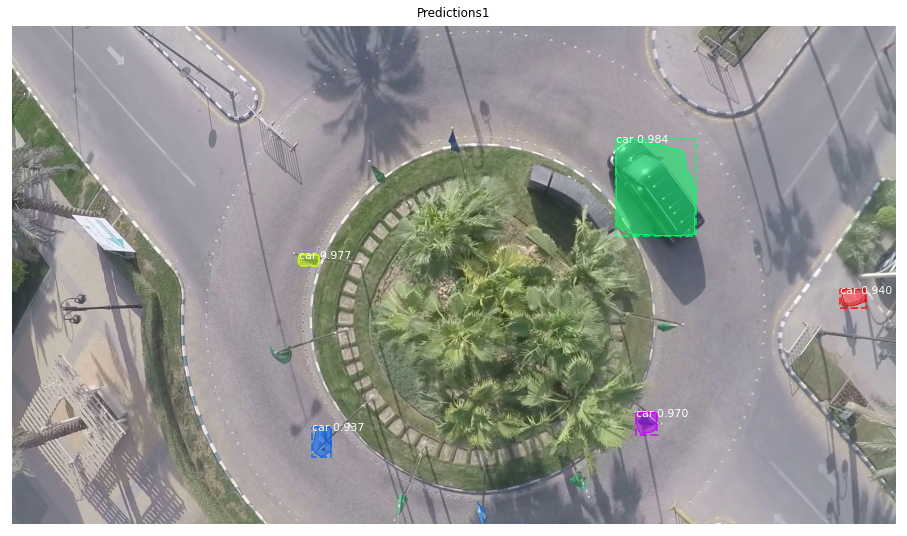

In [22]:

# This is for predicting images which are not present in dataset
path_to_new_image = '/Mask_RCNN/MyDrive/Mask R-CNN/dataset/val/01021.jpg'
image1 = mpimg.imread(path_to_new_image)

# Run object detection
#print(len([image1]))
results1 = model_load_custom.detect([image1], verbose=1)

# Display results
ax = get_ax(1)
r1 = results1[0]
visualize.display_instances(image1, r1['rois'], r1['masks'], r1['class_ids'],
dataset_val.class_names, r1['scores'], ax=ax, title="Predictions1")

In [23]:
#RUN DETECTION
image_id = random.choice(dataset_val.image_ids)
print("image id is :",image_id)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
modellib.load_image_gt(dataset_val, config, image_id, use_mini_mask=False)
info = dataset_val.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id,dataset_val.image_reference(image_id)))

# Run object detection
results = model_load_custom.detect([image], verbose=1)

image id is : 10
image ID: dataset.18 (10) /Mask_RCNN/MyDrive/Mask R-CNN/dataset/val/03241.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


gt_class_id              shape: (7,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (7, 4)                min:  296.00000  max:  781.00000  int32
gt_mask                  shape: (1024, 1024, 7)       min:    0.00000  max:    1.00000  uint8


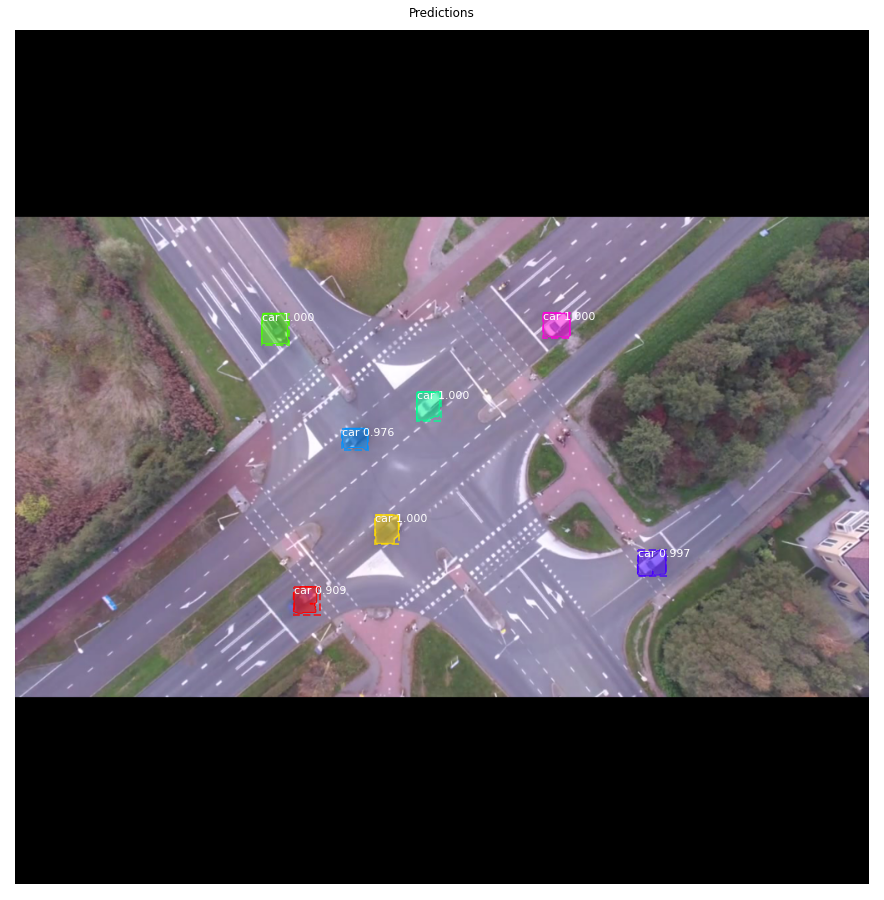

In [ ]:
x = get_ax(1)
r = results[0]
ax = plt.gca()
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset_val.class_names, r['scores'], ax=ax, title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

https://github.com/Altimis/Confusion-matrix-for-Mask-R-CNN/blob/master/Confusion%20matrix%20for%20Mask%20R-CNN.ipynb

**Evaluation**

In [24]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = dataset_val.image_ids
APs = []
precision=[]
recall=[]
overlap=[]
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model_load_custom.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    # precision.append(precisions)
    # recall.append(recalls)
    # overlap.append(overlaps)
    
# print("precision: ",  np.mean(precision))
# print("recall "    ,  np.mean(recall))
print("mAP: "       , np.mean(APs))

mAP:  0.8225119234689013


mAP:  0.63924  up to epoch 228

In [ ]:
print(len(image_ids))

52


https://blog.paperspace.com/mean-average-precision/

https://www.aimspress.com/article/doi/10.3934/biophy.2021022?viewType=HTML

**mean average precision**

In [ ]:
#https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/
#https://supervise.ly/explore/plugins/confusion-matrix-75279/overview
#https://github.com/Altimis/Confusion-matrix-for-Mask-R-CNN/blob/master/Confusion%20matrix%20for%20Mask%20R-CNN.ipynb
#https://blog.paperspace.com/mean-average-precision/
#https://jonathan-hui.medium.com/map-mean-average-precision-for-object-detection-45c121a31173
#https://medium.com/moonvision/smart-object-detection-evaluation-with-confusion-matrices-6f2a7c09d4d7
#https://www.datasciencesmachinelearning.com/2018/11/confusion-matrix-accuracy-precision.html
#https://stats.stackexchange.com/questions/195006/is-the-dice-coefficient-the-same-as-accuracy/195037#195037


In [ ]:
import utils


total_gt = np.array([]) 
total_pred = np.array([]) 
mAP_ = [] #mAP list

#compute total_gt, total_pred and mAP for each image in the test dataset
# Compute total ground truth boxes(total_gt) and total predicted boxes(total_pred) and mean average precision for each Image 
#in the test dataset
for image_id in dataset_val.image_ids:
    print("image_id : ",image_id)
    image, image_meta, gt_class_id, gt_bbox, gt_mask =modellib.load_image_gt(dataset_val, config, image_id)#, #use_mini_mask=False)
    info = dataset_val.image_info[image_id]

    # Run the model
    results = model_load_custom.detect([image], verbose=1)
    r = results[0]
    
    #compute gt_tot and pred_tot
    gt, pred = utils.gt_pred_lists(gt_class_id, gt_bbox, r['class_ids'], r['rois'])
    total_gt = np.append(total_gt, gt)
    total_pred = np.append(total_pred, pred)
    
    #precision_, recall_, AP_ 
    AP_, precision_, recall_, overlap_ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
    #check if the vectors len are equal
    print("the actual length of the ground truth vect is : ", len(total_gt))
    print("the actual length of the predicted vect is : ", len(total_pred))
    
    mAP_.append(AP_)
    print("Average precision of this image : ",AP_)
    print("The actual mean average precision for the whole images", sum(mAP_)/len(mAP_))

import pandas as pd
total_gt=total_gt.astype(int)
total_pred=total_pred.astype(int)
#save the vectors of gt and pred
save_dir = "output"
gt_pred_tot_json = {"Total Groundtruth" : total_gt, "predicted box" : total_pred}
df = pd.DataFrame(gt_pred_tot_json)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
df.to_json(os.path.join(save_dir,"gt_pred_test.json"))

image_id :  0
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual length of the ground truth vect is :  2
the actual length of the predicted vect is :  2
Average precision of this image :  1.0
The actual mean average precision for the whole images 1.0
image_id :  1
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  

https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/#:~:text=A%20Confusion%20matrix%20is%20an,by%20the%20machine%20learning%20model.

https://colab.research.google.com/github/Fraud-Detection-Handbook/fraud-detection-handbook/blob/main/Chapter_4_PerformanceMetrics/ThresholdBased.ipynb

https://github.com/Altimis/Confusion-matrix-for-Mask-R-CNN

/Mask_RCNN/MyDrive/Mask R-CNN/Mask_RCNN-master/mrcnn/utils.py:642: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Mask_RCNN/MyDrive/Mask R-CNN/Mask_RCNN-master/mrcnn/utils.py:643: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Mask_RCNN/MyDrive/Mask R-CNN/Mask_RCNN-master/mrcnn/utils.py:645: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Mask_RCNN/MyDrive/Mask R-CNN/Mask_RCNN-master/mrcnn/utils.py:646: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


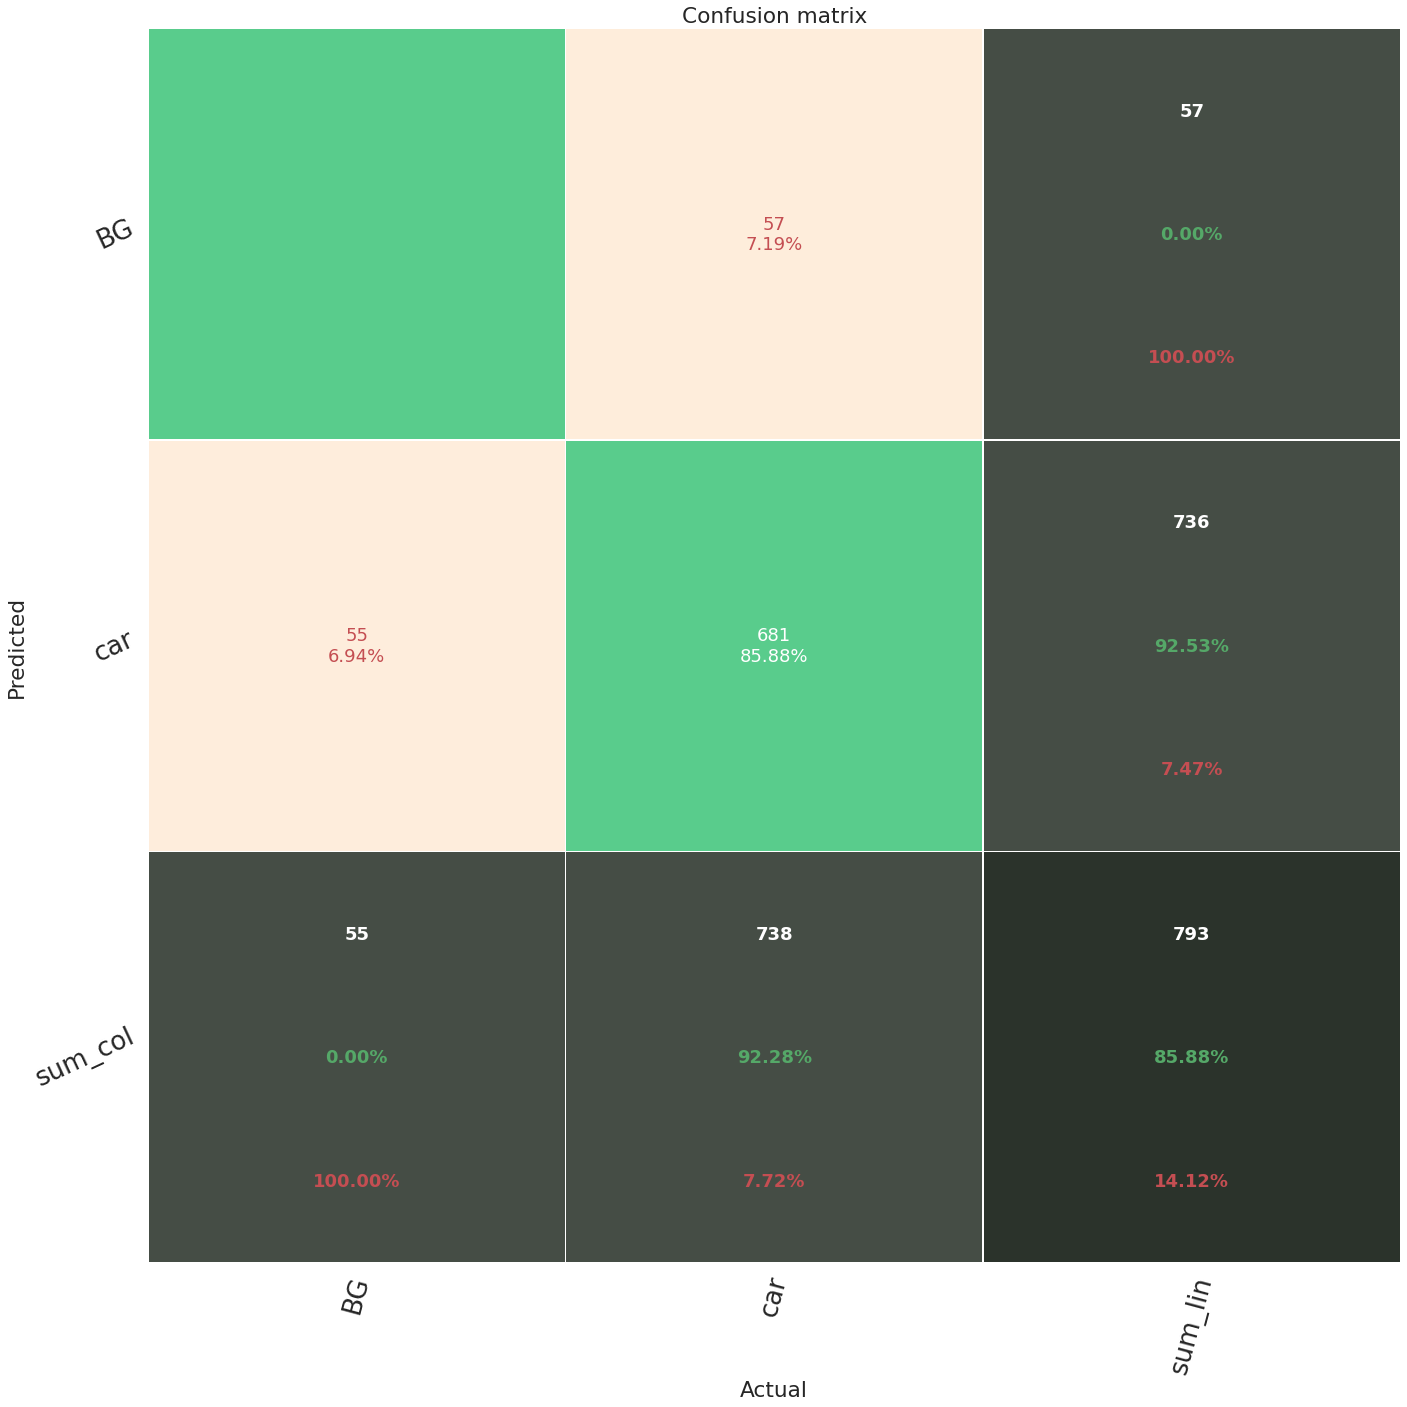

In [ ]:
# total_gt=total_gt.astype(int)
# total_pred=total_pred.astype(int)

#https://github.com/Altimis/Confusion-matrix-for-Mask-R-CNN
tp, fp, fn = utils.plot_confusion_matrix_from_data(total_gt, total_pred, dataset_val.class_names, fz=18, figsize=(20,20), lw=0.5)



https://www.govinfo.gov/content/pkg/GOVPUB-C13-a52a74766ab7f0f45eaa6be1df5cb85e/pdf/GOVPUB-C13-a52a74766ab7f0f45eaa6be1df5cb85e.pdf

In [ ]:
print(tp)

[0, 681]


In [ ]:
# Here we can calculate true negative(tn) using the confusion matrix

tn=[10,0]

In [ ]:
print("tp : ",tp)
print("tn : ",tn)
print("fp : ",fp)
print("fn : ",fn)

tp :  [0, 681]
tn :  [10, 0]
fp :  [57, 55]
fn :  [55, 57]


In [ ]:
miss_rate=fn[1]/(tp[1]+fn[1])
miss_rate

0.07723577235772358

In [ ]:
detection_rate=tp[1]/(tp[1]+fn[1])
detection_rate

0.9227642276422764

In [ ]:
precision=tp[1]/(tp[1]+fp[1])
precision  # max : 0.983    but avg : 0.975(faster rcnn),0.9496(yolyo v3)

0.9252717391304348

In [ ]:
recall=tp[1]/(tp[1]+fn[1])
recall     # max : 0.976

0.9227642276422764

In [ ]:
f1_score=2/((1/recall)+(1/precision))
f1_score   # max : 0.960

0.9240162822252375

In [ ]:
# miss_rate_bg=fn[0]/(tp[0]+fn[0])
# miss_rate_bg

In [ ]:
# detection_rate_bg=tp[0]/(tp[0]+fn[0])
# detection_rate_bg

In [ ]:
accuracy_car=(tp[1]+tn[1])/(tp[1]+tn[1]+fp[1]+fn[1])
accuracy_car

0.8587641866330391

In [ ]:
accuracy_bg=(tp[0]+tn[0])/(tp[0]+tn[0]+fp[0]+fn[0])
accuracy_bg

0.08196721311475409

In [ ]:
precision_car=tp[1]/(tp[1]+fp[1])
precision_car

0.9252717391304348

In [ ]:
precision_bg=tp[0]/(tp[0]+fp[0])
precision_bg

0.0

In [ ]:
recall_car=tp[1]/(tp[1]+fn[1])
recall_car

0.9227642276422764

In [ ]:
recall_bg=tp[0]/(tp[0]+fp[0])
recall_bg

0.0

In [ ]:
f1_score_car=2/((1/recall_car)+(1/precision_car))
f1_score_car

0.9240162822252375

In [ ]:
f1_score_bg=2/((1/recall_bg)+(1/precision_bg))
f1_score_bg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


0.0